### Library   

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns
# sns.set()
# %matplotlib inline

In [6]:
from function import function

In [7]:
pip install imblearn

  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
  Using cached imbalanced_learn-0.10.1-py3-none-any.whl (226 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 5.3 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.2
    Uninstalling scikit-learn-0.24.2:
      Successfully uninstalled scikit-learn-0.24.2

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install optuna

  Using cached optuna-3.1.0-py3-none-any.whl (365 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 2.6 MB/s eta 0:00:0000:0100:01
  Using cached cmaes-0.9.1-py3-none-any.whl (21 kB)
  Using cached colorlog-6.7.0-py2.py3-none-any.whl (11 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 1.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.3/189.3 kB 2.7 MB/s eta 0:00:00a 0:00:01
  Using cached alembic-1.10.3-py3-none-any.whl (212 kB)
  Using cached Mako-1.2.4-py3-none-any.whl (78 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.0/165.0 kB 497.1 kB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for greenlet: filename=greenlet-2.0.2-cp37-cp37m-macosx_10_9_x86_64.whl size=194382 sha256=f46e81ce8f5fd0e08d980e63fc3d7919937abbd21393f055b21b98fd000e5d72
  Stored in directory: /Users/nipitkodchakorn/Library/Caches/pip/wheels/18/bb/e4/5178b4773ba9d05289c15159574479079434e9580b48dbee1a
Successfully built greenl

### Raw Data Demographic

In [10]:
## DATA UNDERSTANDING
raw_credit = pd.read_csv('credit_record.csv')
print(raw_credit.head())
print(raw_credit.shape,raw_credit.info())

        ID  MONTHS_BALANCE STATUS
0  5001711               0      X
1  5001711              -1      0
2  5001711              -2      0
3  5001711              -3      0
4  5001712               0      C
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB
(1048575, 3) None


In [11]:
raw_application = pd.read_csv('application_record.csv')
print(raw_application.head())
print(raw_application.shape)

        ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008804           M            Y               Y             0   
1  5008805           M            Y               Y             0   
2  5008806           M            Y               Y             0   
3  5008808           F            N               Y             0   
4  5008809           F            N               Y             0   

   AMT_INCOME_TOTAL      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0          427500.0               Working               Higher education   
1          427500.0               Working               Higher education   
2          112500.0               Working  Secondary / secondary special   
3          270000.0  Commercial associate  Secondary / secondary special   
4          270000.0  Commercial associate  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
0        Civil marriage   Rented apartment      -12005 

### Data Dict

ID : Client number	

CODE_GENDER	: Gender	

FLAG_OWN_CAR : Is there a car	

FLAG_OWN_REALTY	: Is there a property	

CNT_CHILDREN : Number of children	

AMT_INCOME_TOTAL : Annual income

NAME_INCOME_TYPE : Income category	

NAME_EDUCATION_TYPE	: Education level	

NAME_FAMILY_STATUS	: Marital status	

NAME_HOUSING_TYPE	: Way of living	

DAYS_BIRTH	: Birthday	,Count backwards from current day (0), -1 means yesterday

DAYS_EMPLOYED	: Start date of employment	,Count backwards from current day(0). If positive, it means the person currently unemployed.

FLAG_MOBIL	: Is there a mobile phone	

FLAG_WORK_PHONE	: Is there a work phone	

FLAG_PHONE	: Is there a phone	

FLAG_EMAIL	: Is there an email	

OCCUPATION_TYPE	: Occupation	

CNT_FAM_MEMBERS	: Family size	

MONTHS_BALANCE	: Record month	,The month of the extracted data is the starting point, backwards, 0 is the current month, -1 is the previous month, and so on

STATUS	: Status ,	0: 1-29 days past due 1: 30-59 days past due 2: 60-89 days overdue 3: 90-119 days overdue 4: 120-149 days overdue 5: Overdue or bad debts, write-offs for more than 150 days C: paid off that month X: No loan for the month

### Adjust Data

In [12]:
raw_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [13]:
df = raw_application.merge(raw_credit, on='ID', how='inner')
df['FLAG_MOBIL'] = df['FLAG_MOBIL'].astype('category')
df['FLAG_WORK_PHONE'] = df['FLAG_WORK_PHONE'].astype('category')
df['FLAG_PHONE'] = df['FLAG_PHONE'].astype('category')
df['FLAG_EMAIL'] = df['FLAG_EMAIL'].astype('category')

In [14]:
df.describe(include='all')

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
count,7.777150e+05,777715,777715,777715,777715.000000,7.777150e+05,777715,777715,777715,777715,777715.000000,777715.000000,777715.0,777715.0,777715.0,777715.0,537667,777715.000000,777715.000000,777715
unique,NaN,2,2,2,NaN,NaN,5,5,5,6,NaN,NaN,1.0,2.0,2.0,2.0,18,NaN,NaN,8
top,NaN,F,N,Y,NaN,NaN,Working,Secondary / secondary special,Married,House / apartment,NaN,NaN,1.0,0.0,0.0,0.0,Laborers,NaN,NaN,C
freq,NaN,518851,473355,512948,NaN,NaN,400164,524261,546619,697151,NaN,NaN,777715.0,597427.0,543650.0,706418.0,131572,NaN,NaN,329536
mean,5.078743e+06,NaN,NaN,NaN,0.428082,1.885348e+05,NaN,NaN,NaN,NaN,-16124.937046,57775.825016,NaN,NaN,NaN,NaN,NaN,2.208837,-19.373564,NaN
std,4.180442e+04,NaN,NaN,NaN,0.745755,1.016225e+05,NaN,NaN,NaN,NaN,4104.304018,136471.735391,NaN,NaN,NaN,NaN,NaN,0.907380,14.082208,NaN
min,5.008804e+06,NaN,NaN,NaN,0.000000,2.700000e+04,NaN,NaN,NaN,NaN,-25152.000000,-15713.000000,NaN,NaN,NaN,NaN,NaN,1.000000,-60.000000,NaN
25%,5.044568e+06,NaN,NaN,NaN,0.000000,1.215000e+05,NaN,NaN,NaN,NaN,-19453.000000,-3292.000000,NaN,NaN,NaN,NaN,NaN,2.000000,-29.000000,NaN
50%,5.069530e+06,NaN,NaN,NaN,0.000000,1.620000e+05,NaN,NaN,NaN,NaN,-15760.000000,-1682.000000,NaN,NaN,NaN,NaN,NaN,2.000000,-17.000000,NaN
75%,5.115551e+06,NaN,NaN,NaN,1.000000,2.250000e+05,NaN,NaN,NaN,NaN,-12716.000000,-431.000000,NaN,NaN,NaN,NaN,NaN,3.000000,-8.000000,NaN


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 777715 entries, 0 to 777714
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   ID                   777715 non-null  int64   
 1   CODE_GENDER          777715 non-null  object  
 2   FLAG_OWN_CAR         777715 non-null  object  
 3   FLAG_OWN_REALTY      777715 non-null  object  
 4   CNT_CHILDREN         777715 non-null  int64   
 5   AMT_INCOME_TOTAL     777715 non-null  float64 
 6   NAME_INCOME_TYPE     777715 non-null  object  
 7   NAME_EDUCATION_TYPE  777715 non-null  object  
 8   NAME_FAMILY_STATUS   777715 non-null  object  
 9   NAME_HOUSING_TYPE    777715 non-null  object  
 10  DAYS_BIRTH           777715 non-null  int64   
 11  DAYS_EMPLOYED        777715 non-null  int64   
 12  FLAG_MOBIL           777715 non-null  category
 13  FLAG_WORK_PHONE      777715 non-null  category
 14  FLAG_PHONE           777715 non-null  category
 15  

### DATA CLEANING

In [16]:
df.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        240048
CNT_FAM_MEMBERS             0
MONTHS_BALANCE              0
STATUS                      0
dtype: int64

In [17]:
print(df['OCCUPATION_TYPE'].nunique())
df['OCCUPATION_TYPE'].fillna('Others',inplace=True)
print(df.isnull().sum())
df.shape

18
ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
MONTHS_BALANCE         0
STATUS                 0
dtype: int64


(777715, 20)

In [18]:
df.duplicated().sum()

0

### EDA

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33110 entries, 5008804 to 5150487
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Gender                          33110 non-null  object  
 1   Own_car                         33110 non-null  object  
 2   Own_property                    33110 non-null  object  
 3   Nbchildren                      33110 non-null  int64   
 4   Total_income_per_year           33110 non-null  float64 
 5   Income_type                     33110 non-null  object  
 6   Education_level                 33110 non-null  object  
 7   Marital_status                  33110 non-null  object  
 8   Way_of_living                   33110 non-null  object  
 9   Workphone                       33110 non-null  category
 10  Phone                           33110 non-null  category
 11  Email                           33110 non-null  category
 12  Occupation

In [20]:
df = df.rename(columns={'CODE_GENDER': 'Gender', 'FLAG_OWN_CAR': 'Own_car', 
                               'FLAG_OWN_REALTY':'Own_property','CNT_CHILDREN':'Nbchildren',
                               'AMT_INCOME_TOTAL':'Total_income_per_year','NAME_INCOME_TYPE':'Income_type',
                               'NAME_EDUCATION_TYPE':'Education_level','NAME_FAMILY_STATUS':'Marital_status',
                               'NAME_HOUSING_TYPE':'Way_of_living','FLAG_WORK_PHONE':'Workphone',
                               'FLAG_PHONE':'Phone','FLAG_EMAIL':'Email','FLAG_MOBIL':'mobile','OCCUPATION_TYPE':'Occupation',
                               'CNT_FAM_MEMBERS':'Nbfamily_member'})

In [21]:
numeric_cols = df.select_dtypes(include='number')
print(numeric_cols.columns)

Index(['ID', 'Nbchildren', 'Total_income_per_year', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'Nbfamily_member', 'MONTHS_BALANCE'],
      dtype='object')


NameError: name 'sns' is not defined

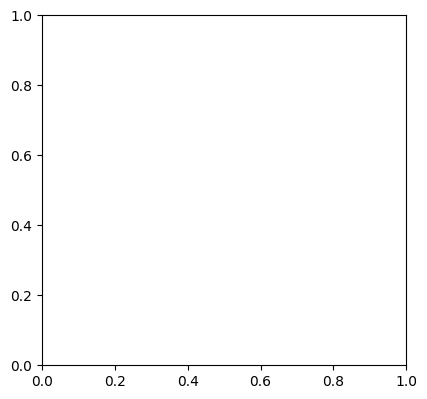

In [22]:
plt.figure(figsize=(16,10))

plt.subplot(2, 3, 1)
sns.boxplot(data=df["Nbchildren"])
plt.title('Nbchildren')

plt.subplot(2, 3, 2)
sns.boxplot(data=df['Total_income_per_year'])
plt.title('total_income_per_year')

plt.subplot(2, 3, 3)
sns.boxplot(data=df['DAYS_BIRTH'])
plt.title('DAYS_BIRTH')

plt.subplot(2, 3, 4)
sns.boxplot(data=df['DAYS_EMPLOYED'])
plt.title('DAYS_EMPLOYED')

plt.subplot(2, 3, 5)
sns.boxplot(data=df['Nbfamily_member'])
plt.title('Nbfamily_member')

plt.subplot(2, 3, 6)
sns.boxplot(data=df['MONTHS_BALANCE'])
plt.title('MONTHS_BALANCE')

plt.tight_layout()
plt.show()

In [ ]:
### Deal with the outlier
number_Children_outlier = df['Nbchildren'].quantile(0.999)
df = df[df['Nbchildren'] <= number_Children_outlier]
Total_income_per_year_outlier = df['Total_income_per_year'].quantile(0.999)
df = df[df['Total_income_per_year'] <= Total_income_per_year_outlier]

In [23]:
### Check historical payment status for each customer
grouped=df.groupby('ID')['STATUS'].value_counts()
grouped

ID       STATUS
5008804  C         13
         0          1
         1          1
         X          1
5008805  C         12
                   ..
5150483  X         18
5150484  0         12
         C          1
5150485  0          2
5150487  C         30
Name: STATUS, Length: 74874, dtype: int64

<AxesSubplot:xlabel='STATUS'>

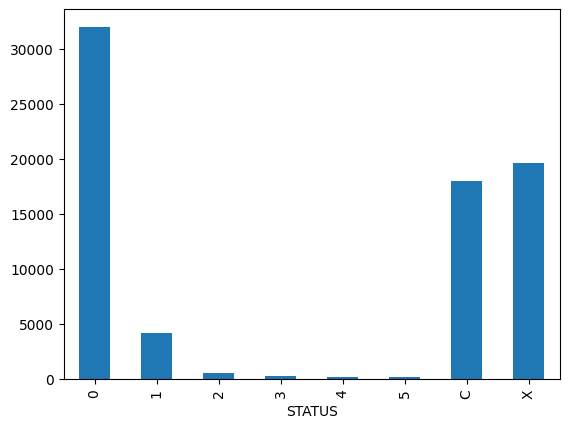

In [24]:
df.groupby('STATUS').count()
number_of_customer_for_each_status=grouped.groupby('STATUS').count()
number_of_customer_for_each_status.plot(kind='bar')
# Most customers pay off their loans in 1-29 days
# High percetage of customers don't borrow loans
# Also High percetage of customers pay off their loan forever
# Few people are late in paying off their loans

### Graph

In [21]:
## DEALING WITH NUMERICAL COLUMNS
def Categorical_countplot(features):
    for categorical_columns in features:
        plt.figure(figsize=(12, 8))
        ax=sns.countplot(y=df[categorical_columns], data=df)
        # plt.legend(loc='best')
        total = len(df[categorical_columns])
        for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_width()/total)
            x = p.get_x() + p.get_width() + 0.02
            y = p.get_y() + p.get_height()/2
            ax.annotate(percentage, (x, y))
    plt.show()

In [22]:
categorical_columns = df.select_dtypes(include=['object', 'category'])
print(categorical_columns.columns)

Index(['Gender', 'Own_car', 'Own_property', 'Income_type', 'Education_level',
       'Marital_status', 'Way_of_living', 'mobile', 'Workphone', 'Phone',
       'Email', 'Occupation', 'STATUS'],
      dtype='object')


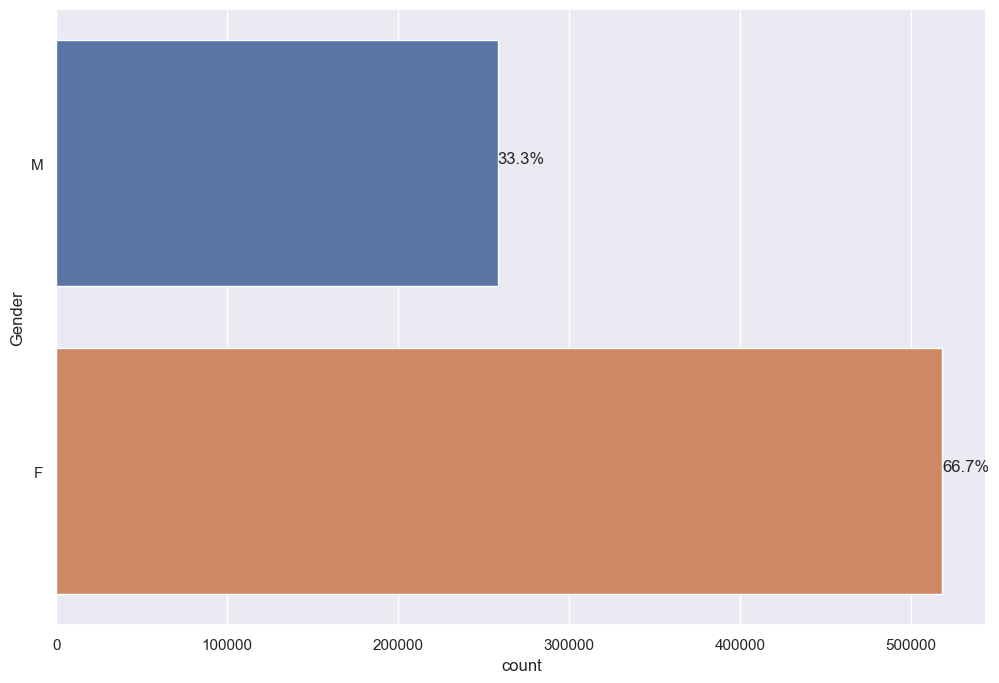

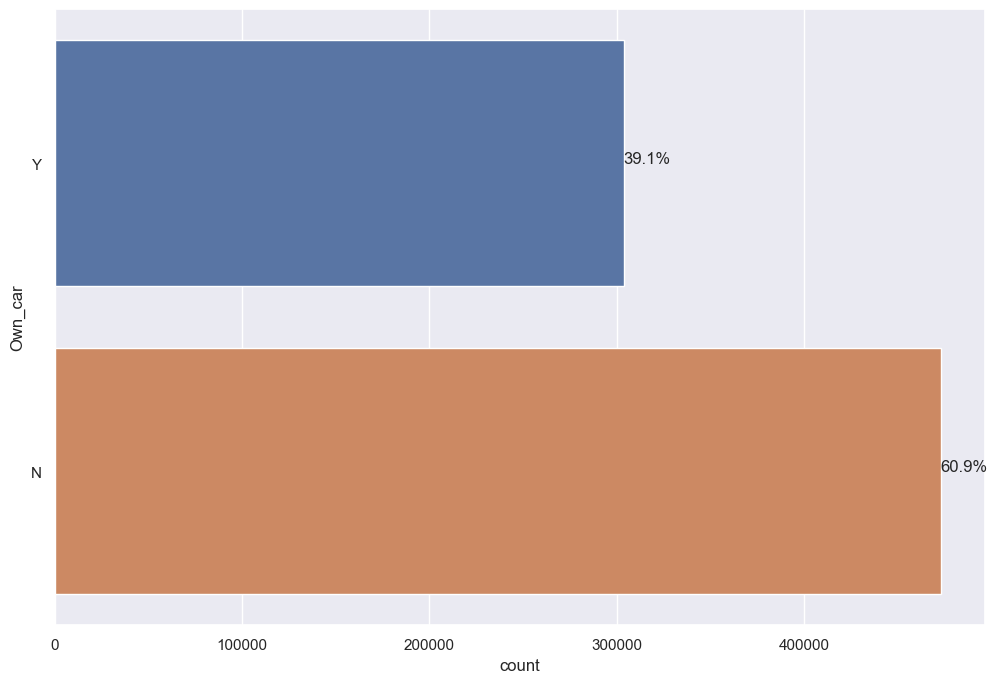

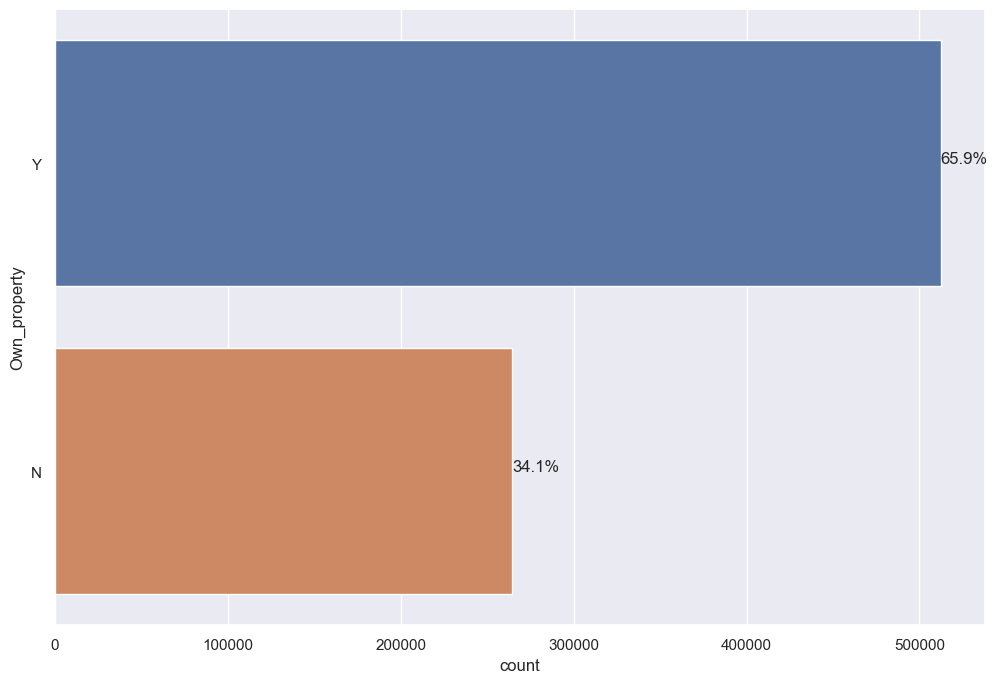

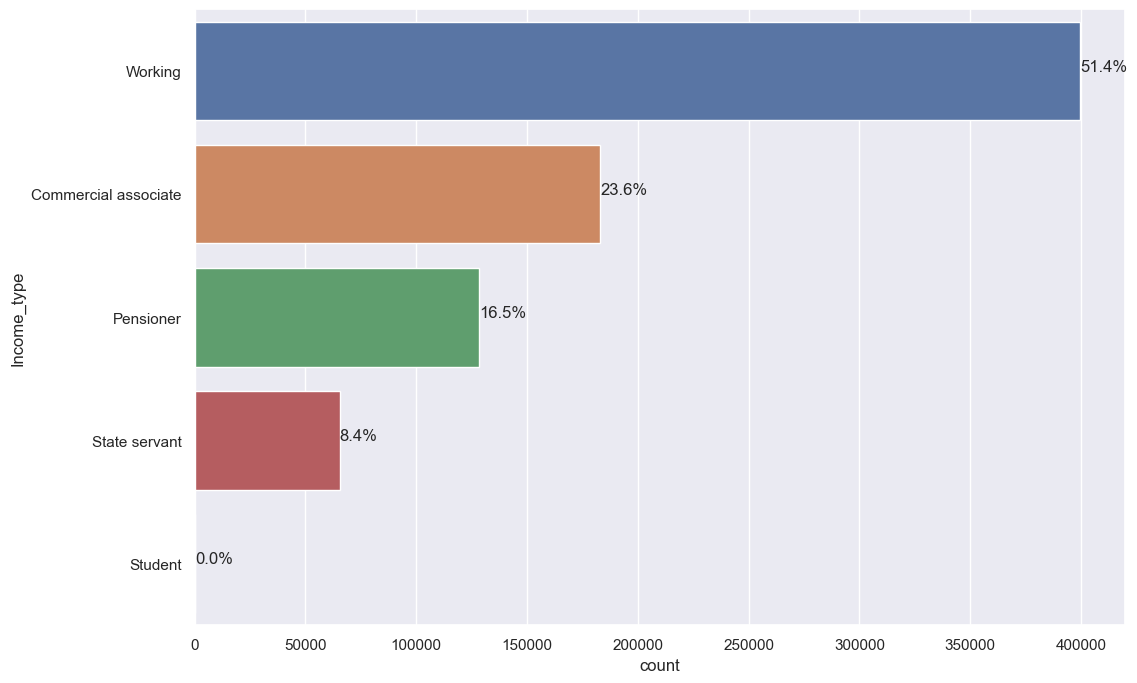

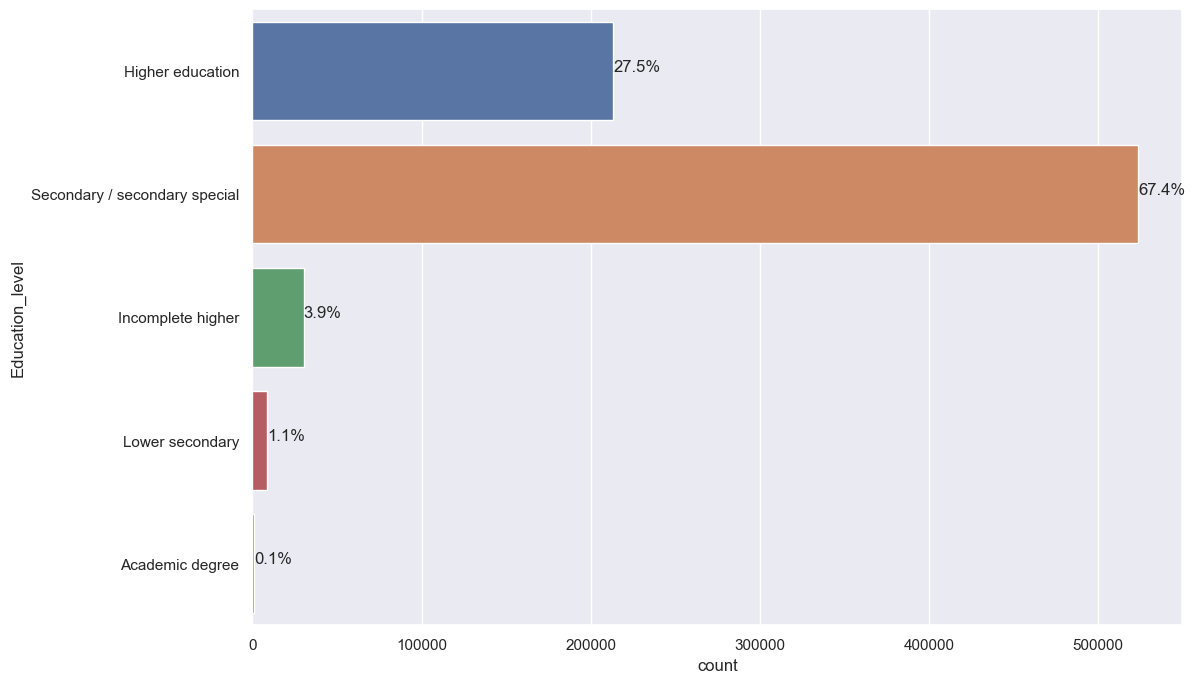

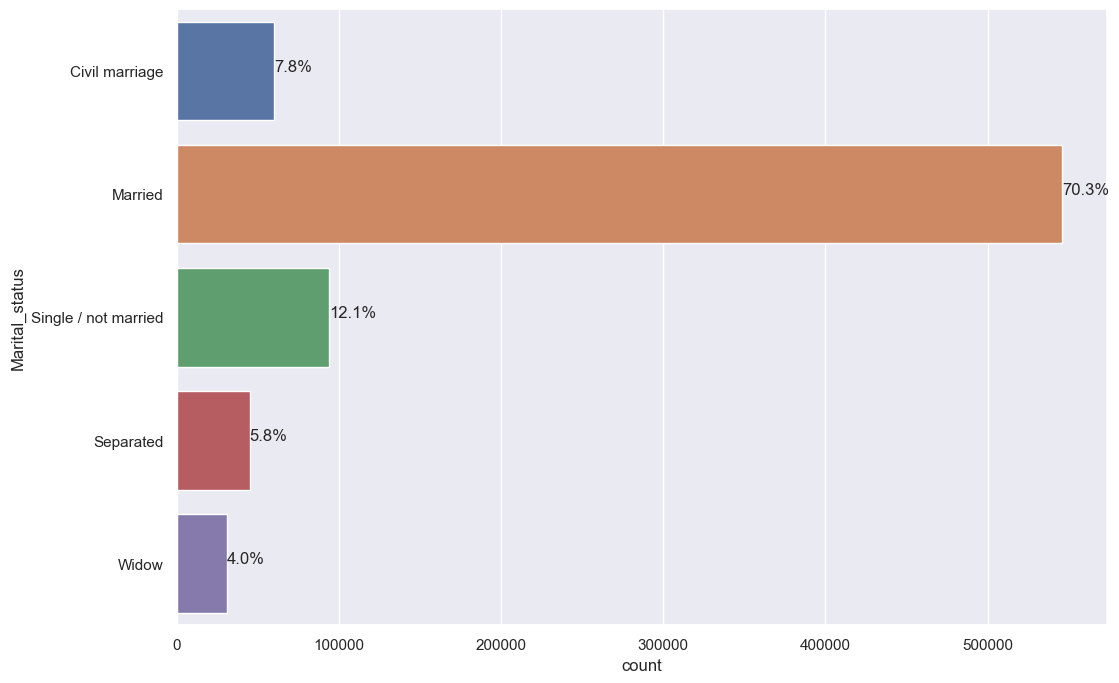

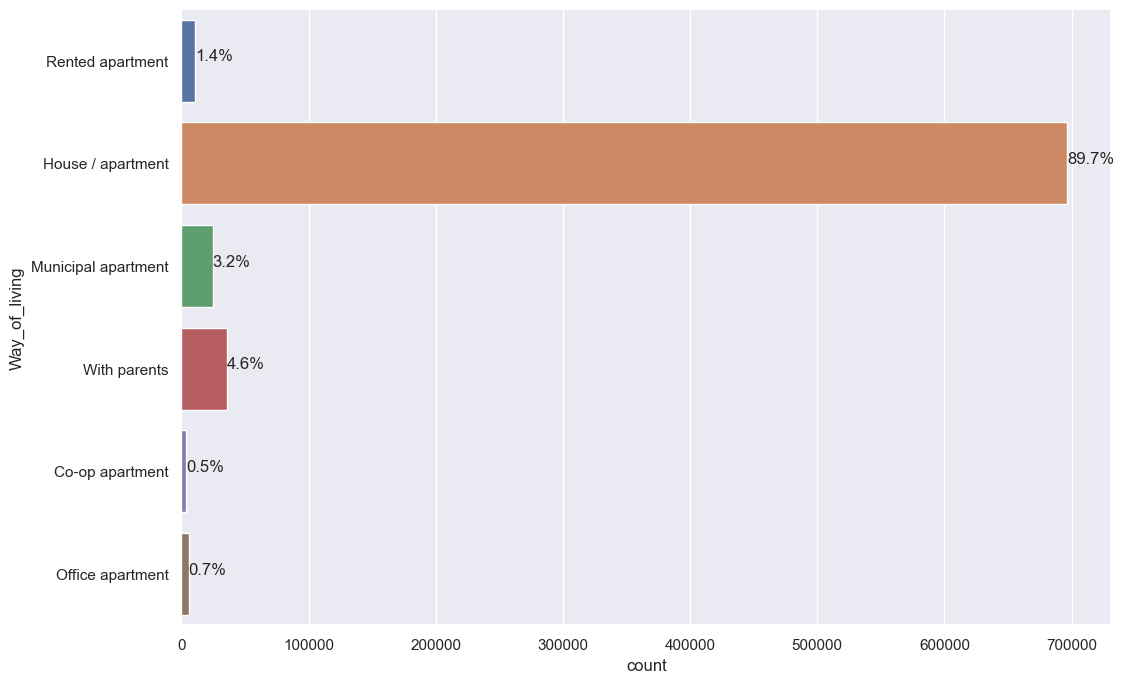

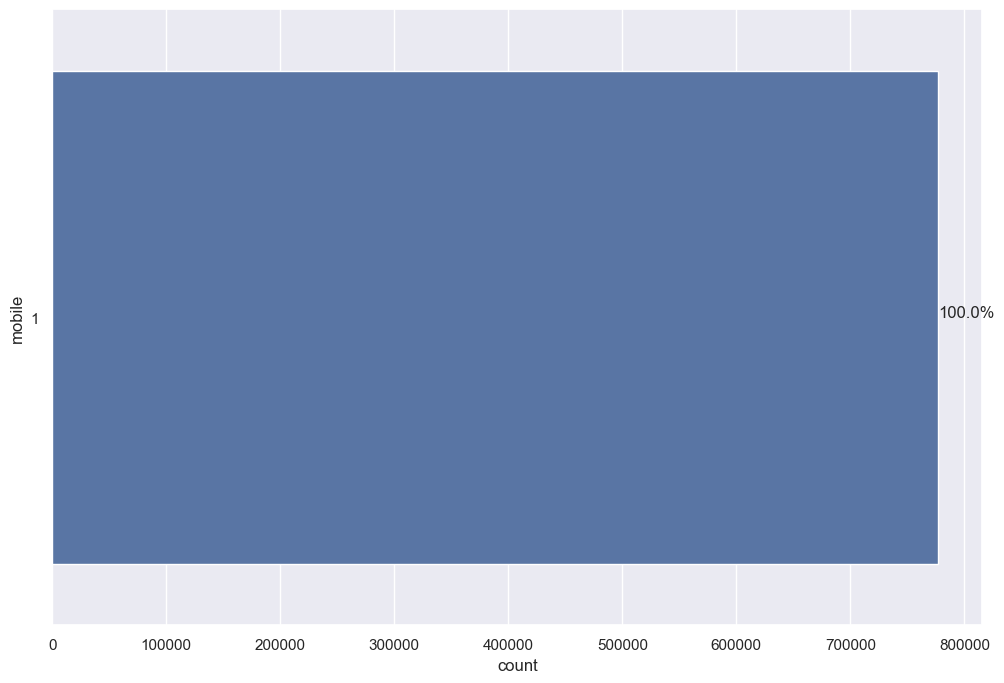

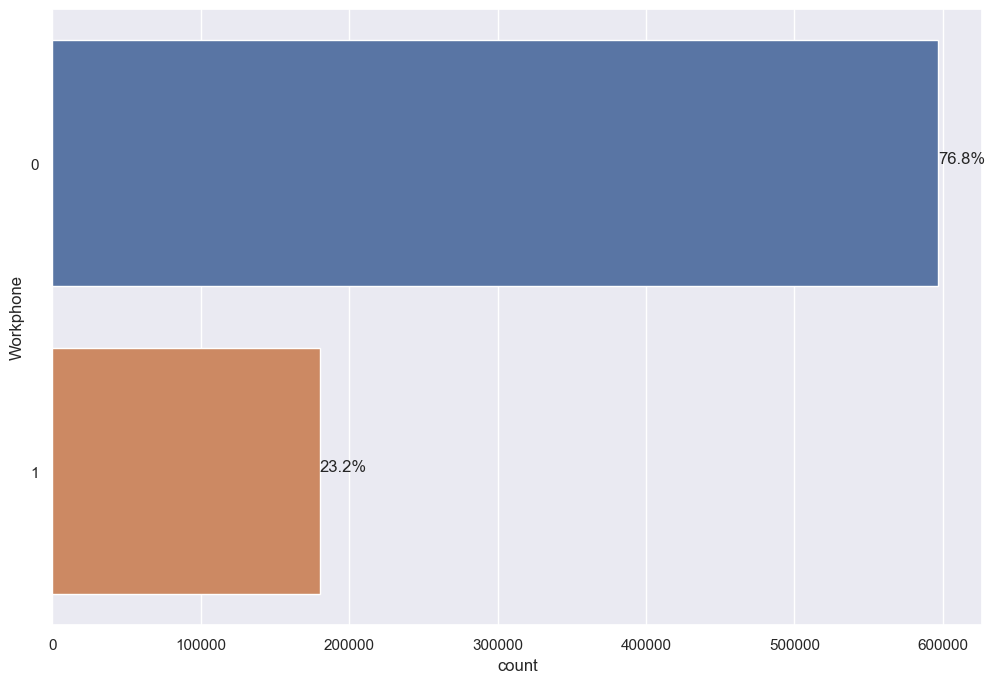

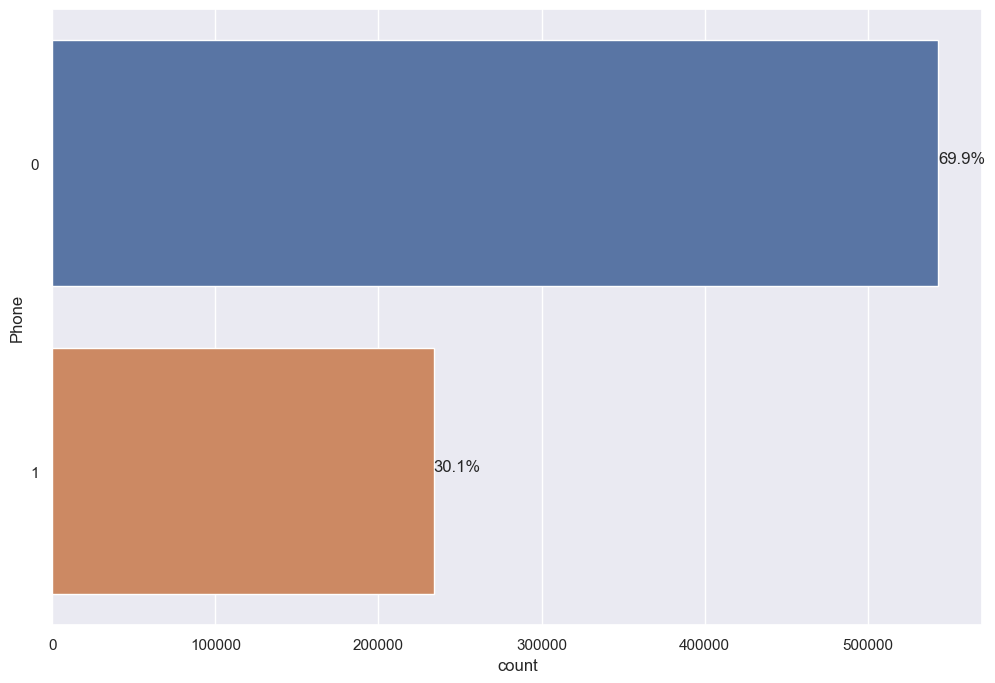

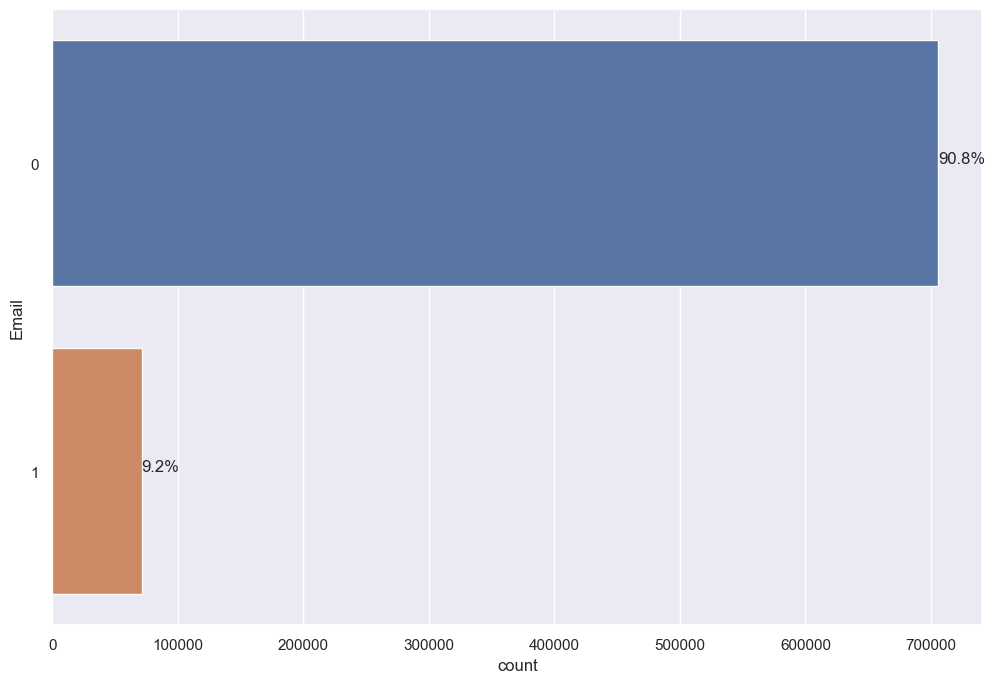

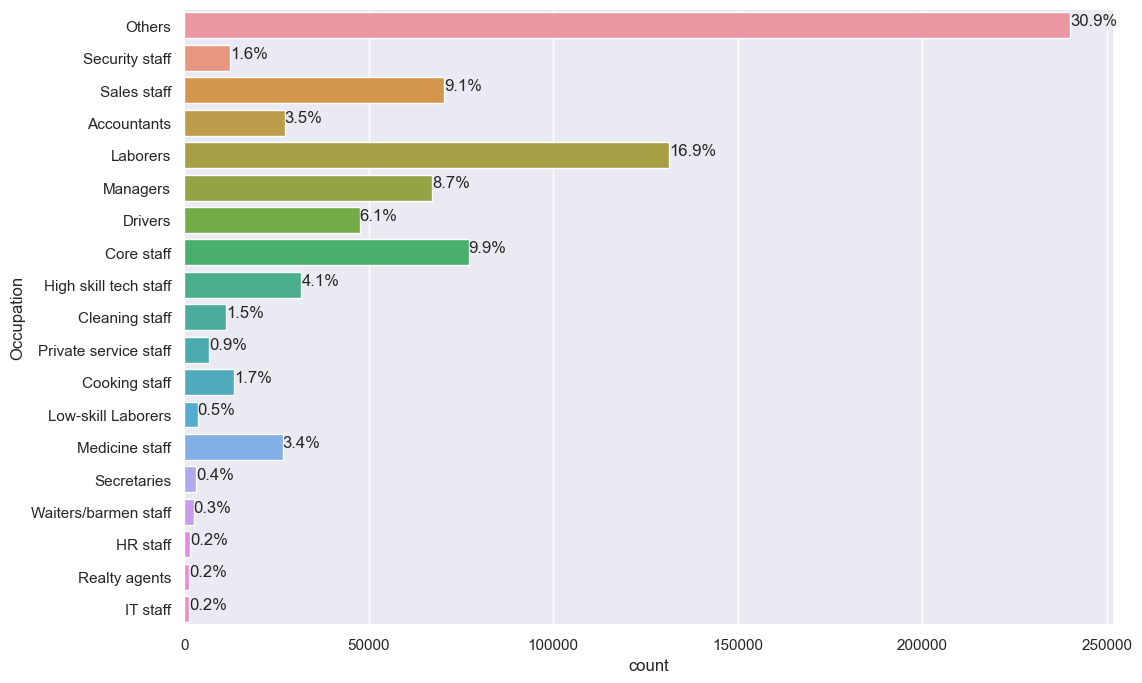

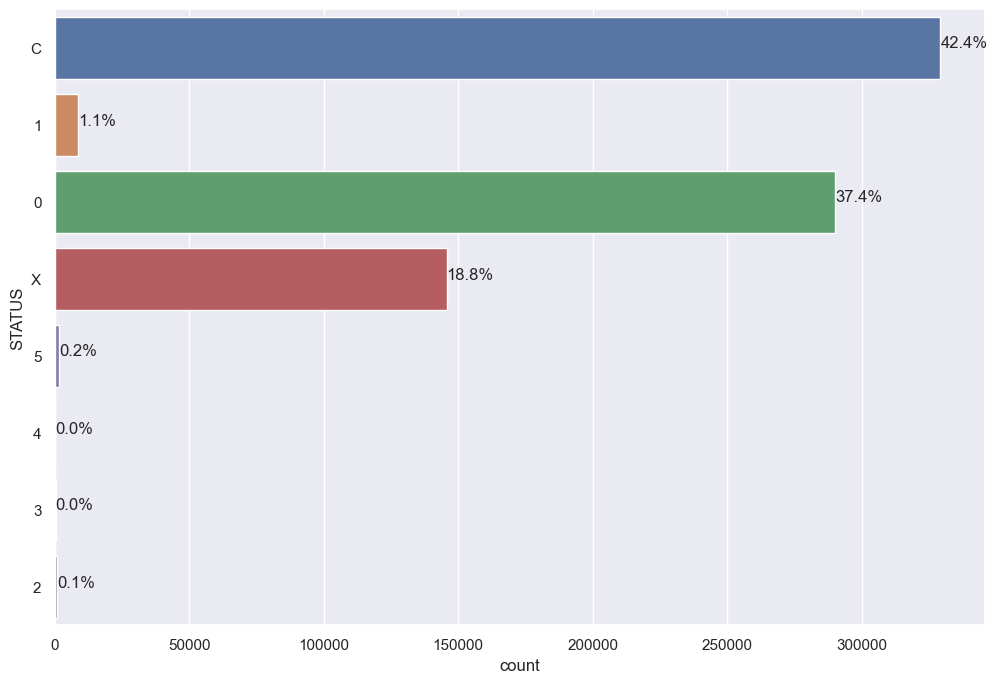

In [23]:
Categorical_countplot(['Gender', 'Own_car', 'Own_property', 'Income_type', 'Education_level',
       'Marital_status', 'Way_of_living', 'mobile', 'Workphone', 'Phone',
       'Email', 'Occupation', 'STATUS'])

### Feature engineering

In [25]:
credit_grouped=pd.get_dummies(data=df,columns=['STATUS'],
                              prefix='',prefix_sep='').groupby('ID')[sorted(df['STATUS'].unique().tolist())].sum()
credit_grouped

,0,1,2,3,4,5,C,X
ID,,,,,,,,
5008804,1,1,0,0,0,0,13,1
5008805,1,1,0,0,0,0,12,1
5008806,7,0,0,0,0,0,7,16
5008808,2,0,0,0,0,0,0,3
5008809,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...
5150482,12,0,0,0,0,0,6,0
5150483,0,0,0,0,0,0,0,18
5150484,12,0,0,0,0,0,1,0


In [26]:
credit_grouped=credit_grouped.rename(columns=
                      {'0':'pastdue_1_29',
                       '1':'pastdue_30_59',
                       '2':'overdue_60_89',
                       '3':'overdue_90_119',
                       '4':'overdue_120_149',
                       '5':'overdue_over_150',
                       'C':'paid_off',
                        'X':'no_loan'})

overall_pastdue=['pastdue_1_29','pastdue_30_59',	'overdue_60_89',	'overdue_90_119'	,'overdue_120_149',	'overdue_over_150']
credit_grouped['Total_months_credit_registered']=df.groupby('ID')['MONTHS_BALANCE'].count()
credit_grouped['Delinquent_accounts']=credit_grouped[['pastdue_30_59','overdue_60_89','overdue_90_119'	,'overdue_120_149'	,'overdue_over_150']].sum(axis=1)
credit_grouped['Ordinary_accounts']=credit_grouped[['pastdue_1_29']].sum(axis=1)
credit_grouped['overall_pastdue']=credit_grouped[overall_pastdue].sum(axis=1)
credit_grouped.head()

,pastdue_1_29,pastdue_30_59,overdue_60_89,overdue_90_119,overdue_120_149,overdue_over_150,paid_off,no_loan,Total_months_credit_registered,Delinquent_accounts,Ordinary_accounts,overall_pastdue
ID,,,,,,,,,,,,
5008804,1,1,0,0,0,0,13,1,16,1,1,2
5008805,1,1,0,0,0,0,12,1,15,1,1,2
5008806,7,0,0,0,0,0,7,16,30,0,7,7
5008808,2,0,0,0,0,0,0,3,5,0,2,2
5008809,0,0,0,0,0,0,0,5,5,0,0,0


In [27]:
target =[]
for index,row in credit_grouped.iterrows() :
  if row ['no_loan']==row['Total_months_credit_registered']:
    target.append(0)
  elif row['overall_pastdue'] == row['Ordinary_accounts']:
    target.append(0)
  elif row['paid_off'] >= 12 & row['Delinquent_accounts'] <= 2: 
    target.append(0)
  elif row['no_loan'] >= 12 & row['Delinquent_accounts'] <=2:
    target.append(0)
  elif row['Delinquent_accounts'] <= 0:
    target.append(0)
  else: 
    target.append(1)

credit_grouped['good_or_bad']=target
credit_grouped['good_or_bad'].value_counts()

0    35669
1      788
Name: good_or_bad, dtype: int64

In [28]:
from function import assess_risk

In [29]:
df = function.select_first_month(df)

In [30]:
df['STATUS'].replace({'C':0}, inplace=True)
df['STATUS'] = df['STATUS'].astype('int')

In [31]:
df['STATUS']  = df['STATUS'].apply(assess_risk.risk_assess)

In [32]:
features=['no_loan','Total_months_credit_registered',	'Delinquent_accounts',	'Ordinary_accounts',	'overall_pastdue','good_or_bad']
columns_credit= credit_grouped.loc[:,features]
df = pd.merge(df,columns_credit,on='ID')

In [33]:
risk=[]
for index,row in df.iterrows() :
  if row['STATUS'] == 0  and row['good_or_bad'] == 0 :
    risk.append(0)
  else:
    risk.append(1)

df['Risk']=risk
df['Risk'].value_counts(normalize = True )

0    0.972153
1    0.027847
Name: Risk, dtype: float64

In [34]:
from function import convert_day

In [35]:
df['Age'] = df['DAYS_BIRTH'].apply(convert_day.convert_day_to_year)
df['Age'] = df['Age'].astype(int)
df['Experience'] = df['DAYS_EMPLOYED'].apply(convert_day.convert_day_to_year)
df['Total_income_lifetime_employed'] = df['Experience'] * df['Total_income_per_year']
df.drop('DAYS_BIRTH',axis=1,inplace=True)
df.drop('DAYS_EMPLOYED',axis=1,inplace=True)

In [36]:
def employment_status(date):
    # Determine the employment status based on the duration
    if date < 0:
        return "Unemployed"
    else:
        return "Employment"

In [37]:
df['Employment_status'] = df['Experience'].apply(employment_status)

### DATA VISUALIZING

In [38]:
df.head()

,ID,Gender,Own_car,Own_property,Nbchildren,Total_income_per_year,Income_type,Education_level,Marital_status,Way_of_living,...,Total_months_credit_registered,Delinquent_accounts,Ordinary_accounts,overall_pastdue,good_or_bad,Risk,Age,Experience,Total_income_lifetime_employed,Employment_status
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,16,1,1,2,0,0,33,12.0,5130000.0,Employment
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,15,1,1,2,0,0,33,12.0,5130000.0,Employment
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,30,0,7,7,0,0,59,3.0,337500.0,Employment
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,5,0,2,2,0,0,52,8.0,2160000.0,Employment
4,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,27,0,6,6,0,0,52,8.0,2160000.0,Employment


In [39]:
df.set_index('ID',inplace=True)

In [40]:
### drop unnecessary columns
df.drop(columns=['MONTHS_BALANCE','mobile','STATUS','good_or_bad','no_loan','Delinquent_accounts','Ordinary_accounts','overall_pastdue'],axis=1,inplace=True)

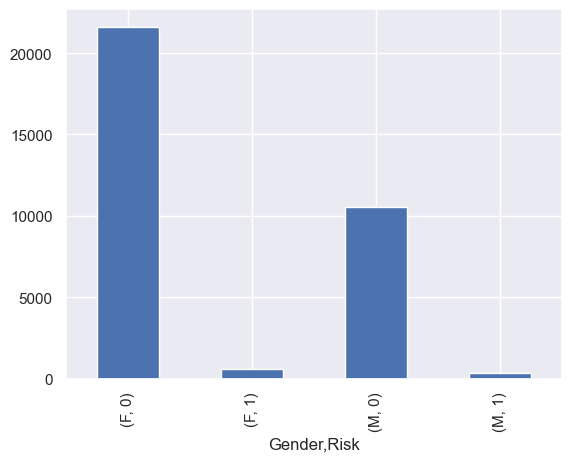

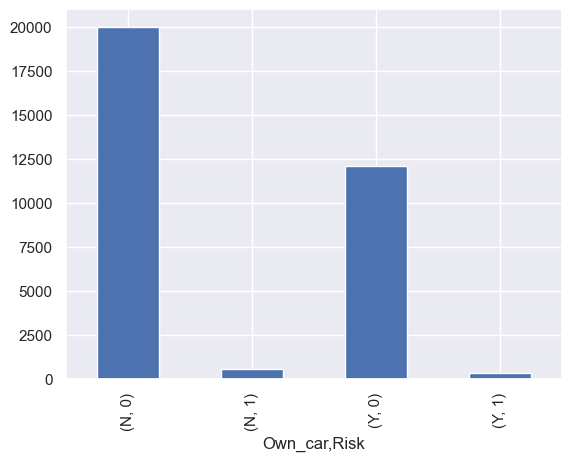

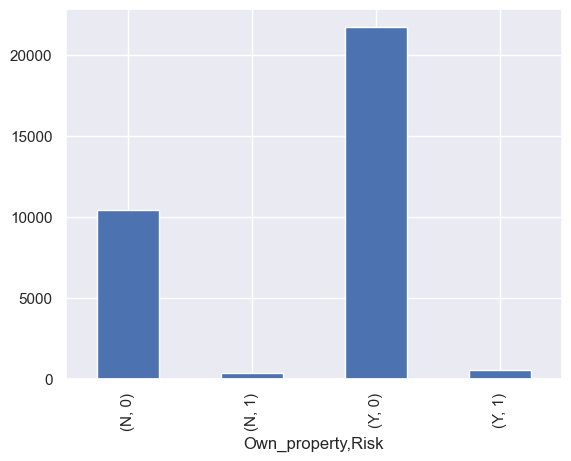

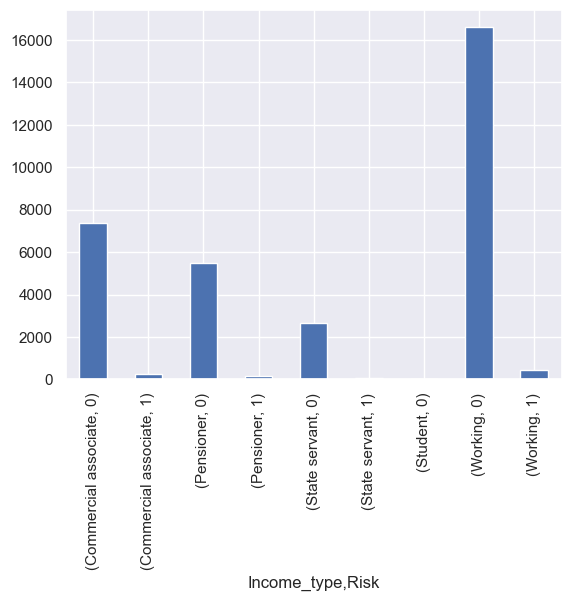

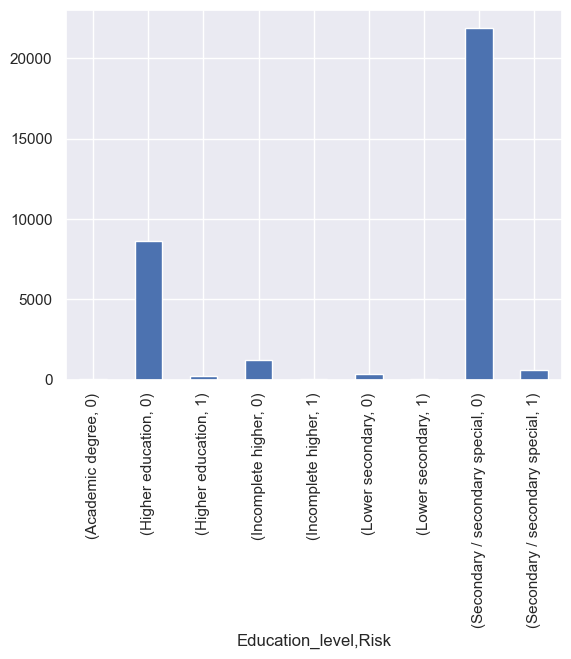

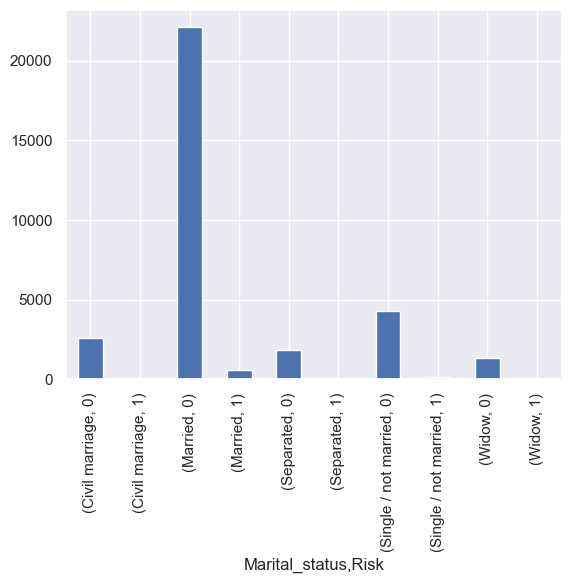

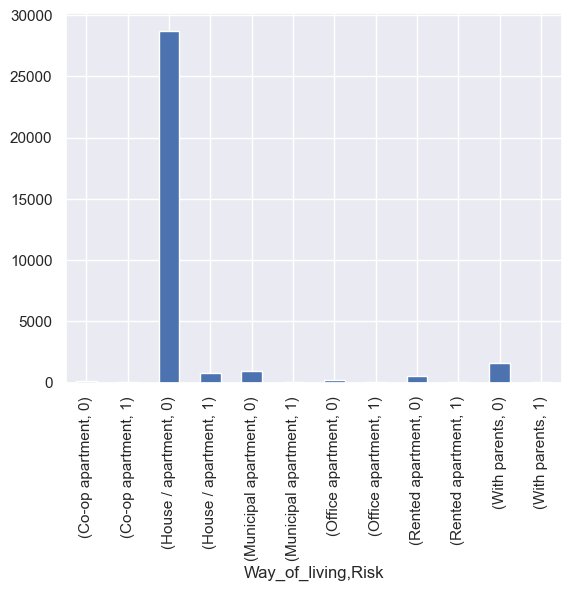

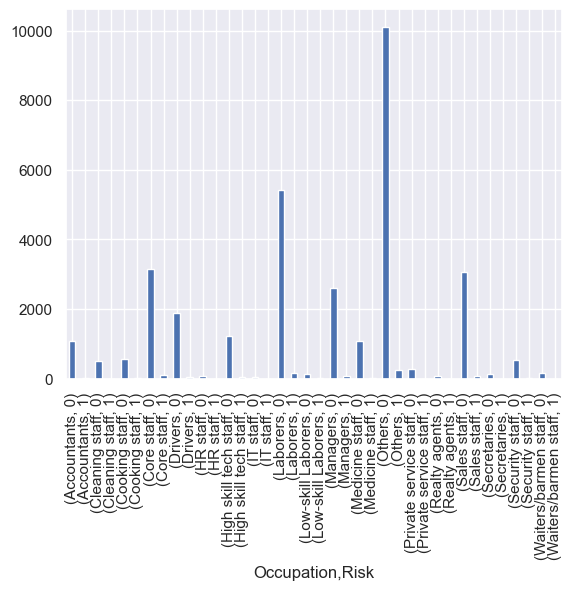

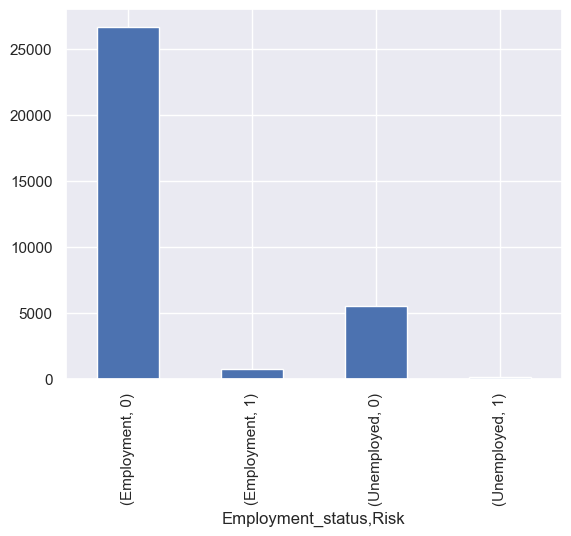

In [40]:
column = ['Gender', 'Own_car', 'Own_property', 'Income_type', 'Education_level',
       'Marital_status', 'Way_of_living', 'Occupation', 'Employment_status']
for variable in column:
    df.groupby(variable)['Risk'].value_counts().plot(kind='bar')
    plt.show()

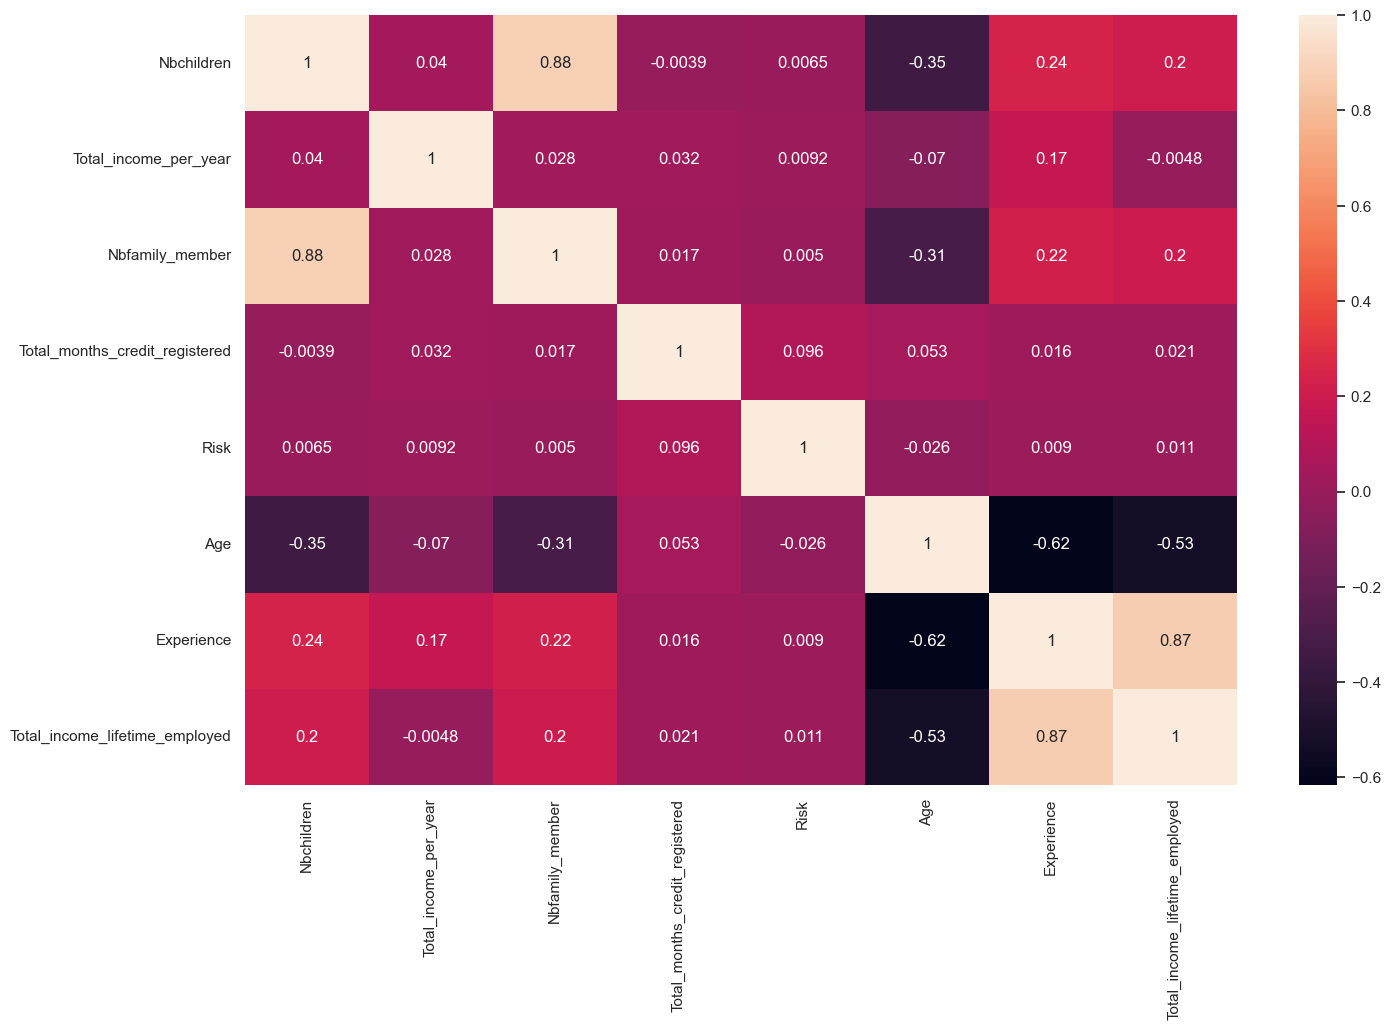

In [41]:
plt.figure(figsize = (16,10))
sns.heatmap(df.corr(),annot= True)
plt.show()

### DATA PREPROCESSING

In [41]:
X = df.drop(['Risk'],axis=1)
y = df['Risk']

In [42]:
X['Rand'] = np.random.randint(1,10,len(X))

In [43]:
X.select_dtypes(include=['object', 'category']).columns


Index(['Gender', 'Own_car', 'Own_property', 'Income_type', 'Education_level',
       'Marital_status', 'Way_of_living', 'Workphone', 'Phone', 'Email',
       'Occupation', 'Employment_status'],
      dtype='object')

In [44]:
X.select_dtypes(include=['number']).columns


Index(['Nbchildren', 'Total_income_per_year', 'Nbfamily_member',
       'Total_months_credit_registered', 'Age', 'Experience',
       'Total_income_lifetime_employed', 'Rand'],
      dtype='object')

In [45]:
X =  X[['Gender', 'Own_car', 'Own_property', 'Income_type', 'Education_level',
       'Marital_status', 'Way_of_living', 'Workphone', 'Phone', 'Email',
       'Occupation', 'Employment_status','Nbchildren', 'Total_income_per_year', 'Nbfamily_member', 'Age', 'Experience','Total_months_credit_registered',
       'Total_income_lifetime_employed', 'Rand']]

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,stratify=y,random_state=365)

### In case use SMOTENC

In [48]:
# from imblearn.over_sampling import SMOTENC
# oversample = SMOTENC(categorical_features = range(0,12),random_state=43)
# X_train_balanced,y_train_balanced = oversample.fit_resample(X_train, y_train)

In [49]:
# from sklearn.feature_extraction import DictVectorizer
# encoded = DictVectorizer(sparse=False)
# X_train_dict = encoded.fit_transform(X_train_balanced.to_dict('records'))
# X_test_dict  = encoded.transform(X_test.to_dict('records'))
# print(X_train_dict.shape)
# print(X_train_dict)

### SCALING, OVERSAMPLING, ENCODING

In [47]:
from sklearn.feature_extraction import DictVectorizer
encoded = DictVectorizer(sparse=False)
X_train_dict = encoded.fit_transform(X_train.to_dict('records'))
X_test_dict  = encoded.transform(X_test.to_dict('records'))

In [48]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(random_state=365)
X_train_balanced,y_train_balanced = oversample.fit_resample(X_train_dict,y_train)

In [49]:
# data standarization 
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test_dict)

In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score

### Write in function

decision_model = DecisionTreeClassifier(random_state=420)

decision_model.fit(X_train_scaled, y_train_balanced)

print('Decision Tree Model Accuracy : ', decision_model.score(X_test_scaled, y_test)*100, '%')

prediction = decision_model.predict(X_test_scaled)
print('\nConfusion matrix :')
print(confusion_matrix(y_test, prediction))
      
print('\nClassification report:')      
print(classification_report(y_test, prediction))

print('\ROC_AUC_SCORE report:')
print(roc_auc_score(y_test, prediction))

Decision Tree Model Accuracy :  94.75718772650399 %

Confusion matrix :
[[7791  256]
 [ 178   53]]

Classification report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      8047
           1       0.17      0.23      0.20       231

    accuracy                           0.95      8278
   macro avg       0.57      0.60      0.58      8278
weighted avg       0.96      0.95      0.95      8278

\ROC_AUC_SCORE report:
0.5988120656941336


In [51]:
from sklearn.svm import SVC

svc_model = SVC(random_state=420)

svc_model.fit(X_train_scaled, y_train_balanced)

print('Support Vector Classifier Accuracy : ', svc_model.score(X_test_scaled, y_test)*100, '%')

prediction = svc_model.predict(X_test_scaled)
print('\nConfusion matrix :')
print(confusion_matrix(y_test, prediction))
      
print('\nClassification report:')      
print(classification_report(y_test, prediction))

print('\ROC_AUC_SCORE report:')
print(roc_auc_score(y_test,prediction))

Support Vector Classifier Accuracy :  95.65112345977289 %


KeyboardInterrupt: 

In [68]:
from sklearn.ensemble import RandomForestClassifier

Random_model  = RandomForestClassifier(random_state=420)

Random_model.fit(X_train_scaled, y_train_balanced)

print('Random forest Model Accuracy : ', Random_model.score(X_test_scaled, y_test)*100, '%')

prediction = Random_model.predict(X_test_scaled)
print('\nConfusion matrix :')
print(confusion_matrix(y_test, prediction))
      
print('\nClassification report:')      
print(classification_report(y_test, prediction))

print('\ROC_AUC_SCORE report:')
print(roc_auc_score(y_test,prediction))

Random forest Model Accuracy :  97.35443343802851 %

Confusion matrix :
[[8006   41]
 [ 178   53]]

Classification report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      8047
           1       0.56      0.23      0.33       231

    accuracy                           0.97      8278
   macro avg       0.77      0.61      0.66      8278
weighted avg       0.97      0.97      0.97      8278

\ROC_AUC_SCORE report:
0.6121710814764126


In [61]:
from lightgbm import LGBMClassifier
LGBM_model  = LGBMClassifier()

LGBM_model.fit(X_train_scaled, y_train_balanced)

print('Light GBM Model Accuracy : ', LGBM_model.score(X_test_scaled, y_test)*100, '%')

prediction = LGBM_model.predict(X_test_scaled)
print('\nConfusion matrix :')
print(confusion_matrix(y_test, prediction))
      
print('\nClassification report:')      
print(classification_report(y_test, prediction))

print('\ROC_AUC_SCORE report:')
print(roc_auc_score(y_test,prediction))

ModuleNotFoundError: No module named 'lightgbm'

In [58]:
y_train_balanced = y_train_balanced.astype('int')
y_test = y_test.astype('int')
from xgboost import XGBClassifier
XGB_model  =XGBClassifier(use_label_encoder=False,objective='binary:logistic',eval_metric= 'error')

XGB_model.fit(X_train_scaled, y_train_balanced)

print('Xg Boost Model Accuracy : ', XGB_model.score(X_test_scaled, y_test)*100, '%')

prediction = XGB_model.predict(X_test_scaled)
print('\nConfusion matrix :')
print(confusion_matrix(y_test, prediction))
      
print('\nClassification report:')      
print(classification_report(y_test, prediction))

print('\ROC_AUC_SCORE report:')
print(roc_auc_score(y_test,prediction))

/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


Xg Boost Model Accuracy :  97.21785411878552 %

Confusion matrix :
[[8021   16]
 [ 214   16]]

Classification report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      8037
           1       0.50      0.07      0.12       230

    accuracy                           0.97      8267
   macro avg       0.74      0.53      0.55      8267
weighted avg       0.96      0.97      0.96      8267

\ROC_AUC_SCORE report:
0.5337872124035034


### Hyperparameter tuning

In [59]:
import optuna

In [60]:
from optuna.integration import LightGBMPruningCallback

In [61]:
def LGBM_Optuna(trial,X_train_scaled = X_train_scaled,X_test_scaled = X_test_scaled,y_train_balanced = y_train_balanced,y_test = y_test):
    param_grid = {
        "n_estimators": trial.suggest_categorical("n_estimators", [100,200,1000,3000]),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.1),
        "num_leaves": trial.suggest_int("num_leaves", 20, 3000, step=20),
        "max_depth": trial.suggest_int("max_depth", 3, 4,5),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 100,200,1000),
        "lambda_l1": trial.suggest_int("lambda_l1", 0, 100, step=5),
        "lambda_l2": trial.suggest_int("lambda_l2", 0, 100, step=5),
        "min_gain_to_split": trial.suggest_float("min_gain_to_split", 0, 15),
        "bagging_fraction": trial.suggest_float(
            "bagging_fraction", 0.2, 0.95, step=0.1
        ),
        "bagging_freq": trial.suggest_categorical("bagging_freq", [1]),
        "feature_fraction": trial.suggest_float(
            "feature_fraction", 0.2, 0.95, step=0.1
        ),
    }
    
    model = LGBMClassifier(objective ="binary",**param_grid)
    model.fit(
            X_train_scaled,
            y_train_balanced,
            eval_set=[(X_test_scaled, y_test)],
            eval_metric="binary_logloss",
            early_stopping_rounds=100,
            callbacks=[
                LightGBMPruningCallback(trial, "binary_logloss")
            ],
        )
    y_preds = model.predict_proba(X_test_scaled)[:, 1]
    score = roc_auc_score(y_test, y_preds)

    return score


In [62]:
study = optuna.create_study(direction="minimize", study_name="LGBM Classifier")
study.optimize(LGBM_Optuna, n_trials=200)

[I 2023-04-07 08:15:00,072] A new study created in memory with name: LGBM Classifier
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and step=5, but the range is not divisible by `step`. It will be replaced by [3, 3].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [100, 200] and step=1000, but the range is not divisible by `step`. It will be replaced by [100, 100].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:701: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(


[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l2 is set=80, reg_lambda=0.0 will be ignored. Current value: lambda_l2=80
[LightGBM] [Warning] feature_fraction is set=0.30000000000000004, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.30000000000000004
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] min_gain_to_split is set=8.342080219385709, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=8.342080219385709
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[1]	valid_0's binary_logloss: 0.683814
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.675811
[3

[I 2023-04-07 08:15:08,233] Trial 0 finished with value: 0.6709398380317119 and parameters: {'n_estimators': 3000, 'learning_rate': 0.034797204281644845, 'num_leaves': 940, 'max_depth': 3, 'min_data_in_leaf': 100, 'lambda_l1': 5, 'lambda_l2': 80, 'min_gain_to_split': 8.342080219385709, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.30000000000000004}. Best is trial 0 with value: 0.6709398380317119.
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and step=5, but the range is not divisible by `step`. It will be replaced by [3, 3].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [100, 200] and step=1000, but the range is not divisible by `step`. It will be replaced by [100, 100].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optun

[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l2 is set=85, reg_lambda=0.0 will be ignored. Current value: lambda_l2=85
[LightGBM] [Warning] feature_fraction is set=0.30000000000000004, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.30000000000000004
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] min_gain_to_split is set=9.916061132386316, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=9.916061132386316
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[1]	valid_0's binary_logloss: 0.685231
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.678157
[3

[I 2023-04-07 08:15:28,941] Trial 1 finished with value: 0.6572093199387614 and parameters: {'n_estimators': 3000, 'learning_rate': 0.032108069272391834, 'num_leaves': 2520, 'max_depth': 3, 'min_data_in_leaf': 100, 'lambda_l1': 5, 'lambda_l2': 85, 'min_gain_to_split': 9.916061132386316, 'bagging_fraction': 0.5, 'bagging_freq': 1, 'feature_fraction': 0.30000000000000004}. Best is trial 1 with value: 0.6572093199387614.
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and step=5, but the range is not divisible by `step`. It will be replaced by [3, 3].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [100, 200] and step=1000, but the range is not divisible by `step`. It will be replaced by [100, 100].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optu

[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l2 is set=60, reg_lambda=0.0 will be ignored. Current value: lambda_l2=60
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.30000000000000004, subsample=1.0 will be ignored. Current value: bagging_fraction=0.30000000000000004
[LightGBM] [Warning] min_gain_to_split is set=3.783211890500219, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=3.783211890500219
[LightGBM] [Warning] lambda_l1 is set=20, reg_alpha=0.0 will be ignored. Current value: lambda_l1=20
[1]	valid_0's binary_logloss: 0.69046
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.687643
[

[I 2023-04-07 08:15:54,979] Trial 2 finished with value: 0.6585395805270191 and parameters: {'n_estimators': 3000, 'learning_rate': 0.011321895170874868, 'num_leaves': 1240, 'max_depth': 3, 'min_data_in_leaf': 100, 'lambda_l1': 20, 'lambda_l2': 60, 'min_gain_to_split': 3.783211890500219, 'bagging_fraction': 0.30000000000000004, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 1 with value: 0.6572093199387614.
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and step=5, but the range is not divisible by `step`. It will be replaced by [3, 3].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [100, 200] and step=1000, but the range is not divisible by `step`. It will be replaced by [100, 100].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/opt

[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l2 is set=10, reg_lambda=0.0 will be ignored. Current value: lambda_l2=10
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=0.30000000000000004, subsample=1.0 will be ignored. Current value: bagging_fraction=0.30000000000000004
[LightGBM] [Warning] min_gain_to_split is set=7.68936970850228, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=7.68936970850228
[LightGBM] [Warning] lambda_l1 is set=55, reg_alpha=0.0 will be ignored. Current value: lambda_l1=55
[1]	valid_0's binary_logloss: 0.674829
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.657735
[3

[I 2023-04-07 08:15:58,227] Trial 3 finished with value: 0.6394001114411066 and parameters: {'n_estimators': 3000, 'learning_rate': 0.07588007868858287, 'num_leaves': 2600, 'max_depth': 3, 'min_data_in_leaf': 100, 'lambda_l1': 55, 'lambda_l2': 10, 'min_gain_to_split': 7.68936970850228, 'bagging_fraction': 0.30000000000000004, 'bagging_freq': 1, 'feature_fraction': 0.7}. Best is trial 3 with value: 0.6394001114411066.
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and step=5, but the range is not divisible by `step`. It will be replaced by [3, 3].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [100, 200] and step=1000, but the range is not divisible by `step`. It will be replaced by [100, 100].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optun

[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l2 is set=50, reg_lambda=0.0 will be ignored. Current value: lambda_l2=50
[LightGBM] [Warning] feature_fraction is set=0.6000000000000001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6000000000000001
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] min_gain_to_split is set=5.707045233738104, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=5.707045233738104
[LightGBM] [Warning] lambda_l1 is set=70, reg_alpha=0.0 will be ignored. Current value: lambda_l1=70
[1]	valid_0's binary_logloss: 0.679256
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.66666
[3]

[I 2023-04-07 08:16:02,165] Trial 4 finished with value: 0.6546918869792427 and parameters: {'n_estimators': 3000, 'learning_rate': 0.05118414740029185, 'num_leaves': 1140, 'max_depth': 3, 'min_data_in_leaf': 100, 'lambda_l1': 70, 'lambda_l2': 50, 'min_gain_to_split': 5.707045233738104, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.6000000000000001}. Best is trial 3 with value: 0.6394001114411066.
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and step=5, but the range is not divisible by `step`. It will be replaced by [3, 3].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [100, 200] and step=1000, but the range is not divisible by `step`. It will be replaced by [100, 100].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optun

[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l2 is set=45, reg_lambda=0.0 will be ignored. Current value: lambda_l2=45
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] min_gain_to_split is set=9.90890856583162, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=9.90890856583162
[LightGBM] [Warning] lambda_l1 is set=60, reg_alpha=0.0 will be ignored. Current value: lambda_l1=60
[1]	valid_0's binary_logloss: 0.677636
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.663983
[3]	valid_0's binary_logloss: 0.64

[I 2023-04-07 08:16:05,335] Trial 5 pruned. Trial was pruned at iteration 487.


[454]	valid_0's binary_logloss: 0.190087
[455]	valid_0's binary_logloss: 0.190087
[456]	valid_0's binary_logloss: 0.190087
[457]	valid_0's binary_logloss: 0.190087
[458]	valid_0's binary_logloss: 0.190087
[459]	valid_0's binary_logloss: 0.190087
[460]	valid_0's binary_logloss: 0.190087
[461]	valid_0's binary_logloss: 0.190087
[462]	valid_0's binary_logloss: 0.190087
[463]	valid_0's binary_logloss: 0.190087
[464]	valid_0's binary_logloss: 0.190087
[465]	valid_0's binary_logloss: 0.190087
[466]	valid_0's binary_logloss: 0.190087
[467]	valid_0's binary_logloss: 0.190087
[468]	valid_0's binary_logloss: 0.190087
[469]	valid_0's binary_logloss: 0.190087
[470]	valid_0's binary_logloss: 0.190087
[471]	valid_0's binary_logloss: 0.190087
[472]	valid_0's binary_logloss: 0.190087
[473]	valid_0's binary_logloss: 0.190087
[474]	valid_0's binary_logloss: 0.190087
[475]	valid_0's binary_logloss: 0.190087
[476]	valid_0's binary_logloss: 0.190087
[477]	valid_0's binary_logloss: 0.190087
[478]	valid_0's 

/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and step=5, but the range is not divisible by `step`. It will be replaced by [3, 3].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [100, 200] and step=1000, but the range is not divisible by `step`. It will be replaced by [100, 100].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:701: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(


[1]	valid_0's binary_logloss: 0.682711
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.673129
[3]	valid_0's binary_logloss: 0.65946
[4]	valid_0's binary_logloss: 0.649665
[5]	valid_0's binary_logloss: 0.637192
[6]	valid_0's binary_logloss: 0.62559
[7]	valid_0's binary_logloss: 0.614128
[8]	valid_0's binary_logloss: 0.603539
[9]	valid_0's binary_logloss: 0.593109
[10]	valid_0's binary_logloss: 0.585161
[11]	valid_0's binary_logloss: 0.576946
[12]	valid_0's binary_logloss: 0.570478
[13]	valid_0's binary_logloss: 0.561471
[14]	valid_0's binary_logloss: 0.552016
[15]	valid_0's binary_logloss: 0.544969
[16]	valid_0's binary_logloss: 0.539811
[17]	valid_0's binary_logloss: 0.533932
[18]	valid_0's binary_logloss: 0.526059
[19]	valid_0's binary_logloss: 0.520098
[20]	valid_0's binary_logloss: 0.515037
[21]	valid_0's binary_logloss: 0.509981
[22]	valid_0's binary_logloss: 0.504934
[23]	valid_0's binary_logloss: 0.498874
[24]	valid_0's binary_logloss

[I 2023-04-07 08:16:06,490] Trial 6 finished with value: 0.6321837588111506 and parameters: {'n_estimators': 100, 'learning_rate': 0.04758924089692957, 'num_leaves': 1000, 'max_depth': 3, 'min_data_in_leaf': 100, 'lambda_l1': 80, 'lambda_l2': 60, 'min_gain_to_split': 6.922690221263811, 'bagging_fraction': 0.4, 'bagging_freq': 1, 'feature_fraction': 0.4}. Best is trial 6 with value: 0.6321837588111506.


[80]	valid_0's binary_logloss: 0.354741
[81]	valid_0's binary_logloss: 0.352515
[82]	valid_0's binary_logloss: 0.350549
[83]	valid_0's binary_logloss: 0.348941
[84]	valid_0's binary_logloss: 0.347009
[85]	valid_0's binary_logloss: 0.345609
[86]	valid_0's binary_logloss: 0.344345
[87]	valid_0's binary_logloss: 0.342944
[88]	valid_0's binary_logloss: 0.341472
[89]	valid_0's binary_logloss: 0.340735
[90]	valid_0's binary_logloss: 0.340042
[91]	valid_0's binary_logloss: 0.339137
[92]	valid_0's binary_logloss: 0.337324
[93]	valid_0's binary_logloss: 0.335994
[94]	valid_0's binary_logloss: 0.334864
[95]	valid_0's binary_logloss: 0.333621
[96]	valid_0's binary_logloss: 0.333733
[97]	valid_0's binary_logloss: 0.332395
[98]	valid_0's binary_logloss: 0.331322
[99]	valid_0's binary_logloss: 0.329447
[100]	valid_0's binary_logloss: 0.327743
Did not meet early stopping. Best iteration is:
[100]	valid_0's binary_logloss: 0.327743
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be i

/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and step=5, but the range is not divisible by `step`. It will be replaced by [3, 3].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [100, 200] and step=1000, but the range is not divisible by `step`. It will be replaced by [100, 100].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:701: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
[I 2023-04-07 08:16:06,831] Trial 7 pruned. Trial was pruned at iteration 0.
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and ste

[1]	valid_0's binary_logloss: 0.672064
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.65448
[3]	valid_0's binary_logloss: 0.638546
[4]	valid_0's binary_logloss: 0.625183
[5]	valid_0's binary_logloss: 0.60341
[6]	valid_0's binary_logloss: 0.592474
[7]	valid_0's binary_logloss: 0.57919
[8]	valid_0's binary_logloss: 0.560777
[9]	valid_0's binary_logloss: 0.544076
[10]	valid_0's binary_logloss: 0.535966
[11]	valid_0's binary_logloss: 0.52699
[12]	valid_0's binary_logloss: 0.518736
[13]	valid_0's binary_logloss: 0.504237
[14]	valid_0's binary_logloss: 0.49374
[15]	valid_0's binary_logloss: 0.484479
[16]	valid_0's binary_logloss: 0.480937
[17]	valid_0's binary_logloss: 0.474662
[18]	valid_0's binary_logloss: 0.468932
[19]	valid_0's binary_logloss: 0.456638
[20]	valid_0's binary_logloss: 0.449587
[21]	valid_0's binary_logloss: 0.441235
[22]	valid_0's binary_logloss: 0.433748
[23]	valid_0's binary_logloss: 0.430375
[24]	valid_0's binary_logloss: 0

[I 2023-04-07 08:16:12,398] Trial 8 finished with value: 0.6722944425510275 and parameters: {'n_estimators': 1000, 'learning_rate': 0.07866229551036585, 'num_leaves': 2400, 'max_depth': 3, 'min_data_in_leaf': 100, 'lambda_l1': 0, 'lambda_l2': 80, 'min_gain_to_split': 8.820261824085291, 'bagging_fraction': 0.7, 'bagging_freq': 1, 'feature_fraction': 0.6000000000000001}. Best is trial 6 with value: 0.6321837588111506.
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and step=5, but the range is not divisible by `step`. It will be replaced by [3, 3].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [100, 200] and step=1000, but the range is not divisible by `step`. It will be replaced by [100, 100].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna

[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l2 is set=90, reg_lambda=0.0 will be ignored. Current value: lambda_l2=90
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] min_gain_to_split is set=3.720953774514069, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=3.720953774514069
[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[1]	valid_0's binary_logloss: 0.673962
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.657999
[3]	valid_0's binary_logloss: 0.

[I 2023-04-07 08:16:13,342] Trial 9 finished with value: 0.6314466786763393 and parameters: {'n_estimators': 100, 'learning_rate': 0.07231658686839938, 'num_leaves': 240, 'max_depth': 3, 'min_data_in_leaf': 100, 'lambda_l1': 10, 'lambda_l2': 90, 'min_gain_to_split': 3.720953774514069, 'bagging_fraction': 0.7, 'bagging_freq': 1, 'feature_fraction': 0.4}. Best is trial 9 with value: 0.6314466786763393.


[76]	valid_0's binary_logloss: 0.282997
[77]	valid_0's binary_logloss: 0.281829
[78]	valid_0's binary_logloss: 0.281275
[79]	valid_0's binary_logloss: 0.280315
[80]	valid_0's binary_logloss: 0.278403
[81]	valid_0's binary_logloss: 0.276361
[82]	valid_0's binary_logloss: 0.274699
[83]	valid_0's binary_logloss: 0.273396
[84]	valid_0's binary_logloss: 0.271848
[85]	valid_0's binary_logloss: 0.270456
[86]	valid_0's binary_logloss: 0.268091
[87]	valid_0's binary_logloss: 0.265805
[88]	valid_0's binary_logloss: 0.265351
[89]	valid_0's binary_logloss: 0.264986
[90]	valid_0's binary_logloss: 0.264476
[91]	valid_0's binary_logloss: 0.264047
[92]	valid_0's binary_logloss: 0.262364
[93]	valid_0's binary_logloss: 0.261588
[94]	valid_0's binary_logloss: 0.260362
[95]	valid_0's binary_logloss: 0.25911
[96]	valid_0's binary_logloss: 0.257097
[97]	valid_0's binary_logloss: 0.255515
[98]	valid_0's binary_logloss: 0.255144
[99]	valid_0's binary_logloss: 0.253575
[100]	valid_0's binary_logloss: 0.253231


/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and step=5, but the range is not divisible by `step`. It will be replaced by [3, 3].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [100, 200] and step=1000, but the range is not divisible by `step`. It will be replaced by [100, 100].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:701: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(


[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l2 is set=100, reg_lambda=0.0 will be ignored. Current value: lambda_l2=100
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] min_gain_to_split is set=0.052446842130464244, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.052446842130464244
[LightGBM] [Warning] lambda_l1 is set=100, reg_alpha=0.0 will be ignored. Current value: lambda_l1=100
[1]	valid_0's binary_logloss: 0.668765
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.648131
[3]	valid_0's binary_l

[I 2023-04-07 08:16:14,749] Trial 10 finished with value: 0.6619374523264684 and parameters: {'n_estimators': 200, 'learning_rate': 0.09826338758444902, 'num_leaves': 40, 'max_depth': 3, 'min_data_in_leaf': 100, 'lambda_l1': 100, 'lambda_l2': 100, 'min_gain_to_split': 0.052446842130464244, 'bagging_fraction': 0.7, 'bagging_freq': 1, 'feature_fraction': 0.9}. Best is trial 9 with value: 0.6314466786763393.


[172]	valid_0's binary_logloss: 0.193494
[173]	valid_0's binary_logloss: 0.193092
[174]	valid_0's binary_logloss: 0.192634
[175]	valid_0's binary_logloss: 0.192271
[176]	valid_0's binary_logloss: 0.192021
[177]	valid_0's binary_logloss: 0.191666
[178]	valid_0's binary_logloss: 0.191395
[179]	valid_0's binary_logloss: 0.191223
[180]	valid_0's binary_logloss: 0.19188
[181]	valid_0's binary_logloss: 0.191526
[182]	valid_0's binary_logloss: 0.191159
[183]	valid_0's binary_logloss: 0.190899
[184]	valid_0's binary_logloss: 0.190724
[185]	valid_0's binary_logloss: 0.190364
[186]	valid_0's binary_logloss: 0.190312
[187]	valid_0's binary_logloss: 0.190192
[188]	valid_0's binary_logloss: 0.189774
[189]	valid_0's binary_logloss: 0.189561
[190]	valid_0's binary_logloss: 0.189255
[191]	valid_0's binary_logloss: 0.189017
[192]	valid_0's binary_logloss: 0.188793
[193]	valid_0's binary_logloss: 0.188793
[194]	valid_0's binary_logloss: 0.188576
[195]	valid_0's binary_logloss: 0.18819
[196]	valid_0's bi

/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and step=5, but the range is not divisible by `step`. It will be replaced by [3, 3].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [100, 200] and step=1000, but the range is not divisible by `step`. It will be replaced by [100, 100].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:701: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(


[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l2 is set=65, reg_lambda=0.0 will be ignored. Current value: lambda_l2=65
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] min_gain_to_split is set=13.963326196256862, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=13.963326196256862
[LightGBM] [Warning] lambda_l1 is set=85, reg_alpha=0.0 will be ignored. Current value: lambda_l1=85
[1]	valid_0's binary_logloss: 0.678945
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.665984
[3]	valid_0's binary_logloss: 

[I 2023-04-07 08:16:16,021] Trial 11 finished with value: 0.6264107308048104 and parameters: {'n_estimators': 100, 'learning_rate': 0.06252856249501978, 'num_leaves': 160, 'max_depth': 3, 'min_data_in_leaf': 100, 'lambda_l1': 85, 'lambda_l2': 65, 'min_gain_to_split': 13.963326196256862, 'bagging_fraction': 0.5, 'bagging_freq': 1, 'feature_fraction': 0.4}. Best is trial 11 with value: 0.6264107308048104.


[98]	valid_0's binary_logloss: 0.295066
[99]	valid_0's binary_logloss: 0.293738
[100]	valid_0's binary_logloss: 0.292177
Did not meet early stopping. Best iteration is:
[100]	valid_0's binary_logloss: 0.292177
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l2 is set=100, reg_lambda=0.0 will be ignored. Current value: lambda_l2=100
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.6000000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6000000000000001
[LightGBM] [Warning] min_gain_to_split is set=13.99026895527022, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=13.99026895527022
[LightGBM] [Warning] lambda_l1 

/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and step=5, but the range is not divisible by `step`. It will be replaced by [3, 3].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [100, 200] and step=1000, but the range is not divisible by `step`. It will be replaced by [100, 100].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:701: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(


[1]	valid_0's binary_logloss: 0.677986
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.664913
[3]	valid_0's binary_logloss: 0.646092
[4]	valid_0's binary_logloss: 0.626602
[5]	valid_0's binary_logloss: 0.614998
[6]	valid_0's binary_logloss: 0.602918
[7]	valid_0's binary_logloss: 0.587179
[8]	valid_0's binary_logloss: 0.57666
[9]	valid_0's binary_logloss: 0.565118
[10]	valid_0's binary_logloss: 0.557884
[11]	valid_0's binary_logloss: 0.553776
[12]	valid_0's binary_logloss: 0.540352
[13]	valid_0's binary_logloss: 0.526942
[14]	valid_0's binary_logloss: 0.517403
[15]	valid_0's binary_logloss: 0.50617
[16]	valid_0's binary_logloss: 0.497017
[17]	valid_0's binary_logloss: 0.486366
[18]	valid_0's binary_logloss: 0.479163
[19]	valid_0's binary_logloss: 0.470137
[20]	valid_0's binary_logloss: 0.466343
[21]	valid_0's binary_logloss: 0.457599
[22]	valid_0's binary_logloss: 0.453432
[23]	valid_0's binary_logloss: 0.449122
[24]	valid_0's binary_logloss

[I 2023-04-07 08:16:16,920] Trial 12 finished with value: 0.6182663334252992 and parameters: {'n_estimators': 100, 'learning_rate': 0.07066231734310496, 'num_leaves': 40, 'max_depth': 3, 'min_data_in_leaf': 100, 'lambda_l1': 35, 'lambda_l2': 100, 'min_gain_to_split': 13.99026895527022, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.2}. Best is trial 12 with value: 0.6182663334252992.


[85]	valid_0's binary_logloss: 0.275429
[86]	valid_0's binary_logloss: 0.274756
[87]	valid_0's binary_logloss: 0.273837
[88]	valid_0's binary_logloss: 0.273118
[89]	valid_0's binary_logloss: 0.271842
[90]	valid_0's binary_logloss: 0.270631
[91]	valid_0's binary_logloss: 0.270152
[92]	valid_0's binary_logloss: 0.270165
[93]	valid_0's binary_logloss: 0.2693
[94]	valid_0's binary_logloss: 0.268043
[95]	valid_0's binary_logloss: 0.266726
[96]	valid_0's binary_logloss: 0.265651
[97]	valid_0's binary_logloss: 0.26533
[98]	valid_0's binary_logloss: 0.26418
[99]	valid_0's binary_logloss: 0.262289
[100]	valid_0's binary_logloss: 0.261228
Did not meet early stopping. Best iteration is:
[100]	valid_0's binary_logloss: 0.261228


/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and step=5, but the range is not divisible by `step`. It will be replaced by [3, 3].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [100, 200] and step=1000, but the range is not divisible by `step`. It will be replaced by [100, 100].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:701: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(


[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l2 is set=30, reg_lambda=0.0 will be ignored. Current value: lambda_l2=30
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] min_gain_to_split is set=14.845012713265735, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=14.845012713265735
[LightGBM] [Warning] lambda_l1 is set=35, reg_alpha=0.0 will be ignored. Current value: lambda_l1=35


[I 2023-04-07 08:16:17,529] Trial 13 pruned. Trial was pruned at iteration 0.
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and step=5, but the range is not divisible by `step`. It will be replaced by [3, 3].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [100, 200] and step=1000, but the range is not divisible by `step`. It will be replaced by [100, 100].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:701: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(


[1]	valid_0's binary_logloss: 0.675115
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.660795
[3]	valid_0's binary_logloss: 0.639419
[4]	valid_0's binary_logloss: 0.617055
[5]	valid_0's binary_logloss: 0.604379
[6]	valid_0's binary_logloss: 0.590364
[7]	valid_0's binary_logloss: 0.572872
[8]	valid_0's binary_logloss: 0.561929
[9]	valid_0's binary_logloss: 0.549783
[10]	valid_0's binary_logloss: 0.54175
[11]	valid_0's binary_logloss: 0.537363
[12]	valid_0's binary_logloss: 0.522791
[13]	valid_0's binary_logloss: 0.50824
[14]	valid_0's binary_logloss: 0.497883
[15]	valid_0's binary_logloss: 0.487781
[16]	valid_0's binary_logloss: 0.479677
[17]	valid_0's binary_logloss: 0.468635
[18]	valid_0's binary_logloss: 0.461381
[19]	valid_0's binary_logloss: 0.451958
[20]	valid_0's binary_logloss: 0.446407
[21]	valid_0's binary_logloss: 0.436806
[22]	valid_0's binary_logloss: 0.432474
[23]	valid_0's binary_logloss: 0.428114
[24]	valid_0's binary_logloss

[I 2023-04-07 08:16:18,332] Trial 14 finished with value: 0.6174616312597714 and parameters: {'n_estimators': 100, 'learning_rate': 0.08558229734842161, 'num_leaves': 420, 'max_depth': 3, 'min_data_in_leaf': 100, 'lambda_l1': 95, 'lambda_l2': 70, 'min_gain_to_split': 14.256993914200514, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.2}. Best is trial 14 with value: 0.6174616312597714.
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and step=5, but the range is not divisible by `step`. It will be replaced by [3, 3].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [100, 200] and step=1000, but the range is not divisible by `step`. It will be replaced by [100, 100].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optu

[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l2 is set=100, reg_lambda=0.0 will be ignored. Current value: lambda_l2=100
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.6000000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6000000000000001
[LightGBM] [Warning] min_gain_to_split is set=12.98839665072903, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=12.98839665072903
[LightGBM] [Warning] lambda_l1 is set=35, reg_alpha=0.0 will be ignored. Current value: lambda_l1=35
[1]	valid_0's binary_logloss: 0.674626
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.658945


[I 2023-04-07 08:16:19,160] Trial 15 finished with value: 0.6261083250834456 and parameters: {'n_estimators': 100, 'learning_rate': 0.08659179320768082, 'num_leaves': 560, 'max_depth': 3, 'min_data_in_leaf': 100, 'lambda_l1': 35, 'lambda_l2': 100, 'min_gain_to_split': 12.98839665072903, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.2}. Best is trial 14 with value: 0.6174616312597714.
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and step=5, but the range is not divisible by `step`. It will be replaced by [3, 3].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [100, 200] and step=1000, but the range is not divisible by `step`. It will be replaced by [100, 100].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optu

[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l2 is set=70, reg_lambda=0.0 will be ignored. Current value: lambda_l2=70
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_gain_to_split is set=12.036561745686244, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=12.036561745686244
[LightGBM] [Warning] lambda_l1 is set=100, reg_alpha=0.0 will be ignored. Current value: lambda_l1=100
[1]	valid_0's binary_logloss: 0.673943
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.658384
[3]	valid_0's binary_logloss

[I 2023-04-07 08:16:20,361] Trial 16 finished with value: 0.6282002802256952 and parameters: {'n_estimators': 200, 'learning_rate': 0.08678520271971359, 'num_leaves': 1640, 'max_depth': 3, 'min_data_in_leaf': 100, 'lambda_l1': 100, 'lambda_l2': 70, 'min_gain_to_split': 12.036561745686244, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.2}. Best is trial 14 with value: 0.6174616312597714.


[158]	valid_0's binary_logloss: 0.234928
[159]	valid_0's binary_logloss: 0.234928
[160]	valid_0's binary_logloss: 0.234928
[161]	valid_0's binary_logloss: 0.234904
[162]	valid_0's binary_logloss: 0.234904
[163]	valid_0's binary_logloss: 0.234904
[164]	valid_0's binary_logloss: 0.234073
[165]	valid_0's binary_logloss: 0.233281
[166]	valid_0's binary_logloss: 0.233281
[167]	valid_0's binary_logloss: 0.233281
[168]	valid_0's binary_logloss: 0.232894
[169]	valid_0's binary_logloss: 0.232495
[170]	valid_0's binary_logloss: 0.232495
[171]	valid_0's binary_logloss: 0.232495
[172]	valid_0's binary_logloss: 0.232495
[173]	valid_0's binary_logloss: 0.232495
[174]	valid_0's binary_logloss: 0.232495
[175]	valid_0's binary_logloss: 0.232495
[176]	valid_0's binary_logloss: 0.232495
[177]	valid_0's binary_logloss: 0.232495
[178]	valid_0's binary_logloss: 0.232495
[179]	valid_0's binary_logloss: 0.231221
[180]	valid_0's binary_logloss: 0.231221
[181]	valid_0's binary_logloss: 0.231221
[182]	valid_0's 

/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and step=5, but the range is not divisible by `step`. It will be replaced by [3, 3].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [100, 200] and step=1000, but the range is not divisible by `step`. It will be replaced by [100, 100].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:701: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(


[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l2 is set=35, reg_lambda=0.0 will be ignored. Current value: lambda_l2=35
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.6000000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6000000000000001
[LightGBM] [Warning] min_gain_to_split is set=14.952365757562482, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=14.952365757562482
[LightGBM] [Warning] lambda_l1 is set=25, reg_alpha=0.0 will be ignored. Current value: lambda_l1=25
[1]	valid_0's binary_logloss: 0.667805
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.646353


[I 2023-04-07 08:16:21,347] Trial 17 finished with value: 0.6447541533451266 and parameters: {'n_estimators': 100, 'learning_rate': 0.09494648372577064, 'num_leaves': 480, 'max_depth': 3, 'min_data_in_leaf': 100, 'lambda_l1': 25, 'lambda_l2': 35, 'min_gain_to_split': 14.952365757562482, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.5}. Best is trial 14 with value: 0.6174616312597714.


[75]	valid_0's binary_logloss: 0.244764
[76]	valid_0's binary_logloss: 0.243085
[77]	valid_0's binary_logloss: 0.242219
[78]	valid_0's binary_logloss: 0.239798
[79]	valid_0's binary_logloss: 0.23828
[80]	valid_0's binary_logloss: 0.237784
[81]	valid_0's binary_logloss: 0.235814
[82]	valid_0's binary_logloss: 0.23367
[83]	valid_0's binary_logloss: 0.232664
[84]	valid_0's binary_logloss: 0.232154
[85]	valid_0's binary_logloss: 0.230244
[86]	valid_0's binary_logloss: 0.227967
[87]	valid_0's binary_logloss: 0.227199
[88]	valid_0's binary_logloss: 0.225218
[89]	valid_0's binary_logloss: 0.22484
[90]	valid_0's binary_logloss: 0.224472
[91]	valid_0's binary_logloss: 0.222621
[92]	valid_0's binary_logloss: 0.2211
[93]	valid_0's binary_logloss: 0.219578
[94]	valid_0's binary_logloss: 0.219379
[95]	valid_0's binary_logloss: 0.216462
[96]	valid_0's binary_logloss: 0.214816
[97]	valid_0's binary_logloss: 0.214037
[98]	valid_0's binary_logloss: 0.212566
[99]	valid_0's binary_logloss: 0.211818
[100]

/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and step=5, but the range is not divisible by `step`. It will be replaced by [3, 3].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [100, 200] and step=1000, but the range is not divisible by `step`. It will be replaced by [100, 100].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:701: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(


[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l2 is set=75, reg_lambda=0.0 will be ignored. Current value: lambda_l2=75
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.2, subsample=1.0 will be ignored. Current value: bagging_fraction=0.2
[LightGBM] [Warning] min_gain_to_split is set=11.783355417785703, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=11.783355417785703
[LightGBM] [Warning] lambda_l1 is set=45, reg_alpha=0.0 will be ignored. Current value: lambda_l1=45


[I 2023-04-07 08:16:21,748] Trial 18 pruned. Trial was pruned at iteration 0.
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and step=5, but the range is not divisible by `step`. It will be replaced by [3, 3].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [100, 200] and step=1000, but the range is not divisible by `step`. It will be replaced by [100, 100].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:701: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
[I 2023-04-07 08:16:22,132] Trial 19 pruned. Trial was pruned at iteration 0.
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/dis

[1]	valid_0's binary_logloss: 0.674723
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.658517
[3]	valid_0's binary_logloss: 0.63566
[4]	valid_0's binary_logloss: 0.621474
[5]	valid_0's binary_logloss: 0.602042
[6]	valid_0's binary_logloss: 0.591094
[7]	valid_0's binary_logloss: 0.574313
[8]	valid_0's binary_logloss: 0.559067
[9]	valid_0's binary_logloss: 0.544609
[10]	valid_0's binary_logloss: 0.534481
[11]	valid_0's binary_logloss: 0.522817
[12]	valid_0's binary_logloss: 0.514636
[13]	valid_0's binary_logloss: 0.505223
[14]	valid_0's binary_logloss: 0.494959
[15]	valid_0's binary_logloss: 0.487732
[16]	valid_0's binary_logloss: 0.477042
[17]	valid_0's binary_logloss: 0.470134
[18]	valid_0's binary_logloss: 0.462208
[19]	valid_0's binary_logloss: 0.452495
[20]	valid_0's binary_logloss: 0.446028
[21]	valid_0's binary_logloss: 0.443497
[22]	valid_0's binary_logloss: 0.438004
[23]	valid_0's binary_logloss: 0.430117
[24]	valid_0's binary_loglos

/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and step=5, but the range is not divisible by `step`. It will be replaced by [3, 3].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [100, 200] and step=1000, but the range is not divisible by `step`. It will be replaced by [100, 100].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:701: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(


[1]	valid_0's binary_logloss: 0.674108
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.658067
[3]	valid_0's binary_logloss: 0.634893
[4]	valid_0's binary_logloss: 0.611254
[5]	valid_0's binary_logloss: 0.597732
[6]	valid_0's binary_logloss: 0.583409
[7]	valid_0's binary_logloss: 0.565107
[8]	valid_0's binary_logloss: 0.553062
[9]	valid_0's binary_logloss: 0.5404
[10]	valid_0's binary_logloss: 0.532369
[11]	valid_0's binary_logloss: 0.527592
[12]	valid_0's binary_logloss: 0.512457
[13]	valid_0's binary_logloss: 0.496801
[14]	valid_0's binary_logloss: 0.486093
[15]	valid_0's binary_logloss: 0.473971
[16]	valid_0's binary_logloss: 0.465451
[17]	valid_0's binary_logloss: 0.454397
[18]	valid_0's binary_logloss: 0.44657
[19]	valid_0's binary_logloss: 0.436611
[20]	valid_0's binary_logloss: 0.432859
[21]	valid_0's binary_logloss: 0.423754
[22]	valid_0's binary_logloss: 0.419428
[23]	valid_0's binary_logloss: 0.414998
[24]	valid_0's binary_logloss:

[I 2023-04-07 08:16:23,502] Trial 21 finished with value: 0.620581170780791 and parameters: {'n_estimators': 100, 'learning_rate': 0.08850408696833376, 'num_leaves': 600, 'max_depth': 3, 'min_data_in_leaf': 100, 'lambda_l1': 30, 'lambda_l2': 100, 'min_gain_to_split': 13.056646482453973, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.2}. Best is trial 14 with value: 0.6174616312597714.


[99]	valid_0's binary_logloss: 0.24607
[100]	valid_0's binary_logloss: 0.245093
Did not meet early stopping. Best iteration is:
[100]	valid_0's binary_logloss: 0.245093
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l2 is set=90, reg_lambda=0.0 will be ignored. Current value: lambda_l2=90
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.6000000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6000000000000001
[LightGBM] [Warning] min_gain_to_split is set=13.458750918479293, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=13.458750918479293
[LightGBM] [Warning] lambda_l1 is set=25, reg_alpha=0.0 will be ignored.

/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and step=5, but the range is not divisible by `step`. It will be replaced by [3, 3].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [100, 200] and step=1000, but the range is not divisible by `step`. It will be replaced by [100, 100].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:701: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(


[1]	valid_0's binary_logloss: 0.672418
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.655249
[3]	valid_0's binary_logloss: 0.630292
[4]	valid_0's binary_logloss: 0.605054
[5]	valid_0's binary_logloss: 0.590812
[6]	valid_0's binary_logloss: 0.575533
[7]	valid_0's binary_logloss: 0.556147
[8]	valid_0's binary_logloss: 0.543505
[9]	valid_0's binary_logloss: 0.529785
[10]	valid_0's binary_logloss: 0.521454
[11]	valid_0's binary_logloss: 0.516368
[12]	valid_0's binary_logloss: 0.500329
[13]	valid_0's binary_logloss: 0.483831
[14]	valid_0's binary_logloss: 0.473234
[15]	valid_0's binary_logloss: 0.463148
[16]	valid_0's binary_logloss: 0.454352
[17]	valid_0's binary_logloss: 0.442633
[18]	valid_0's binary_logloss: 0.434955
[19]	valid_0's binary_logloss: 0.426359
[20]	valid_0's binary_logloss: 0.422642
[21]	valid_0's binary_logloss: 0.413152
[22]	valid_0's binary_logloss: 0.408481
[23]	valid_0's binary_logloss: 0.404101
[24]	valid_0's binary_loglo

[I 2023-04-07 08:16:24,333] Trial 22 finished with value: 0.6257174697459034 and parameters: {'n_estimators': 100, 'learning_rate': 0.09493928952667305, 'num_leaves': 720, 'max_depth': 3, 'min_data_in_leaf': 100, 'lambda_l1': 25, 'lambda_l2': 90, 'min_gain_to_split': 13.458750918479293, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.2}. Best is trial 14 with value: 0.6174616312597714.
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and step=5, but the range is not divisible by `step`. It will be replaced by [3, 3].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [100, 200] and step=1000, but the range is not divisible by `step`. It will be replaced by [100, 100].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optu

[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l2 is set=100, reg_lambda=0.0 will be ignored. Current value: lambda_l2=100
[LightGBM] [Warning] feature_fraction is set=0.30000000000000004, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.30000000000000004
[LightGBM] [Warning] bagging_fraction is set=0.4, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4
[LightGBM] [Warning] min_gain_to_split is set=14.677016508051278, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=14.677016508051278
[LightGBM] [Warning] lambda_l1 is set=15, reg_alpha=0.0 will be ignored. Current value: lambda_l1=15
[1]	valid_0's binary_logloss: 0.673212
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.656

[I 2023-04-07 08:16:25,542] Trial 23 finished with value: 0.6264569842738206 and parameters: {'n_estimators': 100, 'learning_rate': 0.0876797318901481, 'num_leaves': 80, 'max_depth': 3, 'min_data_in_leaf': 100, 'lambda_l1': 15, 'lambda_l2': 100, 'min_gain_to_split': 14.677016508051278, 'bagging_fraction': 0.4, 'bagging_freq': 1, 'feature_fraction': 0.30000000000000004}. Best is trial 14 with value: 0.6174616312597714.


[81]	valid_0's binary_logloss: 0.270297
[82]	valid_0's binary_logloss: 0.26929
[83]	valid_0's binary_logloss: 0.26805
[84]	valid_0's binary_logloss: 0.266879
[85]	valid_0's binary_logloss: 0.266194
[86]	valid_0's binary_logloss: 0.263902
[87]	valid_0's binary_logloss: 0.262612
[88]	valid_0's binary_logloss: 0.261246
[89]	valid_0's binary_logloss: 0.261017
[90]	valid_0's binary_logloss: 0.260125
[91]	valid_0's binary_logloss: 0.259874
[92]	valid_0's binary_logloss: 0.258896
[93]	valid_0's binary_logloss: 0.257267
[94]	valid_0's binary_logloss: 0.256789
[95]	valid_0's binary_logloss: 0.255782
[96]	valid_0's binary_logloss: 0.25481
[97]	valid_0's binary_logloss: 0.253344
[98]	valid_0's binary_logloss: 0.252781
[99]	valid_0's binary_logloss: 0.251386
[100]	valid_0's binary_logloss: 0.249649
Did not meet early stopping. Best iteration is:
[100]	valid_0's binary_logloss: 0.249649


/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and step=5, but the range is not divisible by `step`. It will be replaced by [3, 3].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [100, 200] and step=1000, but the range is not divisible by `step`. It will be replaced by [100, 100].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:701: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(


[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l2 is set=75, reg_lambda=0.0 will be ignored. Current value: lambda_l2=75
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_gain_to_split is set=11.036883655885955, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=11.036883655885955
[LightGBM] [Warning] lambda_l1 is set=50, reg_alpha=0.0 will be ignored. Current value: lambda_l1=50


[I 2023-04-07 08:16:25,940] Trial 24 pruned. Trial was pruned at iteration 0.
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and step=5, but the range is not divisible by `step`. It will be replaced by [3, 3].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [100, 200] and step=1000, but the range is not divisible by `step`. It will be replaced by [100, 100].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:701: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(


[1]	valid_0's binary_logloss: 0.67295
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.655985
[3]	valid_0's binary_logloss: 0.631434
[4]	valid_0's binary_logloss: 0.615343
[5]	valid_0's binary_logloss: 0.596566
[6]	valid_0's binary_logloss: 0.58389
[7]	valid_0's binary_logloss: 0.565071
[8]	valid_0's binary_logloss: 0.548336
[9]	valid_0's binary_logloss: 0.532133
[10]	valid_0's binary_logloss: 0.5207
[11]	valid_0's binary_logloss: 0.516451
[12]	valid_0's binary_logloss: 0.507273
[13]	valid_0's binary_logloss: 0.494574
[14]	valid_0's binary_logloss: 0.482427
[15]	valid_0's binary_logloss: 0.473876
[16]	valid_0's binary_logloss: 0.464943
[17]	valid_0's binary_logloss: 0.457815
[18]	valid_0's binary_logloss: 0.44705
[19]	valid_0's binary_logloss: 0.439009
[20]	valid_0's binary_logloss: 0.43233
[21]	valid_0's binary_logloss: 0.427288
[22]	valid_0's binary_logloss: 0.422362
[23]	valid_0's binary_logloss: 0.420655
[24]	valid_0's binary_logloss: 0.

[I 2023-04-07 08:16:27,177] Trial 25 finished with value: 0.6316438645179089 and parameters: {'n_estimators': 100, 'learning_rate': 0.08169178577933535, 'num_leaves': 360, 'max_depth': 3, 'min_data_in_leaf': 100, 'lambda_l1': 30, 'lambda_l2': 50, 'min_gain_to_split': 12.906107464114621, 'bagging_fraction': 0.5, 'bagging_freq': 1, 'feature_fraction': 0.30000000000000004}. Best is trial 14 with value: 0.6174616312597714.
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and step=5, but the range is not divisible by `step`. It will be replaced by [3, 3].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [100, 200] and step=1000, but the range is not divisible by `step`. It will be replaced by [100, 100].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/opt

[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l2 is set=85, reg_lambda=0.0 will be ignored. Current value: lambda_l2=85
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.6000000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6000000000000001
[LightGBM] [Warning] min_gain_to_split is set=13.795472846985678, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=13.795472846985678
[LightGBM] [Warning] lambda_l1 is set=45, reg_alpha=0.0 will be ignored. Current value: lambda_l1=45
[1]	valid_0's binary_logloss: 0.673429
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.656929


[I 2023-04-07 08:16:28,011] Trial 26 finished with value: 0.6229698513938253 and parameters: {'n_estimators': 100, 'learning_rate': 0.09204495122255613, 'num_leaves': 1500, 'max_depth': 3, 'min_data_in_leaf': 100, 'lambda_l1': 45, 'lambda_l2': 85, 'min_gain_to_split': 13.795472846985678, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.2}. Best is trial 14 with value: 0.6174616312597714.
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and step=5, but the range is not divisible by `step`. It will be replaced by [3, 3].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [100, 200] and step=1000, but the range is not divisible by `step`. It will be replaced by [100, 100].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/opt

[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l2 is set=20, reg_lambda=0.0 will be ignored. Current value: lambda_l2=20
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] min_gain_to_split is set=11.05844623945475, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=11.05844623945475
[LightGBM] [Warning] lambda_l1 is set=70, reg_alpha=0.0 will be ignored. Current value: lambda_l1=70
[1]	valid_0's binary_logloss: 0.667147
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.645109
[3]	valid_0's binary_logloss: 0.

[I 2023-04-07 08:16:29,000] Trial 27 finished with value: 0.6360219852746265 and parameters: {'n_estimators': 100, 'learning_rate': 0.09934113082769616, 'num_leaves': 20, 'max_depth': 3, 'min_data_in_leaf': 100, 'lambda_l1': 70, 'lambda_l2': 20, 'min_gain_to_split': 11.05844623945475, 'bagging_fraction': 0.7, 'bagging_freq': 1, 'feature_fraction': 0.5}. Best is trial 14 with value: 0.6174616312597714.


[75]	valid_0's binary_logloss: 0.240659
[76]	valid_0's binary_logloss: 0.240107
[77]	valid_0's binary_logloss: 0.239897
[78]	valid_0's binary_logloss: 0.238341
[79]	valid_0's binary_logloss: 0.236168
[80]	valid_0's binary_logloss: 0.235401
[81]	valid_0's binary_logloss: 0.234356
[82]	valid_0's binary_logloss: 0.232822
[83]	valid_0's binary_logloss: 0.232371
[84]	valid_0's binary_logloss: 0.231719
[85]	valid_0's binary_logloss: 0.230145
[86]	valid_0's binary_logloss: 0.22754
[87]	valid_0's binary_logloss: 0.226883
[88]	valid_0's binary_logloss: 0.225198
[89]	valid_0's binary_logloss: 0.222753
[90]	valid_0's binary_logloss: 0.22223
[91]	valid_0's binary_logloss: 0.219787
[92]	valid_0's binary_logloss: 0.218594
[93]	valid_0's binary_logloss: 0.216464
[94]	valid_0's binary_logloss: 0.2163
[95]	valid_0's binary_logloss: 0.215914
[96]	valid_0's binary_logloss: 0.214678
[97]	valid_0's binary_logloss: 0.214678
[98]	valid_0's binary_logloss: 0.214251
[99]	valid_0's binary_logloss: 0.213876
[100

/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and step=5, but the range is not divisible by `step`. It will be replaced by [3, 3].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [100, 200] and step=1000, but the range is not divisible by `step`. It will be replaced by [100, 100].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:701: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(


[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l2 is set=65, reg_lambda=0.0 will be ignored. Current value: lambda_l2=65
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] min_gain_to_split is set=12.68787850752197, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=12.68787850752197
[LightGBM] [Warning] lambda_l1 is set=35, reg_alpha=0.0 will be ignored. Current value: lambda_l1=35
[1]	valid_0's binary_logloss: 0.67096
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.652305
[3]	valid_0's binary_logloss: 0.6

[I 2023-04-07 08:16:30,552] Trial 28 finished with value: 0.6398055731372836 and parameters: {'n_estimators': 100, 'learning_rate': 0.0901600200431541, 'num_leaves': 340, 'max_depth': 3, 'min_data_in_leaf': 100, 'lambda_l1': 35, 'lambda_l2': 65, 'min_gain_to_split': 12.68787850752197, 'bagging_fraction': 0.5, 'bagging_freq': 1, 'feature_fraction': 0.4}. Best is trial 14 with value: 0.6174616312597714.


[93]	valid_0's binary_logloss: 0.240472
[94]	valid_0's binary_logloss: 0.240142
[95]	valid_0's binary_logloss: 0.239213
[96]	valid_0's binary_logloss: 0.236967
[97]	valid_0's binary_logloss: 0.235646
[98]	valid_0's binary_logloss: 0.235355
[99]	valid_0's binary_logloss: 0.234215
[100]	valid_0's binary_logloss: 0.232099
Did not meet early stopping. Best iteration is:
[100]	valid_0's binary_logloss: 0.232099
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l2 is set=80, reg_lambda=0.0 will be ignored. Current value: lambda_l2=80
[LightGBM] [Warning] feature_fraction is set=0.30000000000000004, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.30000000000000004
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagg

/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and step=5, but the range is not divisible by `step`. It will be replaced by [3, 3].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [100, 200] and step=1000, but the range is not divisible by `step`. It will be replaced by [100, 100].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:701: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
[I 2023-04-07 08:16:31,090] Trial 29 pruned. Trial was pruned at iteration 22.


[1]	valid_0's binary_logloss: 0.672832
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.656772
[3]	valid_0's binary_logloss: 0.632538
[4]	valid_0's binary_logloss: 0.616392
[5]	valid_0's binary_logloss: 0.597448
[6]	valid_0's binary_logloss: 0.58514
[7]	valid_0's binary_logloss: 0.566211
[8]	valid_0's binary_logloss: 0.549761
[9]	valid_0's binary_logloss: 0.533743
[10]	valid_0's binary_logloss: 0.523324
[11]	valid_0's binary_logloss: 0.509152
[12]	valid_0's binary_logloss: 0.500652
[13]	valid_0's binary_logloss: 0.4895
[14]	valid_0's binary_logloss: 0.477752
[15]	valid_0's binary_logloss: 0.473992
[16]	valid_0's binary_logloss: 0.466315
[17]	valid_0's binary_logloss: 0.458966
[18]	valid_0's binary_logloss: 0.450034
[19]	valid_0's binary_logloss: 0.440136
[20]	valid_0's binary_logloss: 0.434204
[21]	valid_0's binary_logloss: 0.432172
[22]	valid_0's binary_logloss: 0.427452


/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and step=5, but the range is not divisible by `step`. It will be replaced by [3, 3].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [100, 200] and step=1000, but the range is not divisible by `step`. It will be replaced by [100, 100].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:701: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
[I 2023-04-07 08:16:31,500] Trial 30 pruned. Trial was pruned at iteration 0.
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and st

[1]	valid_0's binary_logloss: 0.673586
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.657201
[3]	valid_0's binary_logloss: 0.633514
[4]	valid_0's binary_logloss: 0.609251
[5]	valid_0's binary_logloss: 0.595478
[6]	valid_0's binary_logloss: 0.580724
[7]	valid_0's binary_logloss: 0.561856
[8]	valid_0's binary_logloss: 0.549537
[9]	valid_0's binary_logloss: 0.536713
[10]	valid_0's binary_logloss: 0.528661
[11]	valid_0's binary_logloss: 0.523829
[12]	valid_0's binary_logloss: 0.508657
[13]	valid_0's binary_logloss: 0.493018
[14]	valid_0's binary_logloss: 0.482334
[15]	valid_0's binary_logloss: 0.470275
[16]	valid_0's binary_logloss: 0.460141
[17]	valid_0's binary_logloss: 0.449129
[18]	valid_0's binary_logloss: 0.441436
[19]	valid_0's binary_logloss: 0.431522
[20]	valid_0's binary_logloss: 0.427843
[21]	valid_0's binary_logloss: 0.418951
[22]	valid_0's binary_logloss: 0.41479
[23]	valid_0's binary_logloss: 0.410387
[24]	valid_0's binary_loglos

[I 2023-04-07 08:16:32,344] Trial 31 finished with value: 0.6226877322816755 and parameters: {'n_estimators': 100, 'learning_rate': 0.09130233259287546, 'num_leaves': 1460, 'max_depth': 3, 'min_data_in_leaf': 100, 'lambda_l1': 45, 'lambda_l2': 85, 'min_gain_to_split': 14.07402317841941, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.2}. Best is trial 14 with value: 0.6174616312597714.


[100]	valid_0's binary_logloss: 0.241804
Did not meet early stopping. Best iteration is:
[99]	valid_0's binary_logloss: 0.241804
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l2 is set=85, reg_lambda=0.0 will be ignored. Current value: lambda_l2=85
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.6000000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6000000000000001
[LightGBM] [Warning] min_gain_to_split is set=13.705659409496633, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=13.705659409496633
[LightGBM] [Warning] lambda_l1 is set=50, reg_alpha=0.0 will be ignored. Current value: lambda_l1=50


/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and step=5, but the range is not divisible by `step`. It will be replaced by [3, 3].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [100, 200] and step=1000, but the range is not divisible by `step`. It will be replaced by [100, 100].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:701: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(


[1]	valid_0's binary_logloss: 0.673652
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.657632
[3]	valid_0's binary_logloss: 0.634448
[4]	valid_0's binary_logloss: 0.610623
[5]	valid_0's binary_logloss: 0.597081
[6]	valid_0's binary_logloss: 0.582554
[7]	valid_0's binary_logloss: 0.563977
[8]	valid_0's binary_logloss: 0.551828
[9]	valid_0's binary_logloss: 0.539195
[10]	valid_0's binary_logloss: 0.531245
[11]	valid_0's binary_logloss: 0.526528
[12]	valid_0's binary_logloss: 0.511552
[13]	valid_0's binary_logloss: 0.496108
[14]	valid_0's binary_logloss: 0.485515
[15]	valid_0's binary_logloss: 0.473568
[16]	valid_0's binary_logloss: 0.463509
[17]	valid_0's binary_logloss: 0.452576
[18]	valid_0's binary_logloss: 0.444972
[19]	valid_0's binary_logloss: 0.435097
[20]	valid_0's binary_logloss: 0.431383
[21]	valid_0's binary_logloss: 0.422511
[22]	valid_0's binary_logloss: 0.418325
[23]	valid_0's binary_logloss: 0.413917
[24]	valid_0's binary_loglo

[I 2023-04-07 08:16:33,194] Trial 32 finished with value: 0.6243201281031749 and parameters: {'n_estimators': 100, 'learning_rate': 0.08984321018383176, 'num_leaves': 1400, 'max_depth': 3, 'min_data_in_leaf': 100, 'lambda_l1': 50, 'lambda_l2': 85, 'min_gain_to_split': 13.705659409496633, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.2}. Best is trial 14 with value: 0.6174616312597714.


[98]	valid_0's binary_logloss: 0.248259
[99]	valid_0's binary_logloss: 0.246151
[100]	valid_0's binary_logloss: 0.246151
Did not meet early stopping. Best iteration is:
[100]	valid_0's binary_logloss: 0.246151
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l2 is set=95, reg_lambda=0.0 will be ignored. Current value: lambda_l2=95
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] min_gain_to_split is set=12.421072741510624, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=12.421072741510624
[LightGBM] [Warning] lambda_l1 is set=25, reg_alpha=0.0 will 

/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and step=5, but the range is not divisible by `step`. It will be replaced by [3, 3].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [100, 200] and step=1000, but the range is not divisible by `step`. It will be replaced by [100, 100].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:701: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
[I 2023-04-07 08:16:33,607] Trial 33 pruned. Trial was pruned at iteration 0.
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and st

[1]	valid_0's binary_logloss: 0.670333
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.651748
[3]	valid_0's binary_logloss: 0.624684
[4]	valid_0's binary_logloss: 0.607321
[5]	valid_0's binary_logloss: 0.586568
[6]	valid_0's binary_logloss: 0.572625
[7]	valid_0's binary_logloss: 0.552109
[8]	valid_0's binary_logloss: 0.534512
[9]	valid_0's binary_logloss: 0.517327
[10]	valid_0's binary_logloss: 0.505831
[11]	valid_0's binary_logloss: 0.501014
[12]	valid_0's binary_logloss: 0.491643
[13]	valid_0's binary_logloss: 0.477636
[14]	valid_0's binary_logloss: 0.465126
[15]	valid_0's binary_logloss: 0.462312
[16]	valid_0's binary_logloss: 0.453967
[17]	valid_0's binary_logloss: 0.447589
[18]	valid_0's binary_logloss: 0.439396
[19]	valid_0's binary_logloss: 0.429056
[20]	valid_0's binary_logloss: 0.421995
[21]	valid_0's binary_logloss: 0.414038
[22]	valid_0's binary_logloss: 0.409547
[23]	valid_0's binary_logloss: 0.406697
[24]	valid_0's binary_loglo

[I 2023-04-07 08:16:36,468] Trial 35 pruned. Trial was pruned at iteration 487.


[442]	valid_0's binary_logloss: 0.186396
[443]	valid_0's binary_logloss: 0.186396
[444]	valid_0's binary_logloss: 0.186396
[445]	valid_0's binary_logloss: 0.186396
[446]	valid_0's binary_logloss: 0.186396
[447]	valid_0's binary_logloss: 0.186396
[448]	valid_0's binary_logloss: 0.186396
[449]	valid_0's binary_logloss: 0.186396
[450]	valid_0's binary_logloss: 0.186396
[451]	valid_0's binary_logloss: 0.186396
[452]	valid_0's binary_logloss: 0.186396
[453]	valid_0's binary_logloss: 0.186396
[454]	valid_0's binary_logloss: 0.186396
[455]	valid_0's binary_logloss: 0.186396
[456]	valid_0's binary_logloss: 0.186396
[457]	valid_0's binary_logloss: 0.186396
[458]	valid_0's binary_logloss: 0.186396
[459]	valid_0's binary_logloss: 0.186396
[460]	valid_0's binary_logloss: 0.186396
[461]	valid_0's binary_logloss: 0.186396
[462]	valid_0's binary_logloss: 0.186396
[463]	valid_0's binary_logloss: 0.186396
[464]	valid_0's binary_logloss: 0.186396
[465]	valid_0's binary_logloss: 0.186396
[466]	valid_0's 

/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and step=5, but the range is not divisible by `step`. It will be replaced by [3, 3].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [100, 200] and step=1000, but the range is not divisible by `step`. It will be replaced by [100, 100].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:701: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
[I 2023-04-07 08:16:36,868] Trial 36 pruned. Trial was pruned at iteration 2.


[1]	valid_0's binary_logloss: 0.672617
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.654841


/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and step=5, but the range is not divisible by `step`. It will be replaced by [3, 3].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [100, 200] and step=1000, but the range is not divisible by `step`. It will be replaced by [100, 100].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:701: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
[I 2023-04-07 08:16:37,270] Trial 37 pruned. Trial was pruned at iteration 0.
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and st

[1]	valid_0's binary_logloss: 0.672107
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.652781
[3]	valid_0's binary_logloss: 0.634546


/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and step=5, but the range is not divisible by `step`. It will be replaced by [3, 3].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [100, 200] and step=1000, but the range is not divisible by `step`. It will be replaced by [100, 100].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:701: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
[I 2023-04-07 08:16:38,091] Trial 39 pruned. Trial was pruned at iteration 0.
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and st

[1]	valid_0's binary_logloss: 0.673318
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.656734
[3]	valid_0's binary_logloss: 0.632755
[4]	valid_0's binary_logloss: 0.608213
[5]	valid_0's binary_logloss: 0.594323
[6]	valid_0's binary_logloss: 0.579425
[7]	valid_0's binary_logloss: 0.56038
[8]	valid_0's binary_logloss: 0.547971
[9]	valid_0's binary_logloss: 0.535065
[10]	valid_0's binary_logloss: 0.526971
[11]	valid_0's binary_logloss: 0.522102
[12]	valid_0's binary_logloss: 0.506843
[13]	valid_0's binary_logloss: 0.491118
[14]	valid_0's binary_logloss: 0.480365
[15]	valid_0's binary_logloss: 0.468274
[16]	valid_0's binary_logloss: 0.458099
[17]	valid_0's binary_logloss: 0.44707
[18]	valid_0's binary_logloss: 0.439355
[19]	valid_0's binary_logloss: 0.42941
[20]	valid_0's binary_logloss: 0.425743
[21]	valid_0's binary_logloss: 0.416861
[22]	valid_0's binary_logloss: 0.412713
[23]	valid_0's binary_logloss: 0.40831
[24]	valid_0's binary_logloss: 

[I 2023-04-07 08:16:39,340] Trial 41 finished with value: 0.6217815970700726 and parameters: {'n_estimators': 100, 'learning_rate': 0.0925751354559625, 'num_leaves': 1580, 'max_depth': 3, 'min_data_in_leaf': 100, 'lambda_l1': 45, 'lambda_l2': 85, 'min_gain_to_split': 14.3207898155279, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.2}. Best is trial 14 with value: 0.6174616312597714.


[99]	valid_0's binary_logloss: 0.24237
[100]	valid_0's binary_logloss: 0.24237
Did not meet early stopping. Best iteration is:
[99]	valid_0's binary_logloss: 0.24237
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l2 is set=95, reg_lambda=0.0 will be ignored. Current value: lambda_l2=95
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.6000000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6000000000000001
[LightGBM] [Warning] min_gain_to_split is set=12.037234008333575, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=12.037234008333575
[LightGBM] [Warning] lambda_l1 is set=40, reg_alpha=0.0 will be ignored. Cu

/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and step=5, but the range is not divisible by `step`. It will be replaced by [3, 3].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [100, 200] and step=1000, but the range is not divisible by `step`. It will be replaced by [100, 100].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:701: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(


[1]	valid_0's binary_logloss: 0.67364
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.657227
[3]	valid_0's binary_logloss: 0.633552
[4]	valid_0's binary_logloss: 0.609335
[5]	valid_0's binary_logloss: 0.595589
[6]	valid_0's binary_logloss: 0.580912
[7]	valid_0's binary_logloss: 0.562041
[8]	valid_0's binary_logloss: 0.549794
[9]	valid_0's binary_logloss: 0.537002
[10]	valid_0's binary_logloss: 0.529006
[11]	valid_0's binary_logloss: 0.524243
[12]	valid_0's binary_logloss: 0.509039
[13]	valid_0's binary_logloss: 0.493344
[14]	valid_0's binary_logloss: 0.482661
[15]	valid_0's binary_logloss: 0.470562
[16]	valid_0's binary_logloss: 0.460418
[17]	valid_0's binary_logloss: 0.449539
[18]	valid_0's binary_logloss: 0.441807
[19]	valid_0's binary_logloss: 0.431874
[20]	valid_0's binary_logloss: 0.428215
[21]	valid_0's binary_logloss: 0.419267
[22]	valid_0's binary_logloss: 0.415002
[23]	valid_0's binary_logloss: 0.410586
[24]	valid_0's binary_loglos

[I 2023-04-07 08:16:40,276] Trial 42 finished with value: 0.6245751984030381 and parameters: {'n_estimators': 100, 'learning_rate': 0.09139999394299624, 'num_leaves': 1720, 'max_depth': 3, 'min_data_in_leaf': 100, 'lambda_l1': 40, 'lambda_l2': 95, 'min_gain_to_split': 12.037234008333575, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.2}. Best is trial 14 with value: 0.6174616312597714.


[82]	valid_0's binary_logloss: 0.256727
[83]	valid_0's binary_logloss: 0.255287
[84]	valid_0's binary_logloss: 0.254947
[85]	valid_0's binary_logloss: 0.253775
[86]	valid_0's binary_logloss: 0.253121
[87]	valid_0's binary_logloss: 0.251712
[88]	valid_0's binary_logloss: 0.251517
[89]	valid_0's binary_logloss: 0.250461
[90]	valid_0's binary_logloss: 0.249873
[91]	valid_0's binary_logloss: 0.249412
[92]	valid_0's binary_logloss: 0.249755
[93]	valid_0's binary_logloss: 0.247861
[94]	valid_0's binary_logloss: 0.247357
[95]	valid_0's binary_logloss: 0.24632
[96]	valid_0's binary_logloss: 0.244702
[97]	valid_0's binary_logloss: 0.243784
[98]	valid_0's binary_logloss: 0.243533
[99]	valid_0's binary_logloss: 0.241479
[100]	valid_0's binary_logloss: 0.240606
Did not meet early stopping. Best iteration is:
[100]	valid_0's binary_logloss: 0.240606
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is se

/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and step=5, but the range is not divisible by `step`. It will be replaced by [3, 3].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [100, 200] and step=1000, but the range is not divisible by `step`. It will be replaced by [100, 100].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:701: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(


[1]	valid_0's binary_logloss: 0.670111
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.651554
[3]	valid_0's binary_logloss: 0.624421
[4]	valid_0's binary_logloss: 0.606835
[5]	valid_0's binary_logloss: 0.585875
[6]	valid_0's binary_logloss: 0.571954
[7]	valid_0's binary_logloss: 0.551399
[8]	valid_0's binary_logloss: 0.533702
[9]	valid_0's binary_logloss: 0.51632
[10]	valid_0's binary_logloss: 0.505625
[11]	valid_0's binary_logloss: 0.490435
[12]	valid_0's binary_logloss: 0.481438
[13]	valid_0's binary_logloss: 0.469643
[14]	valid_0's binary_logloss: 0.45753
[15]	valid_0's binary_logloss: 0.453699
[16]	valid_0's binary_logloss: 0.445626
[17]	valid_0's binary_logloss: 0.438348
[18]	valid_0's binary_logloss: 0.429603
[19]	valid_0's binary_logloss: 0.419955
[20]	valid_0's binary_logloss: 0.413307
[21]	valid_0's binary_logloss: 0.410245
[22]	valid_0's binary_logloss: 0.40496
[23]	valid_0's binary_logloss: 0.403155
[24]	valid_0's binary_logloss:

[I 2023-04-07 08:16:41,250] Trial 43 finished with value: 0.6322178403146317 and parameters: {'n_estimators': 100, 'learning_rate': 0.09409406922327283, 'num_leaves': 1220, 'max_depth': 3, 'min_data_in_leaf': 100, 'lambda_l1': 55, 'lambda_l2': 85, 'min_gain_to_split': 14.416479320136819, 'bagging_fraction': 0.7, 'bagging_freq': 1, 'feature_fraction': 0.30000000000000004}. Best is trial 14 with value: 0.6174616312597714.


[77]	valid_0's binary_logloss: 0.264831
[78]	valid_0's binary_logloss: 0.264115
[79]	valid_0's binary_logloss: 0.263408
[80]	valid_0's binary_logloss: 0.262786
[81]	valid_0's binary_logloss: 0.260895
[82]	valid_0's binary_logloss: 0.259307
[83]	valid_0's binary_logloss: 0.258297
[84]	valid_0's binary_logloss: 0.256951
[85]	valid_0's binary_logloss: 0.255568
[86]	valid_0's binary_logloss: 0.253844
[87]	valid_0's binary_logloss: 0.252489
[88]	valid_0's binary_logloss: 0.251519
[89]	valid_0's binary_logloss: 0.25123
[90]	valid_0's binary_logloss: 0.24969
[91]	valid_0's binary_logloss: 0.249124
[92]	valid_0's binary_logloss: 0.246868
[93]	valid_0's binary_logloss: 0.246386
[94]	valid_0's binary_logloss: 0.246014
[95]	valid_0's binary_logloss: 0.243875
[96]	valid_0's binary_logloss: 0.241899
[97]	valid_0's binary_logloss: 0.240564
[98]	valid_0's binary_logloss: 0.239983
[99]	valid_0's binary_logloss: 0.239052
[100]	valid_0's binary_logloss: 0.237222
Did not meet early stopping. Best iterati

/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and step=5, but the range is not divisible by `step`. It will be replaced by [3, 3].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [100, 200] and step=1000, but the range is not divisible by `step`. It will be replaced by [100, 100].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:701: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(


[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l2 is set=90, reg_lambda=0.0 will be ignored. Current value: lambda_l2=90
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.4, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4
[LightGBM] [Warning] min_gain_to_split is set=13.288469966221626, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=13.288469966221626
[LightGBM] [Warning] lambda_l1 is set=50, reg_alpha=0.0 will be ignored. Current value: lambda_l1=50


[I 2023-04-07 08:16:41,887] Trial 44 pruned. Trial was pruned at iteration 0.
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and step=5, but the range is not divisible by `step`. It will be replaced by [3, 3].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [100, 200] and step=1000, but the range is not divisible by `step`. It will be replaced by [100, 100].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:701: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
[I 2023-04-07 08:16:42,313] Trial 45 pruned. Trial was pruned at iteration 3.


[1]	valid_0's binary_logloss: 0.673416
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.656998
[3]	valid_0's binary_logloss: 0.633753


/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and step=5, but the range is not divisible by `step`. It will be replaced by [3, 3].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [100, 200] and step=1000, but the range is not divisible by `step`. It will be replaced by [100, 100].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:701: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
[I 2023-04-07 08:16:42,720] Trial 46 pruned. Trial was pruned at iteration 0.
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and st

[1]	valid_0's binary_logloss: 0.672807
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.655731
[3]	valid_0's binary_logloss: 0.630851
[4]	valid_0's binary_logloss: 0.61467
[5]	valid_0's binary_logloss: 0.595742
[6]	valid_0's binary_logloss: 0.582989
[7]	valid_0's binary_logloss: 0.564032
[8]	valid_0's binary_logloss: 0.547295
[9]	valid_0's binary_logloss: 0.531062
[10]	valid_0's binary_logloss: 0.52044
[11]	valid_0's binary_logloss: 0.516365
[12]	valid_0's binary_logloss: 0.50698
[13]	valid_0's binary_logloss: 0.494184
[14]	valid_0's binary_logloss: 0.481968
[15]	valid_0's binary_logloss: 0.473349
[16]	valid_0's binary_logloss: 0.463713
[17]	valid_0's binary_logloss: 0.45668
[18]	valid_0's binary_logloss: 0.44806
[19]	valid_0's binary_logloss: 0.438183
[20]	valid_0's binary_logloss: 0.431553
[21]	valid_0's binary_logloss: 0.425003
[22]	valid_0's binary_logloss: 0.419424
[23]	valid_0's binary_logloss: 0.416663


[I 2023-04-07 08:16:43,732] Trial 48 pruned. Trial was pruned at iteration 23.
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and step=5, but the range is not divisible by `step`. It will be replaced by [3, 3].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [100, 200] and step=1000, but the range is not divisible by `step`. It will be replaced by [100, 100].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:701: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(


[1]	valid_0's binary_logloss: 0.666002
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.643084
[3]	valid_0's binary_logloss: 0.624156
[4]	valid_0's binary_logloss: 0.608872
[5]	valid_0's binary_logloss: 0.591815
[6]	valid_0's binary_logloss: 0.577679
[7]	valid_0's binary_logloss: 0.56495
[8]	valid_0's binary_logloss: 0.552854
[9]	valid_0's binary_logloss: 0.538385
[10]	valid_0's binary_logloss: 0.525506
[11]	valid_0's binary_logloss: 0.513325
[12]	valid_0's binary_logloss: 0.499932
[13]	valid_0's binary_logloss: 0.494288
[14]	valid_0's binary_logloss: 0.483653
[15]	valid_0's binary_logloss: 0.473971
[16]	valid_0's binary_logloss: 0.458666
[17]	valid_0's binary_logloss: 0.454931
[18]	valid_0's binary_logloss: 0.441689
[19]	valid_0's binary_logloss: 0.431637
[20]	valid_0's binary_logloss: 0.425118
[21]	valid_0's binary_logloss: 0.420958
[22]	valid_0's binary_logloss: 0.413515
[23]	valid_0's binary_logloss: 0.406273
[24]	valid_0's binary_loglos

[I 2023-04-07 08:16:44,647] Trial 49 finished with value: 0.6449727077484029 and parameters: {'n_estimators': 100, 'learning_rate': 0.08903056167834636, 'num_leaves': 1440, 'max_depth': 3, 'min_data_in_leaf': 100, 'lambda_l1': 0, 'lambda_l2': 0, 'min_gain_to_split': 14.321794305118607, 'bagging_fraction': 0.7, 'bagging_freq': 1, 'feature_fraction': 0.9}. Best is trial 14 with value: 0.6174616312597714.


[87]	valid_0's binary_logloss: 0.228842
[88]	valid_0's binary_logloss: 0.227342
[89]	valid_0's binary_logloss: 0.226951
[90]	valid_0's binary_logloss: 0.226564
[91]	valid_0's binary_logloss: 0.225807
[92]	valid_0's binary_logloss: 0.224962
[93]	valid_0's binary_logloss: 0.223425
[94]	valid_0's binary_logloss: 0.220064
[95]	valid_0's binary_logloss: 0.216584
[96]	valid_0's binary_logloss: 0.213637
[97]	valid_0's binary_logloss: 0.212335
[98]	valid_0's binary_logloss: 0.209807
[99]	valid_0's binary_logloss: 0.207292
[100]	valid_0's binary_logloss: 0.206887
Did not meet early stopping. Best iteration is:
[100]	valid_0's binary_logloss: 0.206887
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l2 is set=95, reg_lambda=0.0 will be ignored. Current value: lambda_l2=95
[LightGBM] [Warn

/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and step=5, but the range is not divisible by `step`. It will be replaced by [3, 3].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [100, 200] and step=1000, but the range is not divisible by `step`. It will be replaced by [100, 100].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:701: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
[I 2023-04-07 08:16:45,052] Trial 50 pruned. Trial was pruned at iteration 1.


[1]	valid_0's binary_logloss: 0.67349
Training until validation scores don't improve for 100 rounds


/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and step=5, but the range is not divisible by `step`. It will be replaced by [3, 3].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [100, 200] and step=1000, but the range is not divisible by `step`. It will be replaced by [100, 100].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:701: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(


[1]	valid_0's binary_logloss: 0.673565
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.657165
[3]	valid_0's binary_logloss: 0.633455
[4]	valid_0's binary_logloss: 0.60917
[5]	valid_0's binary_logloss: 0.595388
[6]	valid_0's binary_logloss: 0.580623
[7]	valid_0's binary_logloss: 0.561742
[8]	valid_0's binary_logloss: 0.549415
[9]	valid_0's binary_logloss: 0.536585
[10]	valid_0's binary_logloss: 0.52853
[11]	valid_0's binary_logloss: 0.523694
[12]	valid_0's binary_logloss: 0.508516
[13]	valid_0's binary_logloss: 0.49287
[14]	valid_0's binary_logloss: 0.482181
[15]	valid_0's binary_logloss: 0.470119
[16]	valid_0's binary_logloss: 0.459982
[17]	valid_0's binary_logloss: 0.448969
[18]	valid_0's binary_logloss: 0.441274
[19]	valid_0's binary_logloss: 0.431357
[20]	valid_0's binary_logloss: 0.42768
[21]	valid_0's binary_logloss: 0.418788
[22]	valid_0's binary_logloss: 0.414758
[23]	valid_0's binary_logloss: 0.410335
[24]	valid_0's binary_logloss: 

[I 2023-04-07 08:16:45,906] Trial 51 finished with value: 0.6226850274004468 and parameters: {'n_estimators': 100, 'learning_rate': 0.09140097409953896, 'num_leaves': 1500, 'max_depth': 3, 'min_data_in_leaf': 100, 'lambda_l1': 45, 'lambda_l2': 85, 'min_gain_to_split': 13.75900717416298, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.2}. Best is trial 14 with value: 0.6174616312597714.


[98]	valid_0's binary_logloss: 0.24364
[99]	valid_0's binary_logloss: 0.24156
[100]	valid_0's binary_logloss: 0.24156
Did not meet early stopping. Best iteration is:
[99]	valid_0's binary_logloss: 0.24156
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l2 is set=85, reg_lambda=0.0 will be ignored. Current value: lambda_l2=85
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.6000000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6000000000000001
[LightGBM] [Warning] min_gain_to_split is set=13.774735671107909, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=13.774735671107909
[LightGBM] [Warning] lambda_l1 is se

/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and step=5, but the range is not divisible by `step`. It will be replaced by [3, 3].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [100, 200] and step=1000, but the range is not divisible by `step`. It will be replaced by [100, 100].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:701: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
[I 2023-04-07 08:16:46,318] Trial 52 pruned. Trial was pruned at iteration 0.
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and st

[1]	valid_0's binary_logloss: 0.673087
Training until validation scores don't improve for 100 rounds


/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and step=5, but the range is not divisible by `step`. It will be replaced by [3, 3].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [100, 200] and step=1000, but the range is not divisible by `step`. It will be replaced by [100, 100].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:701: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
[I 2023-04-07 08:16:47,946] Trial 56 pruned. Trial was pruned at iteration 0.
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and st

[1]	valid_0's binary_logloss: 0.671325
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.652398
[3]	valid_0's binary_logloss: 0.624797
[4]	valid_0's binary_logloss: 0.607014
[5]	valid_0's binary_logloss: 0.586111
[6]	valid_0's binary_logloss: 0.572331
[7]	valid_0's binary_logloss: 0.551881
[8]	valid_0's binary_logloss: 0.534014
[9]	valid_0's binary_logloss: 0.516866
[10]	valid_0's binary_logloss: 0.50604
[11]	valid_0's binary_logloss: 0.501381
[12]	valid_0's binary_logloss: 0.493138
[13]	valid_0's binary_logloss: 0.481367
[14]	valid_0's binary_logloss: 0.468132
[15]	valid_0's binary_logloss: 0.459019
[16]	valid_0's binary_logloss: 0.450076
[17]	valid_0's binary_logloss: 0.443184
[18]	valid_0's binary_logloss: 0.431883
[19]	valid_0's binary_logloss: 0.42393
[20]	valid_0's binary_logloss: 0.417422
[21]	valid_0's binary_logloss: 0.414824
[22]	valid_0's binary_logloss: 0.409966
[23]	valid_0's binary_logloss: 0.408414
[24]	valid_0's binary_logloss

[I 2023-04-07 08:16:48,598] Trial 57 pruned. Trial was pruned at iteration 28.


[25]	valid_0's binary_logloss: 0.399095
[26]	valid_0's binary_logloss: 0.394102
[27]	valid_0's binary_logloss: 0.391793
[28]	valid_0's binary_logloss: 0.386215


/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and step=5, but the range is not divisible by `step`. It will be replaced by [3, 3].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [100, 200] and step=1000, but the range is not divisible by `step`. It will be replaced by [100, 100].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:701: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
[I 2023-04-07 08:16:49,023] Trial 58 pruned. Trial was pruned at iteration 3.


[1]	valid_0's binary_logloss: 0.670289
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.651142
[3]	valid_0's binary_logloss: 0.633688


/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and step=5, but the range is not divisible by `step`. It will be replaced by [3, 3].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [100, 200] and step=1000, but the range is not divisible by `step`. It will be replaced by [100, 100].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:701: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
[I 2023-04-07 08:16:49,449] Trial 59 pruned. Trial was pruned at iteration 0.
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and st

[1]	valid_0's binary_logloss: 0.673349
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.656888
[3]	valid_0's binary_logloss: 0.633001
[4]	valid_0's binary_logloss: 0.608573
[5]	valid_0's binary_logloss: 0.594701
[6]	valid_0's binary_logloss: 0.579786
[7]	valid_0's binary_logloss: 0.560801
[8]	valid_0's binary_logloss: 0.548399
[9]	valid_0's binary_logloss: 0.535502
[10]	valid_0's binary_logloss: 0.527371
[11]	valid_0's binary_logloss: 0.522387
[12]	valid_0's binary_logloss: 0.507159
[13]	valid_0's binary_logloss: 0.491458
[14]	valid_0's binary_logloss: 0.480747
[15]	valid_0's binary_logloss: 0.468663
[16]	valid_0's binary_logloss: 0.460112
[17]	valid_0's binary_logloss: 0.448958
[18]	valid_0's binary_logloss: 0.441122
[19]	valid_0's binary_logloss: 0.431103
[20]	valid_0's binary_logloss: 0.42734
[21]	valid_0's binary_logloss: 0.418366
[22]	valid_0's binary_logloss: 0.414282
[23]	valid_0's binary_logloss: 0.409788
[24]	valid_0's binary_loglos

[I 2023-04-07 08:16:50,807] Trial 61 finished with value: 0.6204954260458424 and parameters: {'n_estimators': 100, 'learning_rate': 0.09146375058453438, 'num_leaves': 1480, 'max_depth': 3, 'min_data_in_leaf': 100, 'lambda_l1': 45, 'lambda_l2': 75, 'min_gain_to_split': 13.783645677514832, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.2}. Best is trial 14 with value: 0.6174616312597714.


[80]	valid_0's binary_logloss: 0.258705
[81]	valid_0's binary_logloss: 0.257486
[82]	valid_0's binary_logloss: 0.257198
[83]	valid_0's binary_logloss: 0.255731
[84]	valid_0's binary_logloss: 0.255923
[85]	valid_0's binary_logloss: 0.25512
[86]	valid_0's binary_logloss: 0.254852
[87]	valid_0's binary_logloss: 0.252856
[88]	valid_0's binary_logloss: 0.252601
[89]	valid_0's binary_logloss: 0.251567
[90]	valid_0's binary_logloss: 0.251063
[91]	valid_0's binary_logloss: 0.249661
[92]	valid_0's binary_logloss: 0.249949
[93]	valid_0's binary_logloss: 0.248119
[94]	valid_0's binary_logloss: 0.24765
[95]	valid_0's binary_logloss: 0.246563
[96]	valid_0's binary_logloss: 0.245173
[97]	valid_0's binary_logloss: 0.244238
[98]	valid_0's binary_logloss: 0.243961
[99]	valid_0's binary_logloss: 0.24287
[100]	valid_0's binary_logloss: 0.24287
Did not meet early stopping. Best iteration is:
[99]	valid_0's binary_logloss: 0.24287
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored

/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and step=5, but the range is not divisible by `step`. It will be replaced by [3, 3].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [100, 200] and step=1000, but the range is not divisible by `step`. It will be replaced by [100, 100].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:701: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(


[1]	valid_0's binary_logloss: 0.672315
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.655401
[3]	valid_0's binary_logloss: 0.630896
[4]	valid_0's binary_logloss: 0.605728
[5]	valid_0's binary_logloss: 0.591841
[6]	valid_0's binary_logloss: 0.57648
[7]	valid_0's binary_logloss: 0.55709
[8]	valid_0's binary_logloss: 0.544477
[9]	valid_0's binary_logloss: 0.53142
[10]	valid_0's binary_logloss: 0.523331
[11]	valid_0's binary_logloss: 0.518447
[12]	valid_0's binary_logloss: 0.502835
[13]	valid_0's binary_logloss: 0.487137
[14]	valid_0's binary_logloss: 0.476205
[15]	valid_0's binary_logloss: 0.464268
[16]	valid_0's binary_logloss: 0.455872
[17]	valid_0's binary_logloss: 0.444901
[18]	valid_0's binary_logloss: 0.437253
[19]	valid_0's binary_logloss: 0.427144
[20]	valid_0's binary_logloss: 0.423385
[21]	valid_0's binary_logloss: 0.41448
[22]	valid_0's binary_logloss: 0.410269
[23]	valid_0's binary_logloss: 0.40584
[24]	valid_0's binary_logloss: 0

[I 2023-04-07 08:16:51,580] Trial 62 pruned. Trial was pruned at iteration 81.


[49]	valid_0's binary_logloss: 0.305041
[50]	valid_0's binary_logloss: 0.302344
[51]	valid_0's binary_logloss: 0.299377
[52]	valid_0's binary_logloss: 0.297191
[53]	valid_0's binary_logloss: 0.296184
[54]	valid_0's binary_logloss: 0.293184
[55]	valid_0's binary_logloss: 0.290407
[56]	valid_0's binary_logloss: 0.288673
[57]	valid_0's binary_logloss: 0.285414
[58]	valid_0's binary_logloss: 0.283908
[59]	valid_0's binary_logloss: 0.282699
[60]	valid_0's binary_logloss: 0.28228
[61]	valid_0's binary_logloss: 0.281907
[62]	valid_0's binary_logloss: 0.281206
[63]	valid_0's binary_logloss: 0.279059
[64]	valid_0's binary_logloss: 0.278038
[65]	valid_0's binary_logloss: 0.275515
[66]	valid_0's binary_logloss: 0.273636
[67]	valid_0's binary_logloss: 0.271507
[68]	valid_0's binary_logloss: 0.271801
[69]	valid_0's binary_logloss: 0.270075
[70]	valid_0's binary_logloss: 0.268679
[71]	valid_0's binary_logloss: 0.267989
[72]	valid_0's binary_logloss: 0.268133
[73]	valid_0's binary_logloss: 0.266232
[

/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and step=5, but the range is not divisible by `step`. It will be replaced by [3, 3].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [100, 200] and step=1000, but the range is not divisible by `step`. It will be replaced by [100, 100].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:701: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(


[1]	valid_0's binary_logloss: 0.67292
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.656219
[3]	valid_0's binary_logloss: 0.631906
[4]	valid_0's binary_logloss: 0.607145
[5]	valid_0's binary_logloss: 0.593097
[6]	valid_0's binary_logloss: 0.577925
[7]	valid_0's binary_logloss: 0.558993
[8]	valid_0's binary_logloss: 0.546397
[9]	valid_0's binary_logloss: 0.533299
[10]	valid_0's binary_logloss: 0.524065
[11]	valid_0's binary_logloss: 0.518947
[12]	valid_0's binary_logloss: 0.503609
[13]	valid_0's binary_logloss: 0.487809
[14]	valid_0's binary_logloss: 0.47705
[15]	valid_0's binary_logloss: 0.4675
[16]	valid_0's binary_logloss: 0.45877
[17]	valid_0's binary_logloss: 0.447468
[18]	valid_0's binary_logloss: 0.439449
[19]	valid_0's binary_logloss: 0.429275
[20]	valid_0's binary_logloss: 0.423572
[21]	valid_0's binary_logloss: 0.414596
[22]	valid_0's binary_logloss: 0.409899
[23]	valid_0's binary_logloss: 0.405527
[24]	valid_0's binary_logloss: 0

[I 2023-04-07 08:16:52,670] Trial 63 finished with value: 0.6212046459039983 and parameters: {'n_estimators': 100, 'learning_rate': 0.0923971484150419, 'num_leaves': 1700, 'max_depth': 3, 'min_data_in_leaf': 100, 'lambda_l1': 40, 'lambda_l2': 70, 'min_gain_to_split': 13.788017039991242, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.2}. Best is trial 14 with value: 0.6174616312597714.


[99]	valid_0's binary_logloss: 0.241361
[100]	valid_0's binary_logloss: 0.241361
Did not meet early stopping. Best iteration is:
[99]	valid_0's binary_logloss: 0.241361
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l2 is set=60, reg_lambda=0.0 will be ignored. Current value: lambda_l2=60
[LightGBM] [Warning] feature_fraction is set=0.30000000000000004, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.30000000000000004
[LightGBM] [Warning] bagging_fraction is set=0.6000000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6000000000000001
[LightGBM] [Warning] min_gain_to_split is set=13.60060590741391, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=13.60060590741391
[LightGBM] [Warning] lambda_l1 is set=35, 

/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and step=5, but the range is not divisible by `step`. It will be replaced by [3, 3].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [100, 200] and step=1000, but the range is not divisible by `step`. It will be replaced by [100, 100].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:701: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
[I 2023-04-07 08:16:53,103] Trial 64 pruned. Trial was pruned at iteration 3.


[1]	valid_0's binary_logloss: 0.672492
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.655665
[3]	valid_0's binary_logloss: 0.631112


/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and step=5, but the range is not divisible by `step`. It will be replaced by [3, 3].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [100, 200] and step=1000, but the range is not divisible by `step`. It will be replaced by [100, 100].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:701: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
[I 2023-04-07 08:16:53,511] Trial 65 pruned. Trial was pruned at iteration 0.
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and st

[1]	valid_0's binary_logloss: 0.669301
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.649304
[3]	valid_0's binary_logloss: 0.62065
[4]	valid_0's binary_logloss: 0.602616
[5]	valid_0's binary_logloss: 0.580765
[6]	valid_0's binary_logloss: 0.567046
[7]	valid_0's binary_logloss: 0.545695
[8]	valid_0's binary_logloss: 0.52697
[9]	valid_0's binary_logloss: 0.509162
[10]	valid_0's binary_logloss: 0.49832
[11]	valid_0's binary_logloss: 0.481957
[12]	valid_0's binary_logloss: 0.473758
[13]	valid_0's binary_logloss: 0.46214
[14]	valid_0's binary_logloss: 0.449291
[15]	valid_0's binary_logloss: 0.44608
[16]	valid_0's binary_logloss: 0.437927
[17]	valid_0's binary_logloss: 0.429892
[18]	valid_0's binary_logloss: 0.42183
[19]	valid_0's binary_logloss: 0.41135
[20]	valid_0's binary_logloss: 0.405093
[21]	valid_0's binary_logloss: 0.399784
[22]	valid_0's binary_logloss: 0.395384
[23]	valid_0's binary_logloss: 0.393182
[24]	valid_0's binary_logloss: 0.3

[I 2023-04-07 08:16:55,187] Trial 67 finished with value: 0.6426470508679963 and parameters: {'n_estimators': 100, 'learning_rate': 0.09707514337707689, 'num_leaves': 1940, 'max_depth': 3, 'min_data_in_leaf': 100, 'lambda_l1': 10, 'lambda_l2': 65, 'min_gain_to_split': 13.072817165012458, 'bagging_fraction': 0.5, 'bagging_freq': 1, 'feature_fraction': 0.30000000000000004}. Best is trial 14 with value: 0.6174616312597714.
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and step=5, but the range is not divisible by `step`. It will be replaced by [3, 3].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [100, 200] and step=1000, but the range is not divisible by `step`. It will be replaced by [100, 100].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/op

[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l2 is set=70, reg_lambda=0.0 will be ignored. Current value: lambda_l2=70
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] min_gain_to_split is set=12.3929962511802, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=12.3929962511802
[LightGBM] [Warning] lambda_l1 is set=30, reg_alpha=0.0 will be ignored. Current value: lambda_l1=30


[I 2023-04-07 08:16:55,606] Trial 68 pruned. Trial was pruned at iteration 0.
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and step=5, but the range is not divisible by `step`. It will be replaced by [3, 3].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [100, 200] and step=1000, but the range is not divisible by `step`. It will be replaced by [100, 100].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:701: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
[I 2023-04-07 08:16:56,034] Trial 69 pruned. Trial was pruned at iteration 3.


[1]	valid_0's binary_logloss: 0.671922
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.654537
[3]	valid_0's binary_logloss: 0.629162


/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and step=5, but the range is not divisible by `step`. It will be replaced by [3, 3].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [100, 200] and step=1000, but the range is not divisible by `step`. It will be replaced by [100, 100].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:701: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
[I 2023-04-07 08:16:56,457] Trial 70 pruned. Trial was pruned at iteration 3.


[1]	valid_0's binary_logloss: 0.67337
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.656721
[3]	valid_0's binary_logloss: 0.632556


/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and step=5, but the range is not divisible by `step`. It will be replaced by [3, 3].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [100, 200] and step=1000, but the range is not divisible by `step`. It will be replaced by [100, 100].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:701: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(


[1]	valid_0's binary_logloss: 0.673196
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.656813
[3]	valid_0's binary_logloss: 0.63311
[4]	valid_0's binary_logloss: 0.608833
[5]	valid_0's binary_logloss: 0.595095
[6]	valid_0's binary_logloss: 0.580363
[7]	valid_0's binary_logloss: 0.561464
[8]	valid_0's binary_logloss: 0.54919
[9]	valid_0's binary_logloss: 0.536407
[10]	valid_0's binary_logloss: 0.528402
[11]	valid_0's binary_logloss: 0.523636
[12]	valid_0's binary_logloss: 0.508463
[13]	valid_0's binary_logloss: 0.492807
[14]	valid_0's binary_logloss: 0.482104
[15]	valid_0's binary_logloss: 0.470055
[16]	valid_0's binary_logloss: 0.459917
[17]	valid_0's binary_logloss: 0.448916
[18]	valid_0's binary_logloss: 0.44124
[19]	valid_0's binary_logloss: 0.431316
[20]	valid_0's binary_logloss: 0.427651
[21]	valid_0's binary_logloss: 0.418763
[22]	valid_0's binary_logloss: 0.414765
[23]	valid_0's binary_logloss: 0.410348
[24]	valid_0's binary_logloss:

[I 2023-04-07 08:16:57,229] Trial 71 pruned. Trial was pruned at iteration 83.


[50]	valid_0's binary_logloss: 0.305708
[51]	valid_0's binary_logloss: 0.303153
[52]	valid_0's binary_logloss: 0.300503
[53]	valid_0's binary_logloss: 0.299577
[54]	valid_0's binary_logloss: 0.296671
[55]	valid_0's binary_logloss: 0.293697
[56]	valid_0's binary_logloss: 0.291893
[57]	valid_0's binary_logloss: 0.28879
[58]	valid_0's binary_logloss: 0.287206
[59]	valid_0's binary_logloss: 0.28597
[60]	valid_0's binary_logloss: 0.285594
[61]	valid_0's binary_logloss: 0.285195
[62]	valid_0's binary_logloss: 0.284475
[63]	valid_0's binary_logloss: 0.281963
[64]	valid_0's binary_logloss: 0.280707
[65]	valid_0's binary_logloss: 0.279082
[66]	valid_0's binary_logloss: 0.276283
[67]	valid_0's binary_logloss: 0.274242
[68]	valid_0's binary_logloss: 0.274388
[69]	valid_0's binary_logloss: 0.272633
[70]	valid_0's binary_logloss: 0.270963
[71]	valid_0's binary_logloss: 0.270095
[72]	valid_0's binary_logloss: 0.269306
[73]	valid_0's binary_logloss: 0.267335
[74]	valid_0's binary_logloss: 0.267124
[7

/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and step=5, but the range is not divisible by `step`. It will be replaced by [3, 3].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [100, 200] and step=1000, but the range is not divisible by `step`. It will be replaced by [100, 100].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:701: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
[I 2023-04-07 08:16:57,649] Trial 72 pruned. Trial was pruned at iteration 1.


[1]	valid_0's binary_logloss: 0.673569
Training until validation scores don't improve for 100 rounds


/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and step=5, but the range is not divisible by `step`. It will be replaced by [3, 3].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [100, 200] and step=1000, but the range is not divisible by `step`. It will be replaced by [100, 100].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:701: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
[I 2023-04-07 08:16:58,067] Trial 73 pruned. Trial was pruned at iteration 0.
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and st

[1]	valid_0's binary_logloss: 0.670909
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.651362
[3]	valid_0's binary_logloss: 0.625369
[4]	valid_0's binary_logloss: 0.609953
[5]	valid_0's binary_logloss: 0.588899
[6]	valid_0's binary_logloss: 0.5765
[7]	valid_0's binary_logloss: 0.562841
[8]	valid_0's binary_logloss: 0.5457
[9]	valid_0's binary_logloss: 0.530649
[10]	valid_0's binary_logloss: 0.522225
[11]	valid_0's binary_logloss: 0.5124
[12]	valid_0's binary_logloss: 0.504249
[13]	valid_0's binary_logloss: 0.492257
[14]	valid_0's binary_logloss: 0.482078


/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and step=5, but the range is not divisible by `step`. It will be replaced by [3, 3].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [100, 200] and step=1000, but the range is not divisible by `step`. It will be replaced by [100, 100].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:701: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
[I 2023-04-07 08:17:00,253] Trial 78 pruned. Trial was pruned at iteration 0.
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and st

[1]	valid_0's binary_logloss: 0.668504
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.647618
[3]	valid_0's binary_logloss: 0.6297


/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and step=5, but the range is not divisible by `step`. It will be replaced by [3, 3].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [100, 200] and step=1000, but the range is not divisible by `step`. It will be replaced by [100, 100].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:701: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
[I 2023-04-07 08:17:01,083] Trial 80 pruned. Trial was pruned at iteration 0.
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and st

[1]	valid_0's binary_logloss: 0.672738
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.655774
[3]	valid_0's binary_logloss: 0.631194
[4]	valid_0's binary_logloss: 0.606095
[5]	valid_0's binary_logloss: 0.59196
[6]	valid_0's binary_logloss: 0.57675
[7]	valid_0's binary_logloss: 0.557351
[8]	valid_0's binary_logloss: 0.544726
[9]	valid_0's binary_logloss: 0.531624
[10]	valid_0's binary_logloss: 0.523414
[11]	valid_0's binary_logloss: 0.518418
[12]	valid_0's binary_logloss: 0.502987
[13]	valid_0's binary_logloss: 0.487096
[14]	valid_0's binary_logloss: 0.476222
[15]	valid_0's binary_logloss: 0.466721
[16]	valid_0's binary_logloss: 0.456319
[17]	valid_0's binary_logloss: 0.445123
[18]	valid_0's binary_logloss: 0.437229
[19]	valid_0's binary_logloss: 0.427098
[20]	valid_0's binary_logloss: 0.423405
[21]	valid_0's binary_logloss: 0.414432
[22]	valid_0's binary_logloss: 0.410338
[23]	valid_0's binary_logloss: 0.405878
[24]	valid_0's binary_logloss

[I 2023-04-07 08:17:01,916] Trial 81 pruned. Trial was pruned at iteration 97.


[96]	valid_0's binary_logloss: 0.245848
[97]	valid_0's binary_logloss: 0.245478


/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and step=5, but the range is not divisible by `step`. It will be replaced by [3, 3].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [100, 200] and step=1000, but the range is not divisible by `step`. It will be replaced by [100, 100].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:701: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
[I 2023-04-07 08:17:02,331] Trial 82 pruned. Trial was pruned at iteration 0.
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and st

[1]	valid_0's binary_logloss: 0.672034
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.654787
[3]	valid_0's binary_logloss: 0.629888
[4]	valid_0's binary_logloss: 0.604414
[5]	valid_0's binary_logloss: 0.590219
[6]	valid_0's binary_logloss: 0.57488
[7]	valid_0's binary_logloss: 0.555246
[8]	valid_0's binary_logloss: 0.542665
[9]	valid_0's binary_logloss: 0.528933
[10]	valid_0's binary_logloss: 0.520972
[11]	valid_0's binary_logloss: 0.516223
[12]	valid_0's binary_logloss: 0.500019
[13]	valid_0's binary_logloss: 0.483867
[14]	valid_0's binary_logloss: 0.473389
[15]	valid_0's binary_logloss: 0.463681
[16]	valid_0's binary_logloss: 0.453291
[17]	valid_0's binary_logloss: 0.441924
[18]	valid_0's binary_logloss: 0.434574
[19]	valid_0's binary_logloss: 0.424443
[20]	valid_0's binary_logloss: 0.420819
[21]	valid_0's binary_logloss: 0.411662
[22]	valid_0's binary_logloss: 0.407513
[23]	valid_0's binary_logloss: 0.403155
[24]	valid_0's binary_loglos

[I 2023-04-07 08:17:03,125] Trial 83 pruned. Trial was pruned at iteration 88.


[46]	valid_0's binary_logloss: 0.308258
[47]	valid_0's binary_logloss: 0.306759
[48]	valid_0's binary_logloss: 0.303776
[49]	valid_0's binary_logloss: 0.301785
[50]	valid_0's binary_logloss: 0.300169
[51]	valid_0's binary_logloss: 0.297709
[52]	valid_0's binary_logloss: 0.295275
[53]	valid_0's binary_logloss: 0.294382
[54]	valid_0's binary_logloss: 0.291466
[55]	valid_0's binary_logloss: 0.288591
[56]	valid_0's binary_logloss: 0.286792
[57]	valid_0's binary_logloss: 0.283499
[58]	valid_0's binary_logloss: 0.281998
[59]	valid_0's binary_logloss: 0.280873
[60]	valid_0's binary_logloss: 0.280557
[61]	valid_0's binary_logloss: 0.280262
[62]	valid_0's binary_logloss: 0.279597
[63]	valid_0's binary_logloss: 0.277319
[64]	valid_0's binary_logloss: 0.27615
[65]	valid_0's binary_logloss: 0.274573
[66]	valid_0's binary_logloss: 0.272789
[67]	valid_0's binary_logloss: 0.270498
[68]	valid_0's binary_logloss: 0.271037
[69]	valid_0's binary_logloss: 0.270426
[70]	valid_0's binary_logloss: 0.268717
[

/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and step=5, but the range is not divisible by `step`. It will be replaced by [3, 3].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [100, 200] and step=1000, but the range is not divisible by `step`. It will be replaced by [100, 100].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:701: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
[I 2023-04-07 08:17:03,546] Trial 84 pruned. Trial was pruned at iteration 0.
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and st

[1]	valid_0's binary_logloss: 0.672256
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.655294
[3]	valid_0's binary_logloss: 0.630737


/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and step=5, but the range is not divisible by `step`. It will be replaced by [3, 3].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [100, 200] and step=1000, but the range is not divisible by `step`. It will be replaced by [100, 100].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:701: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(


[1]	valid_0's binary_logloss: 0.671516
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.653738
[3]	valid_0's binary_logloss: 0.627882
[4]	valid_0's binary_logloss: 0.601659
[5]	valid_0's binary_logloss: 0.587033
[6]	valid_0's binary_logloss: 0.571168
[7]	valid_0's binary_logloss: 0.551336
[8]	valid_0's binary_logloss: 0.538334
[9]	valid_0's binary_logloss: 0.524229
[10]	valid_0's binary_logloss: 0.515967
[11]	valid_0's binary_logloss: 0.510742
[12]	valid_0's binary_logloss: 0.494531
[13]	valid_0's binary_logloss: 0.47793
[14]	valid_0's binary_logloss: 0.467309
[15]	valid_0's binary_logloss: 0.45728
[16]	valid_0's binary_logloss: 0.448437
[17]	valid_0's binary_logloss: 0.436739
[18]	valid_0's binary_logloss: 0.42907
[19]	valid_0's binary_logloss: 0.42037
[20]	valid_0's binary_logloss: 0.416655
[21]	valid_0's binary_logloss: 0.40728
[22]	valid_0's binary_logloss: 0.402632
[23]	valid_0's binary_logloss: 0.398165
[24]	valid_0's binary_logloss: 0

[I 2023-04-07 08:17:05,086] Trial 86 finished with value: 0.6269763214697243 and parameters: {'n_estimators': 100, 'learning_rate': 0.09947380518475596, 'num_leaves': 200, 'max_depth': 3, 'min_data_in_leaf': 100, 'lambda_l1': 40, 'lambda_l2': 75, 'min_gain_to_split': 13.879089544173402, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.2}. Best is trial 14 with value: 0.6174616312597714.


[86]	valid_0's binary_logloss: 0.248505
[87]	valid_0's binary_logloss: 0.246735
[88]	valid_0's binary_logloss: 0.246359
[89]	valid_0's binary_logloss: 0.245303
[90]	valid_0's binary_logloss: 0.2448
[91]	valid_0's binary_logloss: 0.243451
[92]	valid_0's binary_logloss: 0.243803
[93]	valid_0's binary_logloss: 0.241787
[94]	valid_0's binary_logloss: 0.241376
[95]	valid_0's binary_logloss: 0.240783
[96]	valid_0's binary_logloss: 0.239265
[97]	valid_0's binary_logloss: 0.237946
[98]	valid_0's binary_logloss: 0.237645
[99]	valid_0's binary_logloss: 0.236028
[100]	valid_0's binary_logloss: 0.236028
Did not meet early stopping. Best iteration is:
[99]	valid_0's binary_logloss: 0.236028
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l2 is set=90, reg_lambda=0.0 will be ignored. Current

/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and step=5, but the range is not divisible by `step`. It will be replaced by [3, 3].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [100, 200] and step=1000, but the range is not divisible by `step`. It will be replaced by [100, 100].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:701: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
[I 2023-04-07 08:17:05,662] Trial 87 pruned. Trial was pruned at iteration 33.


[1]	valid_0's binary_logloss: 0.669625
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.650783
[3]	valid_0's binary_logloss: 0.623297
[4]	valid_0's binary_logloss: 0.605577
[5]	valid_0's binary_logloss: 0.584308
[6]	valid_0's binary_logloss: 0.570243
[7]	valid_0's binary_logloss: 0.549477
[8]	valid_0's binary_logloss: 0.53154
[9]	valid_0's binary_logloss: 0.513989
[10]	valid_0's binary_logloss: 0.503282
[11]	valid_0's binary_logloss: 0.487975
[12]	valid_0's binary_logloss: 0.478962
[13]	valid_0's binary_logloss: 0.467267
[14]	valid_0's binary_logloss: 0.455766
[15]	valid_0's binary_logloss: 0.451834
[16]	valid_0's binary_logloss: 0.443871
[17]	valid_0's binary_logloss: 0.43653
[18]	valid_0's binary_logloss: 0.428847
[19]	valid_0's binary_logloss: 0.41892
[20]	valid_0's binary_logloss: 0.412182
[21]	valid_0's binary_logloss: 0.409002
[22]	valid_0's binary_logloss: 0.403679
[23]	valid_0's binary_logloss: 0.40179
[24]	valid_0's binary_logloss: 

/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and step=5, but the range is not divisible by `step`. It will be replaced by [3, 3].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [100, 200] and step=1000, but the range is not divisible by `step`. It will be replaced by [100, 100].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:701: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(


[1]	valid_0's binary_logloss: 0.673192
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.656794
[3]	valid_0's binary_logloss: 0.632852
[4]	valid_0's binary_logloss: 0.608371
[5]	valid_0's binary_logloss: 0.594429
[6]	valid_0's binary_logloss: 0.579284
[7]	valid_0's binary_logloss: 0.560302
[8]	valid_0's binary_logloss: 0.547738
[9]	valid_0's binary_logloss: 0.535115
[10]	valid_0's binary_logloss: 0.526595
[11]	valid_0's binary_logloss: 0.521371
[12]	valid_0's binary_logloss: 0.506168
[13]	valid_0's binary_logloss: 0.49054
[14]	valid_0's binary_logloss: 0.479822
[15]	valid_0's binary_logloss: 0.470337
[16]	valid_0's binary_logloss: 0.461636
[17]	valid_0's binary_logloss: 0.450395
[18]	valid_0's binary_logloss: 0.442407
[19]	valid_0's binary_logloss: 0.432238
[20]	valid_0's binary_logloss: 0.428326
[21]	valid_0's binary_logloss: 0.419293
[22]	valid_0's binary_logloss: 0.415069
[23]	valid_0's binary_logloss: 0.410572
[24]	valid_0's binary_loglos

[I 2023-04-07 08:17:06,458] Trial 88 pruned. Trial was pruned at iteration 85.


[49]	valid_0's binary_logloss: 0.305557
[50]	valid_0's binary_logloss: 0.303103
[51]	valid_0's binary_logloss: 0.300602
[52]	valid_0's binary_logloss: 0.297893
[53]	valid_0's binary_logloss: 0.296791
[54]	valid_0's binary_logloss: 0.293815
[55]	valid_0's binary_logloss: 0.291982
[56]	valid_0's binary_logloss: 0.290172
[57]	valid_0's binary_logloss: 0.287052
[58]	valid_0's binary_logloss: 0.285252
[59]	valid_0's binary_logloss: 0.28402
[60]	valid_0's binary_logloss: 0.283479
[61]	valid_0's binary_logloss: 0.28299
[62]	valid_0's binary_logloss: 0.282267
[63]	valid_0's binary_logloss: 0.279357
[64]	valid_0's binary_logloss: 0.278103
[65]	valid_0's binary_logloss: 0.275455
[66]	valid_0's binary_logloss: 0.274054
[67]	valid_0's binary_logloss: 0.272073
[68]	valid_0's binary_logloss: 0.272287
[69]	valid_0's binary_logloss: 0.271566
[70]	valid_0's binary_logloss: 0.269853
[71]	valid_0's binary_logloss: 0.268919
[72]	valid_0's binary_logloss: 0.26804
[73]	valid_0's binary_logloss: 0.266106
[74

/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and step=5, but the range is not divisible by `step`. It will be replaced by [3, 3].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [100, 200] and step=1000, but the range is not divisible by `step`. It will be replaced by [100, 100].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:701: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
[I 2023-04-07 08:17:06,883] Trial 89 pruned. Trial was pruned at iteration 0.
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and st

[1]	valid_0's binary_logloss: 0.672772
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.656232
[3]	valid_0's binary_logloss: 0.631233


/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and step=5, but the range is not divisible by `step`. It will be replaced by [3, 3].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [100, 200] and step=1000, but the range is not divisible by `step`. It will be replaced by [100, 100].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:701: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(


[1]	valid_0's binary_logloss: 0.673247
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.656637
[3]	valid_0's binary_logloss: 0.632589
[4]	valid_0's binary_logloss: 0.608042
[5]	valid_0's binary_logloss: 0.594129
[6]	valid_0's binary_logloss: 0.579234
[7]	valid_0's binary_logloss: 0.560137
[8]	valid_0's binary_logloss: 0.547755
[9]	valid_0's binary_logloss: 0.534839
[10]	valid_0's binary_logloss: 0.526737
[11]	valid_0's binary_logloss: 0.521802
[12]	valid_0's binary_logloss: 0.506486
[13]	valid_0's binary_logloss: 0.490676
[14]	valid_0's binary_logloss: 0.479924
[15]	valid_0's binary_logloss: 0.46778
[16]	valid_0's binary_logloss: 0.459196
[17]	valid_0's binary_logloss: 0.447999
[18]	valid_0's binary_logloss: 0.440154
[19]	valid_0's binary_logloss: 0.430118
[20]	valid_0's binary_logloss: 0.426395
[21]	valid_0's binary_logloss: 0.417391
[22]	valid_0's binary_logloss: 0.413101
[23]	valid_0's binary_logloss: 0.408628
[24]	valid_0's binary_loglos

[I 2023-04-07 08:17:08,222] Trial 91 finished with value: 0.6230428831869992 and parameters: {'n_estimators': 100, 'learning_rate': 0.09232172324497892, 'num_leaves': 1400, 'max_depth': 3, 'min_data_in_leaf': 100, 'lambda_l1': 40, 'lambda_l2': 85, 'min_gain_to_split': 13.831110510295566, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.2}. Best is trial 14 with value: 0.6174616312597714.


[98]	valid_0's binary_logloss: 0.242692
[99]	valid_0's binary_logloss: 0.240566
[100]	valid_0's binary_logloss: 0.240566
Did not meet early stopping. Best iteration is:
[99]	valid_0's binary_logloss: 0.240566
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l2 is set=80, reg_lambda=0.0 will be ignored. Current value: lambda_l2=80
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.6000000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6000000000000001
[LightGBM] [Warning] min_gain_to_split is set=13.150784133670278, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=13.150784133670278
[LightGBM] [Warning] lambda_l1 i

/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and step=5, but the range is not divisible by `step`. It will be replaced by [3, 3].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [100, 200] and step=1000, but the range is not divisible by `step`. It will be replaced by [100, 100].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:701: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(


[1]	valid_0's binary_logloss: 0.672928
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.656132
[3]	valid_0's binary_logloss: 0.631766
[4]	valid_0's binary_logloss: 0.606931
[5]	valid_0's binary_logloss: 0.592884
[6]	valid_0's binary_logloss: 0.577785
[7]	valid_0's binary_logloss: 0.558507
[8]	valid_0's binary_logloss: 0.545996
[9]	valid_0's binary_logloss: 0.532965
[10]	valid_0's binary_logloss: 0.524787
[11]	valid_0's binary_logloss: 0.51976
[12]	valid_0's binary_logloss: 0.504357
[13]	valid_0's binary_logloss: 0.48846
[14]	valid_0's binary_logloss: 0.477653
[15]	valid_0's binary_logloss: 0.468107
[16]	valid_0's binary_logloss: 0.459348
[17]	valid_0's binary_logloss: 0.447996
[18]	valid_0's binary_logloss: 0.439992
[19]	valid_0's binary_logloss: 0.429799
[20]	valid_0's binary_logloss: 0.42604
[21]	valid_0's binary_logloss: 0.416932
[22]	valid_0's binary_logloss: 0.412558
[23]	valid_0's binary_logloss: 0.408045
[24]	valid_0's binary_logloss:

[I 2023-04-07 08:17:09,070] Trial 92 pruned. Trial was pruned at iteration 99.


[99]	valid_0's binary_logloss: 0.242301


/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and step=5, but the range is not divisible by `step`. It will be replaced by [3, 3].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [100, 200] and step=1000, but the range is not divisible by `step`. It will be replaced by [100, 100].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:701: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
[I 2023-04-07 08:17:09,491] Trial 93 pruned. Trial was pruned at iteration 0.
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and st

[1]	valid_0's binary_logloss: 0.670656
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.651875
[3]	valid_0's binary_logloss: 0.624612
[4]	valid_0's binary_logloss: 0.607064
[5]	valid_0's binary_logloss: 0.586134
[6]	valid_0's binary_logloss: 0.572153
[7]	valid_0's binary_logloss: 0.551529
[8]	valid_0's binary_logloss: 0.533845
[9]	valid_0's binary_logloss: 0.516603
[10]	valid_0's binary_logloss: 0.505136
[11]	valid_0's binary_logloss: 0.500434
[12]	valid_0's binary_logloss: 0.49111
[13]	valid_0's binary_logloss: 0.477054
[14]	valid_0's binary_logloss: 0.4645
[15]	valid_0's binary_logloss: 0.461783
[16]	valid_0's binary_logloss: 0.453413
[17]	valid_0's binary_logloss: 0.447107
[18]	valid_0's binary_logloss: 0.438884
[19]	valid_0's binary_logloss: 0.4285
[20]	valid_0's binary_logloss: 0.42145
[21]	valid_0's binary_logloss: 0.413485
[22]	valid_0's binary_logloss: 0.408927
[23]	valid_0's binary_logloss: 0.406153
[24]	valid_0's binary_logloss: 0.

/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and step=5, but the range is not divisible by `step`. It will be replaced by [3, 3].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [100, 200] and step=1000, but the range is not divisible by `step`. It will be replaced by [100, 100].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:701: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
[I 2023-04-07 08:17:11,720] Trial 98 pruned. Trial was pruned at iteration 0.
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and st

[1]	valid_0's binary_logloss: 0.672222
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.65618
[3]	valid_0's binary_logloss: 0.631665
[4]	valid_0's binary_logloss: 0.606273
[5]	valid_0's binary_logloss: 0.592351
[6]	valid_0's binary_logloss: 0.576718
[7]	valid_0's binary_logloss: 0.557293
[8]	valid_0's binary_logloss: 0.545497
[9]	valid_0's binary_logloss: 0.532159
[10]	valid_0's binary_logloss: 0.523809
[11]	valid_0's binary_logloss: 0.519112
[12]	valid_0's binary_logloss: 0.503477
[13]	valid_0's binary_logloss: 0.488027
[14]	valid_0's binary_logloss: 0.476867
[15]	valid_0's binary_logloss: 0.466449
[16]	valid_0's binary_logloss: 0.457905
[17]	valid_0's binary_logloss: 0.446594
[18]	valid_0's binary_logloss: 0.439037
[19]	valid_0's binary_logloss: 0.428854
[20]	valid_0's binary_logloss: 0.426563
[21]	valid_0's binary_logloss: 0.416744
[22]	valid_0's binary_logloss: 0.412306
[23]	valid_0's binary_logloss: 0.407881
[24]	valid_0's binary_loglos

[I 2023-04-07 08:17:12,376] Trial 99 pruned. Trial was pruned at iteration 55.


[50]	valid_0's binary_logloss: 0.308601
[51]	valid_0's binary_logloss: 0.305807
[52]	valid_0's binary_logloss: 0.303565
[53]	valid_0's binary_logloss: 0.302335
[54]	valid_0's binary_logloss: 0.299237
[55]	valid_0's binary_logloss: 0.297614


/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and step=5, but the range is not divisible by `step`. It will be replaced by [3, 3].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [100, 200] and step=1000, but the range is not divisible by `step`. It will be replaced by [100, 100].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:701: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
[I 2023-04-07 08:17:12,807] Trial 100 pruned. Trial was pruned at iteration 1.


[1]	valid_0's binary_logloss: 0.673419
Training until validation scores don't improve for 100 rounds


/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and step=5, but the range is not divisible by `step`. It will be replaced by [3, 3].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [100, 200] and step=1000, but the range is not divisible by `step`. It will be replaced by [100, 100].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:701: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(


[1]	valid_0's binary_logloss: 0.672033
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.654843
[3]	valid_0's binary_logloss: 0.629939
[4]	valid_0's binary_logloss: 0.604485
[5]	valid_0's binary_logloss: 0.590268
[6]	valid_0's binary_logloss: 0.57489
[7]	valid_0's binary_logloss: 0.55527
[8]	valid_0's binary_logloss: 0.54261
[9]	valid_0's binary_logloss: 0.528825
[10]	valid_0's binary_logloss: 0.520798
[11]	valid_0's binary_logloss: 0.51594
[12]	valid_0's binary_logloss: 0.499772
[13]	valid_0's binary_logloss: 0.483622
[14]	valid_0's binary_logloss: 0.473172
[15]	valid_0's binary_logloss: 0.46343
[16]	valid_0's binary_logloss: 0.453055
[17]	valid_0's binary_logloss: 0.441681
[18]	valid_0's binary_logloss: 0.434298
[19]	valid_0's binary_logloss: 0.424174
[20]	valid_0's binary_logloss: 0.420533
[21]	valid_0's binary_logloss: 0.411378
[22]	valid_0's binary_logloss: 0.407216
[23]	valid_0's binary_logloss: 0.402856
[24]	valid_0's binary_logloss: 0

[I 2023-04-07 08:17:13,593] Trial 101 pruned. Trial was pruned at iteration 85.


[50]	valid_0's binary_logloss: 0.299887
[51]	valid_0's binary_logloss: 0.297431
[52]	valid_0's binary_logloss: 0.295006
[53]	valid_0's binary_logloss: 0.29293
[54]	valid_0's binary_logloss: 0.290034
[55]	valid_0's binary_logloss: 0.287197
[56]	valid_0's binary_logloss: 0.285423
[57]	valid_0's binary_logloss: 0.282186
[58]	valid_0's binary_logloss: 0.280701
[59]	valid_0's binary_logloss: 0.279589
[60]	valid_0's binary_logloss: 0.277926
[61]	valid_0's binary_logloss: 0.277623
[62]	valid_0's binary_logloss: 0.276967
[63]	valid_0's binary_logloss: 0.274771
[64]	valid_0's binary_logloss: 0.273625
[65]	valid_0's binary_logloss: 0.272091
[66]	valid_0's binary_logloss: 0.27035
[67]	valid_0's binary_logloss: 0.26813
[68]	valid_0's binary_logloss: 0.268554
[69]	valid_0's binary_logloss: 0.267966
[70]	valid_0's binary_logloss: 0.266313
[71]	valid_0's binary_logloss: 0.265522
[72]	valid_0's binary_logloss: 0.264755
[73]	valid_0's binary_logloss: 0.262764
[74]	valid_0's binary_logloss: 0.262734
[75

/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and step=5, but the range is not divisible by `step`. It will be replaced by [3, 3].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [100, 200] and step=1000, but the range is not divisible by `step`. It will be replaced by [100, 100].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:701: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
[I 2023-04-07 08:17:14,028] Trial 102 pruned. Trial was pruned at iteration 1.


[1]	valid_0's binary_logloss: 0.673462
Training until validation scores don't improve for 100 rounds


/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and step=5, but the range is not divisible by `step`. It will be replaced by [3, 3].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [100, 200] and step=1000, but the range is not divisible by `step`. It will be replaced by [100, 100].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:701: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
[I 2023-04-07 08:17:14,446] Trial 103 pruned. Trial was pruned at iteration 0.
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and s

[1]	valid_0's binary_logloss: 0.672472
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.655881
[3]	valid_0's binary_logloss: 0.631299


/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and step=5, but the range is not divisible by `step`. It will be replaced by [3, 3].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [100, 200] and step=1000, but the range is not divisible by `step`. It will be replaced by [100, 100].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:701: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(


[1]	valid_0's binary_logloss: 0.673188
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.656583
[3]	valid_0's binary_logloss: 0.6325
[4]	valid_0's binary_logloss: 0.607932
[5]	valid_0's binary_logloss: 0.593995
[6]	valid_0's binary_logloss: 0.579035
[7]	valid_0's binary_logloss: 0.559927
[8]	valid_0's binary_logloss: 0.5475
[9]	valid_0's binary_logloss: 0.534547
[10]	valid_0's binary_logloss: 0.526409
[11]	valid_0's binary_logloss: 0.521418
[12]	valid_0's binary_logloss: 0.506098
[13]	valid_0's binary_logloss: 0.490283
[14]	valid_0's binary_logloss: 0.47954
[15]	valid_0's binary_logloss: 0.470019
[16]	valid_0's binary_logloss: 0.461291
[17]	valid_0's binary_logloss: 0.449957
[18]	valid_0's binary_logloss: 0.441977
[19]	valid_0's binary_logloss: 0.431814
[20]	valid_0's binary_logloss: 0.428045
[21]	valid_0's binary_logloss: 0.418928
[22]	valid_0's binary_logloss: 0.414568
[23]	valid_0's binary_logloss: 0.41006
[24]	valid_0's binary_logloss: 0.

[I 2023-04-07 08:17:15,674] Trial 105 pruned. Trial was pruned at iteration 85.


[48]	valid_0's binary_logloss: 0.309002
[49]	valid_0's binary_logloss: 0.306879
[50]	valid_0's binary_logloss: 0.304322
[51]	valid_0's binary_logloss: 0.301752
[52]	valid_0's binary_logloss: 0.298941
[53]	valid_0's binary_logloss: 0.297949
[54]	valid_0's binary_logloss: 0.295012
[55]	valid_0's binary_logloss: 0.293098
[56]	valid_0's binary_logloss: 0.291245
[57]	valid_0's binary_logloss: 0.288121
[58]	valid_0's binary_logloss: 0.286423
[59]	valid_0's binary_logloss: 0.285129
[60]	valid_0's binary_logloss: 0.284685
[61]	valid_0's binary_logloss: 0.284285
[62]	valid_0's binary_logloss: 0.283565
[63]	valid_0's binary_logloss: 0.280502
[64]	valid_0's binary_logloss: 0.2792
[65]	valid_0's binary_logloss: 0.276601
[66]	valid_0's binary_logloss: 0.275266
[67]	valid_0's binary_logloss: 0.272807
[68]	valid_0's binary_logloss: 0.27291
[69]	valid_0's binary_logloss: 0.272191
[70]	valid_0's binary_logloss: 0.27041
[71]	valid_0's binary_logloss: 0.269443
[72]	valid_0's binary_logloss: 0.268621
[73]

/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and step=5, but the range is not divisible by `step`. It will be replaced by [3, 3].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [100, 200] and step=1000, but the range is not divisible by `step`. It will be replaced by [100, 100].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:701: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
[I 2023-04-07 08:17:16,119] Trial 106 pruned. Trial was pruned at iteration 2.


[1]	valid_0's binary_logloss: 0.673236
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.656562


/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and step=5, but the range is not divisible by `step`. It will be replaced by [3, 3].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [100, 200] and step=1000, but the range is not divisible by `step`. It will be replaced by [100, 100].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:701: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
[I 2023-04-07 08:17:16,830] Trial 107 pruned. Trial was pruned at iteration 0.
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and s

[1]	valid_0's binary_logloss: 0.673099
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.656266
[3]	valid_0's binary_logloss: 0.631979
[4]	valid_0's binary_logloss: 0.607228
[5]	valid_0's binary_logloss: 0.593254
[6]	valid_0's binary_logloss: 0.578386
[7]	valid_0's binary_logloss: 0.55912
[8]	valid_0's binary_logloss: 0.546769
[9]	valid_0's binary_logloss: 0.533308
[10]	valid_0's binary_logloss: 0.525187
[11]	valid_0's binary_logloss: 0.520377
[12]	valid_0's binary_logloss: 0.504605
[13]	valid_0's binary_logloss: 0.488426
[14]	valid_0's binary_logloss: 0.478045
[15]	valid_0's binary_logloss: 0.468192
[16]	valid_0's binary_logloss: 0.45784
[17]	valid_0's binary_logloss: 0.446369
[18]	valid_0's binary_logloss: 0.438907
[19]	valid_0's binary_logloss: 0.428821
[20]	valid_0's binary_logloss: 0.425121
[21]	valid_0's binary_logloss: 0.415853
[22]	valid_0's binary_logloss: 0.411581
[23]	valid_0's binary_logloss: 0.407222
[24]	valid_0's binary_logloss

[I 2023-04-07 08:17:19,404] Trial 112 finished with value: 0.6274788884020103 and parameters: {'n_estimators': 100, 'learning_rate': 0.09386959451488265, 'num_leaves': 1340, 'max_depth': 3, 'min_data_in_leaf': 100, 'lambda_l1': 35, 'lambda_l2': 100, 'min_gain_to_split': 12.661592675917936, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.2}. Best is trial 14 with value: 0.6174616312597714.


[94]	valid_0's binary_logloss: 0.245633
[95]	valid_0's binary_logloss: 0.244555
[96]	valid_0's binary_logloss: 0.243308
[97]	valid_0's binary_logloss: 0.242799
[98]	valid_0's binary_logloss: 0.242507
[99]	valid_0's binary_logloss: 0.241532
[100]	valid_0's binary_logloss: 0.240625
Did not meet early stopping. Best iteration is:
[100]	valid_0's binary_logloss: 0.240625
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l2 is set=90, reg_lambda=0.0 will be ignored. Current value: lambda_l2=90
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.6000000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6000000000000001
[LightGBM] [Warning] min_

/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and step=5, but the range is not divisible by `step`. It will be replaced by [3, 3].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [100, 200] and step=1000, but the range is not divisible by `step`. It will be replaced by [100, 100].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:701: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
[I 2023-04-07 08:17:19,832] Trial 113 pruned. Trial was pruned at iteration 0.
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and s

[1]	valid_0's binary_logloss: 0.672284
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.654881
[3]	valid_0's binary_logloss: 0.629716
[4]	valid_0's binary_logloss: 0.604197
[5]	valid_0's binary_logloss: 0.58989
[6]	valid_0's binary_logloss: 0.574606
[7]	valid_0's binary_logloss: 0.555112
[8]	valid_0's binary_logloss: 0.542479
[9]	valid_0's binary_logloss: 0.528722
[10]	valid_0's binary_logloss: 0.520668
[11]	valid_0's binary_logloss: 0.515716
[12]	valid_0's binary_logloss: 0.499623
[13]	valid_0's binary_logloss: 0.483079
[14]	valid_0's binary_logloss: 0.472412
[15]	valid_0's binary_logloss: 0.462405
[16]	valid_0's binary_logloss: 0.453594
[17]	valid_0's binary_logloss: 0.441874
[18]	valid_0's binary_logloss: 0.434243
[19]	valid_0's binary_logloss: 0.425606
[20]	valid_0's binary_logloss: 0.421933
[21]	valid_0's binary_logloss: 0.412454
[22]	valid_0's binary_logloss: 0.408121
[23]	valid_0's binary_logloss: 0.403654
[24]	valid_0's binary_loglos

[I 2023-04-07 08:17:20,712] Trial 114 finished with value: 0.6226779947092523 and parameters: {'n_estimators': 100, 'learning_rate': 0.09715017228438705, 'num_leaves': 1740, 'max_depth': 3, 'min_data_in_leaf': 100, 'lambda_l1': 30, 'lambda_l2': 100, 'min_gain_to_split': 13.469395776538809, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.2}. Best is trial 14 with value: 0.6174616312597714.


[96]	valid_0's binary_logloss: 0.243286
[97]	valid_0's binary_logloss: 0.243035
[98]	valid_0's binary_logloss: 0.242664
[99]	valid_0's binary_logloss: 0.241727
[100]	valid_0's binary_logloss: 0.241459
Did not meet early stopping. Best iteration is:
[100]	valid_0's binary_logloss: 0.241459
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l2 is set=100, reg_lambda=0.0 will be ignored. Current value: lambda_l2=100
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.6000000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6000000000000001
[LightGBM] [Warning] min_gain_to_split is set=14.751821617324234, min_split_gain=0.0 will be ignored. C

/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and step=5, but the range is not divisible by `step`. It will be replaced by [3, 3].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [100, 200] and step=1000, but the range is not divisible by `step`. It will be replaced by [100, 100].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:701: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(


[1]	valid_0's binary_logloss: 0.671931
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.654304
[3]	valid_0's binary_logloss: 0.628764
[4]	valid_0's binary_logloss: 0.602955
[5]	valid_0's binary_logloss: 0.588512
[6]	valid_0's binary_logloss: 0.573055
[7]	valid_0's binary_logloss: 0.553322
[8]	valid_0's binary_logloss: 0.540586
[9]	valid_0's binary_logloss: 0.526726
[10]	valid_0's binary_logloss: 0.518614
[11]	valid_0's binary_logloss: 0.513582
[12]	valid_0's binary_logloss: 0.497351
[13]	valid_0's binary_logloss: 0.480644
[14]	valid_0's binary_logloss: 0.469916
[15]	valid_0's binary_logloss: 0.459805
[16]	valid_0's binary_logloss: 0.450943
[17]	valid_0's binary_logloss: 0.439166
[18]	valid_0's binary_logloss: 0.431488
[19]	valid_0's binary_logloss: 0.42284
[20]	valid_0's binary_logloss: 0.41921
[21]	valid_0's binary_logloss: 0.409713
[22]	valid_0's binary_logloss: 0.405035
[23]	valid_0's binary_logloss: 0.400599
[24]	valid_0's binary_logloss

[I 2023-04-07 08:17:21,612] Trial 115 finished with value: 0.6218278505390828 and parameters: {'n_estimators': 100, 'learning_rate': 0.09821331994096139, 'num_leaves': 1560, 'max_depth': 3, 'min_data_in_leaf': 100, 'lambda_l1': 25, 'lambda_l2': 100, 'min_gain_to_split': 14.751821617324234, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.2}. Best is trial 14 with value: 0.6174616312597714.


[95]	valid_0's binary_logloss: 0.242349
[96]	valid_0's binary_logloss: 0.241369
[97]	valid_0's binary_logloss: 0.240028
[98]	valid_0's binary_logloss: 0.239731
[99]	valid_0's binary_logloss: 0.238653
[100]	valid_0's binary_logloss: 0.237698
Did not meet early stopping. Best iteration is:
[100]	valid_0's binary_logloss: 0.237698
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l2 is set=100, reg_lambda=0.0 will be ignored. Current value: lambda_l2=100
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.6000000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6000000000000001
[LightGBM] [Warning] min_gain_to_split is set=14.64880428771087

/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and step=5, but the range is not divisible by `step`. It will be replaced by [3, 3].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [100, 200] and step=1000, but the range is not divisible by `step`. It will be replaced by [100, 100].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:701: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(


[1]	valid_0's binary_logloss: 0.671826
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.654157
[3]	valid_0's binary_logloss: 0.628509
[4]	valid_0's binary_logloss: 0.60266
[5]	valid_0's binary_logloss: 0.588184
[6]	valid_0's binary_logloss: 0.572679
[7]	valid_0's binary_logloss: 0.552863
[8]	valid_0's binary_logloss: 0.540097
[9]	valid_0's binary_logloss: 0.526218
[10]	valid_0's binary_logloss: 0.518194
[11]	valid_0's binary_logloss: 0.513097
[12]	valid_0's binary_logloss: 0.496785
[13]	valid_0's binary_logloss: 0.479974
[14]	valid_0's binary_logloss: 0.46922
[15]	valid_0's binary_logloss: 0.459014
[16]	valid_0's binary_logloss: 0.450113
[17]	valid_0's binary_logloss: 0.438388
[18]	valid_0's binary_logloss: 0.430632
[19]	valid_0's binary_logloss: 0.42197
[20]	valid_0's binary_logloss: 0.418361
[21]	valid_0's binary_logloss: 0.408815
[22]	valid_0's binary_logloss: 0.404098
[23]	valid_0's binary_logloss: 0.399655
[24]	valid_0's binary_logloss:

[I 2023-04-07 08:17:22,500] Trial 116 finished with value: 0.622091035482632 and parameters: {'n_estimators': 100, 'learning_rate': 0.09810329154327944, 'num_leaves': 1760, 'max_depth': 3, 'min_data_in_leaf': 100, 'lambda_l1': 20, 'lambda_l2': 100, 'min_gain_to_split': 14.648804287710872, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.2}. Best is trial 14 with value: 0.6174616312597714.


[95]	valid_0's binary_logloss: 0.240548
[96]	valid_0's binary_logloss: 0.239544
[97]	valid_0's binary_logloss: 0.238189
[98]	valid_0's binary_logloss: 0.237866
[99]	valid_0's binary_logloss: 0.236777
[100]	valid_0's binary_logloss: 0.235785
Did not meet early stopping. Best iteration is:
[100]	valid_0's binary_logloss: 0.235785
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l2 is set=100, reg_lambda=0.0 will be ignored. Current value: lambda_l2=100
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.6000000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6000000000000001
[LightGBM] [Warning] min_gain_to_split is set=14.79822349220917

/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and step=5, but the range is not divisible by `step`. It will be replaced by [3, 3].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [100, 200] and step=1000, but the range is not divisible by `step`. It will be replaced by [100, 100].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:701: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
[I 2023-04-07 08:17:22,928] Trial 117 pruned. Trial was pruned at iteration 0.
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and s

[1]	valid_0's binary_logloss: 0.670108
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.650867
[3]	valid_0's binary_logloss: 0.622998
[4]	valid_0's binary_logloss: 0.605154
[5]	valid_0's binary_logloss: 0.583644
[6]	valid_0's binary_logloss: 0.569359
[7]	valid_0's binary_logloss: 0.548316
[8]	valid_0's binary_logloss: 0.530169
[9]	valid_0's binary_logloss: 0.512603
[10]	valid_0's binary_logloss: 0.500969
[11]	valid_0's binary_logloss: 0.496166
[12]	valid_0's binary_logloss: 0.486819
[13]	valid_0's binary_logloss: 0.472637
[14]	valid_0's binary_logloss: 0.460007
[15]	valid_0's binary_logloss: 0.457187
[16]	valid_0's binary_logloss: 0.448553
[17]	valid_0's binary_logloss: 0.442133
[18]	valid_0's binary_logloss: 0.433796
[19]	valid_0's binary_logloss: 0.423149
[20]	valid_0's binary_logloss: 0.416141
[21]	valid_0's binary_logloss: 0.413065
[22]	valid_0's binary_logloss: 0.407576
[23]	valid_0's binary_logloss: 0.398621
[24]	valid_0's binary_loglo

/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and step=5, but the range is not divisible by `step`. It will be replaced by [3, 3].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [100, 200] and step=1000, but the range is not divisible by `step`. It will be replaced by [100, 100].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:701: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
[I 2023-04-07 08:17:24,441] Trial 120 pruned. Trial was pruned at iteration 3.


[1]	valid_0's binary_logloss: 0.669239
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.646924
[3]	valid_0's binary_logloss: 0.628681


/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and step=5, but the range is not divisible by `step`. It will be replaced by [3, 3].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [100, 200] and step=1000, but the range is not divisible by `step`. It will be replaced by [100, 100].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:701: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(


[1]	valid_0's binary_logloss: 0.672849
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.655899
[3]	valid_0's binary_logloss: 0.631353
[4]	valid_0's binary_logloss: 0.606474
[5]	valid_0's binary_logloss: 0.592411
[6]	valid_0's binary_logloss: 0.577424
[7]	valid_0's binary_logloss: 0.558276
[8]	valid_0's binary_logloss: 0.54582
[9]	valid_0's binary_logloss: 0.532271
[10]	valid_0's binary_logloss: 0.524078
[11]	valid_0's binary_logloss: 0.519144
[12]	valid_0's binary_logloss: 0.503219
[13]	valid_0's binary_logloss: 0.486834
[14]	valid_0's binary_logloss: 0.476282
[15]	valid_0's binary_logloss: 0.466264
[16]	valid_0's binary_logloss: 0.457507
[17]	valid_0's binary_logloss: 0.445819
[18]	valid_0's binary_logloss: 0.438189
[19]	valid_0's binary_logloss: 0.429617
[20]	valid_0's binary_logloss: 0.42589
[21]	valid_0's binary_logloss: 0.416382
[22]	valid_0's binary_logloss: 0.412014
[23]	valid_0's binary_logloss: 0.407611
[24]	valid_0's binary_logloss

[I 2023-04-07 08:17:25,348] Trial 121 finished with value: 0.6254177689057674 and parameters: {'n_estimators': 100, 'learning_rate': 0.09388351752621568, 'num_leaves': 1760, 'max_depth': 3, 'min_data_in_leaf': 100, 'lambda_l1': 25, 'lambda_l2': 100, 'min_gain_to_split': 14.011491860053189, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.2}. Best is trial 14 with value: 0.6174616312597714.


[93]	valid_0's binary_logloss: 0.244297
[94]	valid_0's binary_logloss: 0.243787
[95]	valid_0's binary_logloss: 0.242638
[96]	valid_0's binary_logloss: 0.241319
[97]	valid_0's binary_logloss: 0.240471
[98]	valid_0's binary_logloss: 0.240184
[99]	valid_0's binary_logloss: 0.238125
[100]	valid_0's binary_logloss: 0.237235
Did not meet early stopping. Best iteration is:
[100]	valid_0's binary_logloss: 0.237235
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l2 is set=95, reg_lambda=0.0 will be ignored. Current value: lambda_l2=95
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.6000000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.60

/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and step=5, but the range is not divisible by `step`. It will be replaced by [3, 3].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [100, 200] and step=1000, but the range is not divisible by `step`. It will be replaced by [100, 100].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:701: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(


[1]	valid_0's binary_logloss: 0.672399
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.655131
[3]	valid_0's binary_logloss: 0.630119
[4]	valid_0's binary_logloss: 0.604756
[5]	valid_0's binary_logloss: 0.590498
[6]	valid_0's binary_logloss: 0.575238
[7]	valid_0's binary_logloss: 0.555837
[8]	valid_0's binary_logloss: 0.543213
[9]	valid_0's binary_logloss: 0.529482
[10]	valid_0's binary_logloss: 0.521418
[11]	valid_0's binary_logloss: 0.516432
[12]	valid_0's binary_logloss: 0.500393
[13]	valid_0's binary_logloss: 0.483899
[14]	valid_0's binary_logloss: 0.47341
[15]	valid_0's binary_logloss: 0.463395
[16]	valid_0's binary_logloss: 0.454592
[17]	valid_0's binary_logloss: 0.44287
[18]	valid_0's binary_logloss: 0.43523
[19]	valid_0's binary_logloss: 0.426601
[20]	valid_0's binary_logloss: 0.422914
[21]	valid_0's binary_logloss: 0.41343
[22]	valid_0's binary_logloss: 0.409098
[23]	valid_0's binary_logloss: 0.40463
[24]	valid_0's binary_logloss: 0

[I 2023-04-07 08:17:26,197] Trial 122 pruned. Trial was pruned at iteration 96.


[95]	valid_0's binary_logloss: 0.245628
[96]	valid_0's binary_logloss: 0.244435


/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and step=5, but the range is not divisible by `step`. It will be replaced by [3, 3].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [100, 200] and step=1000, but the range is not divisible by `step`. It will be replaced by [100, 100].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:701: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
[I 2023-04-07 08:17:26,631] Trial 123 pruned. Trial was pruned at iteration 0.
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and s

[1]	valid_0's binary_logloss: 0.672329
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.65501
[3]	valid_0's binary_logloss: 0.629922
[4]	valid_0's binary_logloss: 0.604489
[5]	valid_0's binary_logloss: 0.590202
[6]	valid_0's binary_logloss: 0.574907
[7]	valid_0's binary_logloss: 0.555461
[8]	valid_0's binary_logloss: 0.542815
[9]	valid_0's binary_logloss: 0.529061
[10]	valid_0's binary_logloss: 0.520987
[11]	valid_0's binary_logloss: 0.515992
[12]	valid_0's binary_logloss: 0.499931
[13]	valid_0's binary_logloss: 0.483414
[14]	valid_0's binary_logloss: 0.472777
[15]	valid_0's binary_logloss: 0.462763
[16]	valid_0's binary_logloss: 0.45396
[17]	valid_0's binary_logloss: 0.442244
[18]	valid_0's binary_logloss: 0.434603
[19]	valid_0's binary_logloss: 0.425974
[20]	valid_0's binary_logloss: 0.422293
[21]	valid_0's binary_logloss: 0.412817
[22]	valid_0's binary_logloss: 0.408164
[23]	valid_0's binary_logloss: 0.403712
[24]	valid_0's binary_logloss

[I 2023-04-07 08:17:27,524] Trial 124 finished with value: 0.6254156050007844 and parameters: {'n_estimators': 100, 'learning_rate': 0.0964423868441326, 'num_leaves': 1620, 'max_depth': 3, 'min_data_in_leaf': 100, 'lambda_l1': 30, 'lambda_l2': 95, 'min_gain_to_split': 13.779894814714055, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.2}. Best is trial 14 with value: 0.6174616312597714.


[94]	valid_0's binary_logloss: 0.242852
[95]	valid_0's binary_logloss: 0.241678
[96]	valid_0's binary_logloss: 0.24025
[97]	valid_0's binary_logloss: 0.239953
[98]	valid_0's binary_logloss: 0.239626
[99]	valid_0's binary_logloss: 0.238143
[100]	valid_0's binary_logloss: 0.237245
Did not meet early stopping. Best iteration is:
[100]	valid_0's binary_logloss: 0.237245
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l2 is set=100, reg_lambda=0.0 will be ignored. Current value: lambda_l2=100
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.6000000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6000000000000001
[LightGBM] [Warning] min

/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and step=5, but the range is not divisible by `step`. It will be replaced by [3, 3].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [100, 200] and step=1000, but the range is not divisible by `step`. It will be replaced by [100, 100].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:701: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(


[1]	valid_0's binary_logloss: 0.671684
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.65384
[3]	valid_0's binary_logloss: 0.628028
[4]	valid_0's binary_logloss: 0.601904
[5]	valid_0's binary_logloss: 0.587356
[6]	valid_0's binary_logloss: 0.571769
[7]	valid_0's binary_logloss: 0.551899
[8]	valid_0's binary_logloss: 0.539089
[9]	valid_0's binary_logloss: 0.525134
[10]	valid_0's binary_logloss: 0.517003
[11]	valid_0's binary_logloss: 0.511977
[12]	valid_0's binary_logloss: 0.495689
[13]	valid_0's binary_logloss: 0.47896
[14]	valid_0's binary_logloss: 0.468309
[15]	valid_0's binary_logloss: 0.458241
[16]	valid_0's binary_logloss: 0.449361
[17]	valid_0's binary_logloss: 0.437593
[18]	valid_0's binary_logloss: 0.429932
[19]	valid_0's binary_logloss: 0.421248
[20]	valid_0's binary_logloss: 0.417604
[21]	valid_0's binary_logloss: 0.40814
[22]	valid_0's binary_logloss: 0.403474
[23]	valid_0's binary_logloss: 0.399021
[24]	valid_0's binary_logloss:

[I 2023-04-07 08:17:28,480] Trial 125 pruned. Trial was pruned at iteration 96.


[78]	valid_0's binary_logloss: 0.257671
[79]	valid_0's binary_logloss: 0.256753
[80]	valid_0's binary_logloss: 0.255749
[81]	valid_0's binary_logloss: 0.254614
[82]	valid_0's binary_logloss: 0.254084
[83]	valid_0's binary_logloss: 0.252623
[84]	valid_0's binary_logloss: 0.252842
[85]	valid_0's binary_logloss: 0.251463
[86]	valid_0's binary_logloss: 0.250711
[87]	valid_0's binary_logloss: 0.250203
[88]	valid_0's binary_logloss: 0.249465
[89]	valid_0's binary_logloss: 0.248538
[90]	valid_0's binary_logloss: 0.247991
[91]	valid_0's binary_logloss: 0.246656
[92]	valid_0's binary_logloss: 0.247059
[93]	valid_0's binary_logloss: 0.246542
[94]	valid_0's binary_logloss: 0.245989
[95]	valid_0's binary_logloss: 0.244769
[96]	valid_0's binary_logloss: 0.244423


/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and step=5, but the range is not divisible by `step`. It will be replaced by [3, 3].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [100, 200] and step=1000, but the range is not divisible by `step`. It will be replaced by [100, 100].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:701: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
[I 2023-04-07 08:17:28,908] Trial 126 pruned. Trial was pruned at iteration 0.
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and s

[1]	valid_0's binary_logloss: 0.671858
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.654259
[3]	valid_0's binary_logloss: 0.628715
[4]	valid_0's binary_logloss: 0.602819
[5]	valid_0's binary_logloss: 0.588335
[6]	valid_0's binary_logloss: 0.572722
[7]	valid_0's binary_logloss: 0.553039
[8]	valid_0's binary_logloss: 0.540195
[9]	valid_0's binary_logloss: 0.526243
[10]	valid_0's binary_logloss: 0.518066
[11]	valid_0's binary_logloss: 0.512949
[12]	valid_0's binary_logloss: 0.496789
[13]	valid_0's binary_logloss: 0.480205
[14]	valid_0's binary_logloss: 0.469629
[15]	valid_0's binary_logloss: 0.459597
[16]	valid_0's binary_logloss: 0.450763
[17]	valid_0's binary_logloss: 0.439044
[18]	valid_0's binary_logloss: 0.431384
[19]	valid_0's binary_logloss: 0.422712
[20]	valid_0's binary_logloss: 0.419016
[21]	valid_0's binary_logloss: 0.409587
[22]	valid_0's binary_logloss: 0.404932
[23]	valid_0's binary_logloss: 0.40047
[24]	valid_0's binary_loglos

[I 2023-04-07 08:17:30,902] Trial 129 finished with value: 0.6241900233160762 and parameters: {'n_estimators': 100, 'learning_rate': 0.0982755764866072, 'num_leaves': 760, 'max_depth': 3, 'min_data_in_leaf': 100, 'lambda_l1': 35, 'lambda_l2': 85, 'min_gain_to_split': 13.559135142598464, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.2}. Best is trial 14 with value: 0.6174616312597714.


[96]	valid_0's binary_logloss: 0.240525
[97]	valid_0's binary_logloss: 0.239262
[98]	valid_0's binary_logloss: 0.238953
[99]	valid_0's binary_logloss: 0.237351
[100]	valid_0's binary_logloss: 0.237351
Did not meet early stopping. Best iteration is:
[99]	valid_0's binary_logloss: 0.237351
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l2 is set=100, reg_lambda=0.0 will be ignored. Current value: lambda_l2=100
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.6000000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6000000000000001
[LightGBM] [Warning] min_gain_to_split is set=13.860678800609433, min_split_gain=0.0 will be ignored. Cu

/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and step=5, but the range is not divisible by `step`. It will be replaced by [3, 3].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [100, 200] and step=1000, but the range is not divisible by `step`. It will be replaced by [100, 100].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:701: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
[I 2023-04-07 08:17:31,368] Trial 130 pruned. Trial was pruned at iteration 3.


[1]	valid_0's binary_logloss: 0.671852
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.652651
[3]	valid_0's binary_logloss: 0.626792


/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and step=5, but the range is not divisible by `step`. It will be replaced by [3, 3].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [100, 200] and step=1000, but the range is not divisible by `step`. It will be replaced by [100, 100].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:701: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(


[1]	valid_0's binary_logloss: 0.671815
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.654186
[3]	valid_0's binary_logloss: 0.628597
[4]	valid_0's binary_logloss: 0.602658
[5]	valid_0's binary_logloss: 0.588157
[6]	valid_0's binary_logloss: 0.572523
[7]	valid_0's binary_logloss: 0.552814
[8]	valid_0's binary_logloss: 0.539957
[9]	valid_0's binary_logloss: 0.525992
[10]	valid_0's binary_logloss: 0.517809
[11]	valid_0's binary_logloss: 0.512687
[12]	valid_0's binary_logloss: 0.496513
[13]	valid_0's binary_logloss: 0.479917
[14]	valid_0's binary_logloss: 0.469333
[15]	valid_0's binary_logloss: 0.459297
[16]	valid_0's binary_logloss: 0.450459
[17]	valid_0's binary_logloss: 0.438738
[18]	valid_0's binary_logloss: 0.431075
[19]	valid_0's binary_logloss: 0.4224
[20]	valid_0's binary_logloss: 0.418706
[21]	valid_0's binary_logloss: 0.40928
[22]	valid_0's binary_logloss: 0.404624
[23]	valid_0's binary_logloss: 0.400162
[24]	valid_0's binary_logloss:

[I 2023-04-07 08:17:32,280] Trial 131 finished with value: 0.6242143672471342 and parameters: {'n_estimators': 100, 'learning_rate': 0.09847418454536096, 'num_leaves': 720, 'max_depth': 3, 'min_data_in_leaf': 100, 'lambda_l1': 35, 'lambda_l2': 85, 'min_gain_to_split': 13.52991433255696, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.2}. Best is trial 14 with value: 0.6174616312597714.


[96]	valid_0's binary_logloss: 0.240369
[97]	valid_0's binary_logloss: 0.239106
[98]	valid_0's binary_logloss: 0.238799
[99]	valid_0's binary_logloss: 0.237197
[100]	valid_0's binary_logloss: 0.237197
Did not meet early stopping. Best iteration is:
[99]	valid_0's binary_logloss: 0.237197
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l2 is set=85, reg_lambda=0.0 will be ignored. Current value: lambda_l2=85
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.6000000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6000000000000001
[LightGBM] [Warning] min_gain_to_split is set=14.26412355935117, min_split_gain=0.0 will be ignored. Curre

/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and step=5, but the range is not divisible by `step`. It will be replaced by [3, 3].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [100, 200] and step=1000, but the range is not divisible by `step`. It will be replaced by [100, 100].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:701: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(


[1]	valid_0's binary_logloss: 0.672255
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.655017
[3]	valid_0's binary_logloss: 0.629914
[4]	valid_0's binary_logloss: 0.604553
[5]	valid_0's binary_logloss: 0.590243
[6]	valid_0's binary_logloss: 0.574844
[7]	valid_0's binary_logloss: 0.555376
[8]	valid_0's binary_logloss: 0.542657
[9]	valid_0's binary_logloss: 0.52887
[10]	valid_0's binary_logloss: 0.519807
[11]	valid_0's binary_logloss: 0.514675
[12]	valid_0's binary_logloss: 0.498645
[13]	valid_0's binary_logloss: 0.482165
[14]	valid_0's binary_logloss: 0.47158
[15]	valid_0's binary_logloss: 0.461484
[16]	valid_0's binary_logloss: 0.452695
[17]	valid_0's binary_logloss: 0.440997
[18]	valid_0's binary_logloss: 0.433307
[19]	valid_0's binary_logloss: 0.424718
[20]	valid_0's binary_logloss: 0.418546
[21]	valid_0's binary_logloss: 0.40926
[22]	valid_0's binary_logloss: 0.404645
[23]	valid_0's binary_logloss: 0.400404
[24]	valid_0's binary_logloss:

[I 2023-04-07 08:17:33,176] Trial 132 finished with value: 0.6270212224981201 and parameters: {'n_estimators': 100, 'learning_rate': 0.09520542452201827, 'num_leaves': 460, 'max_depth': 3, 'min_data_in_leaf': 100, 'lambda_l1': 25, 'lambda_l2': 85, 'min_gain_to_split': 14.26412355935117, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.2}. Best is trial 14 with value: 0.6174616312597714.


[96]	valid_0's binary_logloss: 0.23917
[97]	valid_0's binary_logloss: 0.238828
[98]	valid_0's binary_logloss: 0.238494
[99]	valid_0's binary_logloss: 0.236892
[100]	valid_0's binary_logloss: 0.236623
Did not meet early stopping. Best iteration is:
[100]	valid_0's binary_logloss: 0.236623
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l2 is set=80, reg_lambda=0.0 will be ignored. Current value: lambda_l2=80
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.6000000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6000000000000001
[LightGBM] [Warning] min_gain_to_split is set=13.252291987498456, min_split_gain=0.0 will be ignored. Curr

/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and step=5, but the range is not divisible by `step`. It will be replaced by [3, 3].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [100, 200] and step=1000, but the range is not divisible by `step`. It will be replaced by [100, 100].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:701: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
[I 2023-04-07 08:17:33,802] Trial 133 pruned. Trial was pruned at iteration 19.


[1]	valid_0's binary_logloss: 0.672927
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.656164
[3]	valid_0's binary_logloss: 0.631805
[4]	valid_0's binary_logloss: 0.607035
[5]	valid_0's binary_logloss: 0.592994
[6]	valid_0's binary_logloss: 0.577901
[7]	valid_0's binary_logloss: 0.558914
[8]	valid_0's binary_logloss: 0.546375
[9]	valid_0's binary_logloss: 0.533292
[10]	valid_0's binary_logloss: 0.525085
[11]	valid_0's binary_logloss: 0.520004
[12]	valid_0's binary_logloss: 0.504556
[13]	valid_0's binary_logloss: 0.488587
[14]	valid_0's binary_logloss: 0.477792
[15]	valid_0's binary_logloss: 0.468176
[16]	valid_0's binary_logloss: 0.459388
[17]	valid_0's binary_logloss: 0.447987
[18]	valid_0's binary_logloss: 0.439947
[19]	valid_0's binary_logloss: 0.431337


/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and step=5, but the range is not divisible by `step`. It will be replaced by [3, 3].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [100, 200] and step=1000, but the range is not divisible by `step`. It will be replaced by [100, 100].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:701: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(


[1]	valid_0's binary_logloss: 0.672113
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.654686
[3]	valid_0's binary_logloss: 0.629393
[4]	valid_0's binary_logloss: 0.603782
[5]	valid_0's binary_logloss: 0.589407
[6]	valid_0's binary_logloss: 0.573965
[7]	valid_0's binary_logloss: 0.554404
[8]	valid_0's binary_logloss: 0.541666
[9]	valid_0's binary_logloss: 0.527827
[10]	valid_0's binary_logloss: 0.519817
[11]	valid_0's binary_logloss: 0.51473
[12]	valid_0's binary_logloss: 0.498589
[13]	valid_0's binary_logloss: 0.481997
[14]	valid_0's binary_logloss: 0.471327
[15]	valid_0's binary_logloss: 0.461267
[16]	valid_0's binary_logloss: 0.452432
[17]	valid_0's binary_logloss: 0.440689
[18]	valid_0's binary_logloss: 0.433018
[19]	valid_0's binary_logloss: 0.424369
[20]	valid_0's binary_logloss: 0.420694
[21]	valid_0's binary_logloss: 0.411219
[22]	valid_0's binary_logloss: 0.406556
[23]	valid_0's binary_logloss: 0.402097
[24]	valid_0's binary_loglos

[I 2023-04-07 08:17:34,702] Trial 134 finished with value: 0.6237261361853601 and parameters: {'n_estimators': 100, 'learning_rate': 0.09696507267961955, 'num_leaves': 580, 'max_depth': 3, 'min_data_in_leaf': 100, 'lambda_l1': 30, 'lambda_l2': 90, 'min_gain_to_split': 13.63222215703727, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.2}. Best is trial 14 with value: 0.6174616312597714.


[94]	valid_0's binary_logloss: 0.244094
[95]	valid_0's binary_logloss: 0.242968
[96]	valid_0's binary_logloss: 0.241957
[97]	valid_0's binary_logloss: 0.240586
[98]	valid_0's binary_logloss: 0.24028
[99]	valid_0's binary_logloss: 0.239171
[100]	valid_0's binary_logloss: 0.238275
Did not meet early stopping. Best iteration is:
[100]	valid_0's binary_logloss: 0.238275
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l2 is set=30, reg_lambda=0.0 will be ignored. Current value: lambda_l2=30
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.6000000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6000000000000001
[LightGBM] [Warning] min_g

/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and step=5, but the range is not divisible by `step`. It will be replaced by [3, 3].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [100, 200] and step=1000, but the range is not divisible by `step`. It will be replaced by [100, 100].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:701: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
[I 2023-04-07 08:17:35,164] Trial 135 pruned. Trial was pruned at iteration 0.
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and s

[1]	valid_0's binary_logloss: 0.672469
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.655338
[3]	valid_0's binary_logloss: 0.630436
[4]	valid_0's binary_logloss: 0.60525
[5]	valid_0's binary_logloss: 0.591029
[6]	valid_0's binary_logloss: 0.575776
[7]	valid_0's binary_logloss: 0.556423
[8]	valid_0's binary_logloss: 0.543797
[9]	valid_0's binary_logloss: 0.530094
[10]	valid_0's binary_logloss: 0.521771
[11]	valid_0's binary_logloss: 0.516691
[12]	valid_0's binary_logloss: 0.50067
[13]	valid_0's binary_logloss: 0.484189
[14]	valid_0's binary_logloss: 0.473602
[15]	valid_0's binary_logloss: 0.463521
[16]	valid_0's binary_logloss: 0.45473
[17]	valid_0's binary_logloss: 0.443015
[18]	valid_0's binary_logloss: 0.43534
[19]	valid_0's binary_logloss: 0.426748
[20]	valid_0's binary_logloss: 0.423028
[21]	valid_0's binary_logloss: 0.413537
[22]	valid_0's binary_logloss: 0.408868
[23]	valid_0's binary_logloss: 0.404487
[24]	valid_0's binary_logloss: 

[I 2023-04-07 08:17:36,168] Trial 136 finished with value: 0.6242879400165539 and parameters: {'n_estimators': 100, 'learning_rate': 0.09470060474147764, 'num_leaves': 1720, 'max_depth': 3, 'min_data_in_leaf': 100, 'lambda_l1': 25, 'lambda_l2': 90, 'min_gain_to_split': 14.109788226912325, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.2}. Best is trial 14 with value: 0.6174616312597714.


[79]	valid_0's binary_logloss: 0.259717
[80]	valid_0's binary_logloss: 0.25777
[81]	valid_0's binary_logloss: 0.256675
[82]	valid_0's binary_logloss: 0.256146
[83]	valid_0's binary_logloss: 0.254494
[84]	valid_0's binary_logloss: 0.253812
[85]	valid_0's binary_logloss: 0.252404
[86]	valid_0's binary_logloss: 0.251095
[87]	valid_0's binary_logloss: 0.248962
[88]	valid_0's binary_logloss: 0.248336
[89]	valid_0's binary_logloss: 0.247275
[90]	valid_0's binary_logloss: 0.246629
[91]	valid_0's binary_logloss: 0.244314
[92]	valid_0's binary_logloss: 0.244389
[93]	valid_0's binary_logloss: 0.242506
[94]	valid_0's binary_logloss: 0.242043
[95]	valid_0's binary_logloss: 0.240989
[96]	valid_0's binary_logloss: 0.240666
[97]	valid_0's binary_logloss: 0.240383
[98]	valid_0's binary_logloss: 0.239866
[99]	valid_0's binary_logloss: 0.23832
[100]	valid_0's binary_logloss: 0.2374
Did not meet early stopping. Best iteration is:
[100]	valid_0's binary_logloss: 0.2374


/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and step=5, but the range is not divisible by `step`. It will be replaced by [3, 3].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [100, 200] and step=1000, but the range is not divisible by `step`. It will be replaced by [100, 100].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:701: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(


[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l2 is set=95, reg_lambda=0.0 will be ignored. Current value: lambda_l2=95
[LightGBM] [Warning] feature_fraction is set=0.30000000000000004, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.30000000000000004
[LightGBM] [Warning] bagging_fraction is set=0.6000000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6000000000000001
[LightGBM] [Warning] min_gain_to_split is set=14.701216476253911, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=14.701216476253911
[LightGBM] [Warning] lambda_l1 is set=40, reg_alpha=0.0 will be ignored. Current value: lambda_l1=40


[I 2023-04-07 08:17:36,621] Trial 137 pruned. Trial was pruned at iteration 0.
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and step=5, but the range is not divisible by `step`. It will be replaced by [3, 3].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [100, 200] and step=1000, but the range is not divisible by `step`. It will be replaced by [100, 100].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:701: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
[I 2023-04-07 08:17:37,057] Trial 138 pruned. Trial was pruned at iteration 2.


[1]	valid_0's binary_logloss: 0.670884
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.651874


/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and step=5, but the range is not divisible by `step`. It will be replaced by [3, 3].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [100, 200] and step=1000, but the range is not divisible by `step`. It will be replaced by [100, 100].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:701: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
[I 2023-04-07 08:17:37,498] Trial 139 pruned. Trial was pruned at iteration 0.
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and s

[1]	valid_0's binary_logloss: 0.672016
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.654533
[3]	valid_0's binary_logloss: 0.62916
[4]	valid_0's binary_logloss: 0.603424
[5]	valid_0's binary_logloss: 0.589004
[6]	valid_0's binary_logloss: 0.573471
[7]	valid_0's binary_logloss: 0.553887
[8]	valid_0's binary_logloss: 0.541091
[9]	valid_0's binary_logloss: 0.527192
[10]	valid_0's binary_logloss: 0.519035
[11]	valid_0's binary_logloss: 0.513938
[12]	valid_0's binary_logloss: 0.497828
[13]	valid_0's binary_logloss: 0.481293
[14]	valid_0's binary_logloss: 0.470748
[15]	valid_0's binary_logloss: 0.460731
[16]	valid_0's binary_logloss: 0.451912
[17]	valid_0's binary_logloss: 0.440203
[18]	valid_0's binary_logloss: 0.432549
[19]	valid_0's binary_logloss: 0.423888
[20]	valid_0's binary_logloss: 0.420184
[21]	valid_0's binary_logloss: 0.41075
[22]	valid_0's binary_logloss: 0.406099
[23]	valid_0's binary_logloss: 0.401634
[24]	valid_0's binary_logloss

[I 2023-04-07 08:17:38,837] Trial 141 finished with value: 0.6236663583102067 and parameters: {'n_estimators': 100, 'learning_rate': 0.0975283574357264, 'num_leaves': 760, 'max_depth': 3, 'min_data_in_leaf': 100, 'lambda_l1': 35, 'lambda_l2': 85, 'min_gain_to_split': 13.564782301942664, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.2}. Best is trial 14 with value: 0.6174616312597714.


[94]	valid_0's binary_logloss: 0.244357
[95]	valid_0's binary_logloss: 0.243161
[96]	valid_0's binary_logloss: 0.241685
[97]	valid_0's binary_logloss: 0.240398
[98]	valid_0's binary_logloss: 0.240062
[99]	valid_0's binary_logloss: 0.238443
[100]	valid_0's binary_logloss: 0.238443
Did not meet early stopping. Best iteration is:
[99]	valid_0's binary_logloss: 0.238443


/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and step=5, but the range is not divisible by `step`. It will be replaced by [3, 3].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [100, 200] and step=1000, but the range is not divisible by `step`. It will be replaced by [100, 100].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:701: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(


[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l2 is set=85, reg_lambda=0.0 will be ignored. Current value: lambda_l2=85
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.6000000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6000000000000001
[LightGBM] [Warning] min_gain_to_split is set=13.59262441646206, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=13.59262441646206
[LightGBM] [Warning] lambda_l1 is set=30, reg_alpha=0.0 will be ignored. Current value: lambda_l1=30
[1]	valid_0's binary_logloss: 0.672099
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.654713
[3

[I 2023-04-07 08:17:39,833] Trial 142 finished with value: 0.6268353971577109 and parameters: {'n_estimators': 100, 'learning_rate': 0.09652830081406605, 'num_leaves': 560, 'max_depth': 3, 'min_data_in_leaf': 100, 'lambda_l1': 30, 'lambda_l2': 85, 'min_gain_to_split': 13.59262441646206, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.2}. Best is trial 14 with value: 0.6174616312597714.


[94]	valid_0's binary_logloss: 0.241583
[95]	valid_0's binary_logloss: 0.240524
[96]	valid_0's binary_logloss: 0.239118
[97]	valid_0's binary_logloss: 0.237895
[98]	valid_0's binary_logloss: 0.237636
[99]	valid_0's binary_logloss: 0.236077
[100]	valid_0's binary_logloss: 0.236077
Did not meet early stopping. Best iteration is:
[99]	valid_0's binary_logloss: 0.236077
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l2 is set=80, reg_lambda=0.0 will be ignored. Current value: lambda_l2=80
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.6000000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6000000000000001
[LightGBM] [Warning] min_g

/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and step=5, but the range is not divisible by `step`. It will be replaced by [3, 3].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [100, 200] and step=1000, but the range is not divisible by `step`. It will be replaced by [100, 100].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:701: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
[I 2023-04-07 08:17:40,275] Trial 143 pruned. Trial was pruned at iteration 0.
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and s

[1]	valid_0's binary_logloss: 0.671895
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.654235
[3]	valid_0's binary_logloss: 0.628694
[4]	valid_0's binary_logloss: 0.602726
[5]	valid_0's binary_logloss: 0.58825
[6]	valid_0's binary_logloss: 0.572686
[7]	valid_0's binary_logloss: 0.553023
[8]	valid_0's binary_logloss: 0.540215
[9]	valid_0's binary_logloss: 0.526272
[10]	valid_0's binary_logloss: 0.51826
[11]	valid_0's binary_logloss: 0.513221
[12]	valid_0's binary_logloss: 0.497055
[13]	valid_0's binary_logloss: 0.480502
[14]	valid_0's binary_logloss: 0.469877
[15]	valid_0's binary_logloss: 0.459904
[16]	valid_0's binary_logloss: 0.449373
[17]	valid_0's binary_logloss: 0.438005
[18]	valid_0's binary_logloss: 0.430428
[19]	valid_0's binary_logloss: 0.420203
[20]	valid_0's binary_logloss: 0.416549
[21]	valid_0's binary_logloss: 0.40731
[22]	valid_0's binary_logloss: 0.40263
[23]	valid_0's binary_logloss: 0.398234
[24]	valid_0's binary_logloss: 

[I 2023-04-07 08:17:41,597] Trial 145 finished with value: 0.623385862126794 and parameters: {'n_estimators': 100, 'learning_rate': 0.09923449189089584, 'num_leaves': 420, 'max_depth': 3, 'min_data_in_leaf': 100, 'lambda_l1': 40, 'lambda_l2': 90, 'min_gain_to_split': 8.376209647101375, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.2}. Best is trial 14 with value: 0.6174616312597714.


[95]	valid_0's binary_logloss: 0.23964
[96]	valid_0's binary_logloss: 0.238467
[97]	valid_0's binary_logloss: 0.237526
[98]	valid_0's binary_logloss: 0.237162
[99]	valid_0's binary_logloss: 0.236316
[100]	valid_0's binary_logloss: 0.235456
Did not meet early stopping. Best iteration is:
[100]	valid_0's binary_logloss: 0.235456
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l2 is set=75, reg_lambda=0.0 will be ignored. Current value: lambda_l2=75
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] min_gain_to_split is set=8.926997831402012, min_split_gain=0.0 will be igno

/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and step=5, but the range is not divisible by `step`. It will be replaced by [3, 3].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [100, 200] and step=1000, but the range is not divisible by `step`. It will be replaced by [100, 100].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:701: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
[I 2023-04-07 08:17:42,036] Trial 146 pruned. Trial was pruned at iteration 0.
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and s

[1]	valid_0's binary_logloss: 0.671747
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.654266
[3]	valid_0's binary_logloss: 0.629069
[4]	valid_0's binary_logloss: 0.603302
[5]	valid_0's binary_logloss: 0.589005
[6]	valid_0's binary_logloss: 0.573539
[7]	valid_0's binary_logloss: 0.553721
[8]	valid_0's binary_logloss: 0.541096
[9]	valid_0's binary_logloss: 0.527296
[10]	valid_0's binary_logloss: 0.519332
[11]	valid_0's binary_logloss: 0.514605
[12]	valid_0's binary_logloss: 0.498289
[13]	valid_0's binary_logloss: 0.482053
[14]	valid_0's binary_logloss: 0.471506
[15]	valid_0's binary_logloss: 0.460388
[16]	valid_0's binary_logloss: 0.450027
[17]	valid_0's binary_logloss: 0.438702
[18]	valid_0's binary_logloss: 0.431406
[19]	valid_0's binary_logloss: 0.42132
[20]	valid_0's binary_logloss: 0.418708
[21]	valid_0's binary_logloss: 0.409517
[22]	valid_0's binary_logloss: 0.405506
[23]	valid_0's binary_logloss: 0.40107
[24]	valid_0's binary_logloss

[I 2023-04-07 08:17:42,868] Trial 147 pruned. Trial was pruned at iteration 91.
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and step=5, but the range is not divisible by `step`. It will be replaced by [3, 3].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [100, 200] and step=1000, but the range is not divisible by `step`. It will be replaced by [100, 100].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:701: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
[I 2023-04-07 08:17:43,292] Trial 148 pruned. Trial was pruned at iteration 0.
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/

[1]	valid_0's binary_logloss: 0.672685
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.655658
[3]	valid_0's binary_logloss: 0.630999
[4]	valid_0's binary_logloss: 0.605874
[5]	valid_0's binary_logloss: 0.591722
[6]	valid_0's binary_logloss: 0.57653
[7]	valid_0's binary_logloss: 0.557383
[8]	valid_0's binary_logloss: 0.54479
[9]	valid_0's binary_logloss: 0.531677
[10]	valid_0's binary_logloss: 0.523627
[11]	valid_0's binary_logloss: 0.518576
[12]	valid_0's binary_logloss: 0.503028
[13]	valid_0's binary_logloss: 0.486995
[14]	valid_0's binary_logloss: 0.475966
[15]	valid_0's binary_logloss: 0.466384
[16]	valid_0's binary_logloss: 0.457567
[17]	valid_0's binary_logloss: 0.446358
[18]	valid_0's binary_logloss: 0.438337
[19]	valid_0's binary_logloss: 0.428067
[20]	valid_0's binary_logloss: 0.424292
[21]	valid_0's binary_logloss: 0.415148
[22]	valid_0's binary_logloss: 0.410381
[23]	valid_0's binary_logloss: 0.405884
[24]	valid_0's binary_logloss

[I 2023-04-07 08:17:44,493] Trial 149 finished with value: 0.6289403357298581 and parameters: {'n_estimators': 100, 'learning_rate': 0.09498187034126634, 'num_leaves': 1580, 'max_depth': 3, 'min_data_in_leaf': 100, 'lambda_l1': 40, 'lambda_l2': 85, 'min_gain_to_split': 6.519222599587287, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.2}. Best is trial 14 with value: 0.6174616312597714.


[79]	valid_0's binary_logloss: 0.255386
[80]	valid_0's binary_logloss: 0.254472
[81]	valid_0's binary_logloss: 0.253001
[82]	valid_0's binary_logloss: 0.252381
[83]	valid_0's binary_logloss: 0.251013
[84]	valid_0's binary_logloss: 0.250155
[85]	valid_0's binary_logloss: 0.24904
[86]	valid_0's binary_logloss: 0.248441
[87]	valid_0's binary_logloss: 0.247844
[88]	valid_0's binary_logloss: 0.247203
[89]	valid_0's binary_logloss: 0.246043
[90]	valid_0's binary_logloss: 0.245349
[91]	valid_0's binary_logloss: 0.244218
[92]	valid_0's binary_logloss: 0.244678
[93]	valid_0's binary_logloss: 0.243649
[94]	valid_0's binary_logloss: 0.242842
[95]	valid_0's binary_logloss: 0.241836
[96]	valid_0's binary_logloss: 0.241308
[97]	valid_0's binary_logloss: 0.241028
[98]	valid_0's binary_logloss: 0.240378
[99]	valid_0's binary_logloss: 0.239219
[100]	valid_0's binary_logloss: 0.238191
Did not meet early stopping. Best iteration is:
[100]	valid_0's binary_logloss: 0.238191


/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and step=5, but the range is not divisible by `step`. It will be replaced by [3, 3].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [100, 200] and step=1000, but the range is not divisible by `step`. It will be replaced by [100, 100].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:701: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(


[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l2 is set=70, reg_lambda=0.0 will be ignored. Current value: lambda_l2=70
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.6000000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6000000000000001
[LightGBM] [Warning] min_gain_to_split is set=12.392014989842734, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=12.392014989842734
[LightGBM] [Warning] lambda_l1 is set=35, reg_alpha=0.0 will be ignored. Current value: lambda_l1=35


[I 2023-04-07 08:17:44,938] Trial 150 pruned. Trial was pruned at iteration 0.
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and step=5, but the range is not divisible by `step`. It will be replaced by [3, 3].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [100, 200] and step=1000, but the range is not divisible by `step`. It will be replaced by [100, 100].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:701: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(


[1]	valid_0's binary_logloss: 0.672553
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.655378
[3]	valid_0's binary_logloss: 0.630547
[4]	valid_0's binary_logloss: 0.605247
[5]	valid_0's binary_logloss: 0.591038
[6]	valid_0's binary_logloss: 0.575779
[7]	valid_0's binary_logloss: 0.556217
[8]	valid_0's binary_logloss: 0.543593
[9]	valid_0's binary_logloss: 0.529865
[10]	valid_0's binary_logloss: 0.521829
[11]	valid_0's binary_logloss: 0.516934
[12]	valid_0's binary_logloss: 0.501043
[13]	valid_0's binary_logloss: 0.484752
[14]	valid_0's binary_logloss: 0.474302
[15]	valid_0's binary_logloss: 0.464428
[16]	valid_0's binary_logloss: 0.454028
[17]	valid_0's binary_logloss: 0.442541
[18]	valid_0's binary_logloss: 0.435072
[19]	valid_0's binary_logloss: 0.424953
[20]	valid_0's binary_logloss: 0.421332
[21]	valid_0's binary_logloss: 0.412108
[22]	valid_0's binary_logloss: 0.407878
[23]	valid_0's binary_logloss: 0.403465
[24]	valid_0's binary_loglo

[I 2023-04-07 08:17:45,750] Trial 151 pruned. Trial was pruned at iteration 87.


[49]	valid_0's binary_logloss: 0.30031
[50]	valid_0's binary_logloss: 0.298689
[51]	valid_0's binary_logloss: 0.296207
[52]	valid_0's binary_logloss: 0.293562
[53]	valid_0's binary_logloss: 0.291513
[54]	valid_0's binary_logloss: 0.28872
[55]	valid_0's binary_logloss: 0.285853
[56]	valid_0's binary_logloss: 0.284137
[57]	valid_0's binary_logloss: 0.280755
[58]	valid_0's binary_logloss: 0.279223
[59]	valid_0's binary_logloss: 0.278155
[60]	valid_0's binary_logloss: 0.2776
[61]	valid_0's binary_logloss: 0.2773
[62]	valid_0's binary_logloss: 0.276643
[63]	valid_0's binary_logloss: 0.273947
[64]	valid_0's binary_logloss: 0.272795
[65]	valid_0's binary_logloss: 0.271129
[66]	valid_0's binary_logloss: 0.26943
[67]	valid_0's binary_logloss: 0.267444
[68]	valid_0's binary_logloss: 0.267491
[69]	valid_0's binary_logloss: 0.266895
[70]	valid_0's binary_logloss: 0.265167
[71]	valid_0's binary_logloss: 0.264289
[72]	valid_0's binary_logloss: 0.263575
[73]	valid_0's binary_logloss: 0.261928
[74]	va

/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and step=5, but the range is not divisible by `step`. It will be replaced by [3, 3].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [100, 200] and step=1000, but the range is not divisible by `step`. It will be replaced by [100, 100].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:701: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(


[1]	valid_0's binary_logloss: 0.672458
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.655187
[3]	valid_0's binary_logloss: 0.630246
[4]	valid_0's binary_logloss: 0.60478
[5]	valid_0's binary_logloss: 0.590526
[6]	valid_0's binary_logloss: 0.575175
[7]	valid_0's binary_logloss: 0.555898
[8]	valid_0's binary_logloss: 0.54321
[9]	valid_0's binary_logloss: 0.530039
[10]	valid_0's binary_logloss: 0.522028
[11]	valid_0's binary_logloss: 0.517055
[12]	valid_0's binary_logloss: 0.501457
[13]	valid_0's binary_logloss: 0.485407
[14]	valid_0's binary_logloss: 0.474388
[15]	valid_0's binary_logloss: 0.464858
[16]	valid_0's binary_logloss: 0.454354
[17]	valid_0's binary_logloss: 0.443319
[18]	valid_0's binary_logloss: 0.435361
[19]	valid_0's binary_logloss: 0.425148
[20]	valid_0's binary_logloss: 0.421464
[21]	valid_0's binary_logloss: 0.412454
[22]	valid_0's binary_logloss: 0.408142
[23]	valid_0's binary_logloss: 0.403675
[24]	valid_0's binary_logloss

[I 2023-04-07 08:17:46,668] Trial 152 finished with value: 0.626608187134503 and parameters: {'n_estimators': 100, 'learning_rate': 0.09716602323396789, 'num_leaves': 520, 'max_depth': 3, 'min_data_in_leaf': 100, 'lambda_l1': 45, 'lambda_l2': 90, 'min_gain_to_split': 7.778955830061699, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.2}. Best is trial 14 with value: 0.6174616312597714.


[95]	valid_0's binary_logloss: 0.2438
[96]	valid_0's binary_logloss: 0.24279
[97]	valid_0's binary_logloss: 0.242487
[98]	valid_0's binary_logloss: 0.242242
[99]	valid_0's binary_logloss: 0.240138
[100]	valid_0's binary_logloss: 0.239282
Did not meet early stopping. Best iteration is:
[100]	valid_0's binary_logloss: 0.239282
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l2 is set=95, reg_lambda=0.0 will be ignored. Current value: lambda_l2=95
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.6000000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6000000000000001
[LightGBM] [Warning] min_gain_to_split is set=12.874973707343164, mi

/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and step=5, but the range is not divisible by `step`. It will be replaced by [3, 3].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [100, 200] and step=1000, but the range is not divisible by `step`. It will be replaced by [100, 100].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:701: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
[I 2023-04-07 08:17:47,114] Trial 153 pruned. Trial was pruned at iteration 0.
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and s

[1]	valid_0's binary_logloss: 0.672268
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.654856
[3]	valid_0's binary_logloss: 0.62971
[4]	valid_0's binary_logloss: 0.60405
[5]	valid_0's binary_logloss: 0.589718
[6]	valid_0's binary_logloss: 0.574267
[7]	valid_0's binary_logloss: 0.554872
[8]	valid_0's binary_logloss: 0.542125
[9]	valid_0's binary_logloss: 0.528254
[10]	valid_0's binary_logloss: 0.520296
[11]	valid_0's binary_logloss: 0.515366
[12]	valid_0's binary_logloss: 0.499363
[13]	valid_0's binary_logloss: 0.482991
[14]	valid_0's binary_logloss: 0.472429
[15]	valid_0's binary_logloss: 0.462552
[16]	valid_0's binary_logloss: 0.452081
[17]	valid_0's binary_logloss: 0.44059
[18]	valid_0's binary_logloss: 0.433123
[19]	valid_0's binary_logloss: 0.422955
[20]	valid_0's binary_logloss: 0.419313
[21]	valid_0's binary_logloss: 0.410115
[22]	valid_0's binary_logloss: 0.405881
[23]	valid_0's binary_logloss: 0.401463
[24]	valid_0's binary_logloss:

[I 2023-04-07 08:17:48,102] Trial 154 finished with value: 0.6268878718535469 and parameters: {'n_estimators': 100, 'learning_rate': 0.09807710507144188, 'num_leaves': 260, 'max_depth': 3, 'min_data_in_leaf': 100, 'lambda_l1': 45, 'lambda_l2': 90, 'min_gain_to_split': 9.66244780108871, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.2}. Best is trial 14 with value: 0.6174616312597714.


[80]	valid_0's binary_logloss: 0.25354
[81]	valid_0's binary_logloss: 0.252539
[82]	valid_0's binary_logloss: 0.252076
[83]	valid_0's binary_logloss: 0.25067
[84]	valid_0's binary_logloss: 0.25039
[85]	valid_0's binary_logloss: 0.249426
[86]	valid_0's binary_logloss: 0.248823
[87]	valid_0's binary_logloss: 0.248215
[88]	valid_0's binary_logloss: 0.247546
[89]	valid_0's binary_logloss: 0.246569
[90]	valid_0's binary_logloss: 0.246017
[91]	valid_0's binary_logloss: 0.244911
[92]	valid_0's binary_logloss: 0.245374
[93]	valid_0's binary_logloss: 0.244344
[94]	valid_0's binary_logloss: 0.24393
[95]	valid_0's binary_logloss: 0.242913
[96]	valid_0's binary_logloss: 0.241916
[97]	valid_0's binary_logloss: 0.241617
[98]	valid_0's binary_logloss: 0.241377
[99]	valid_0's binary_logloss: 0.239275
[100]	valid_0's binary_logloss: 0.238427
Did not meet early stopping. Best iteration is:
[100]	valid_0's binary_logloss: 0.238427


/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and step=5, but the range is not divisible by `step`. It will be replaced by [3, 3].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [100, 200] and step=1000, but the range is not divisible by `step`. It will be replaced by [100, 100].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:701: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(


[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l2 is set=85, reg_lambda=0.0 will be ignored. Current value: lambda_l2=85
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.6000000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6000000000000001
[LightGBM] [Warning] min_gain_to_split is set=13.440849141835287, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=13.440849141835287
[LightGBM] [Warning] lambda_l1 is set=25, reg_alpha=0.0 will be ignored. Current value: lambda_l1=25


[I 2023-04-07 08:17:48,555] Trial 155 pruned. Trial was pruned at iteration 0.
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and step=5, but the range is not divisible by `step`. It will be replaced by [3, 3].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [100, 200] and step=1000, but the range is not divisible by `step`. It will be replaced by [100, 100].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:701: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
[I 2023-04-07 08:17:48,989] Trial 156 pruned. Trial was pruned at iteration 0.
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/d

[1]	valid_0's binary_logloss: 0.671171
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.653044
[3]	valid_0's binary_logloss: 0.625741
[4]	valid_0's binary_logloss: 0.608077
[5]	valid_0's binary_logloss: 0.587611
[6]	valid_0's binary_logloss: 0.574026
[7]	valid_0's binary_logloss: 0.553858
[8]	valid_0's binary_logloss: 0.536366
[9]	valid_0's binary_logloss: 0.519445
[10]	valid_0's binary_logloss: 0.508571
[11]	valid_0's binary_logloss: 0.493498
[12]	valid_0's binary_logloss: 0.484727
[13]	valid_0's binary_logloss: 0.473593
[14]	valid_0's binary_logloss: 0.461253
[15]	valid_0's binary_logloss: 0.457905
[16]	valid_0's binary_logloss: 0.449123
[17]	valid_0's binary_logloss: 0.443226
[18]	valid_0's binary_logloss: 0.432736
[19]	valid_0's binary_logloss: 0.42479
[20]	valid_0's binary_logloss: 0.418212
[21]	valid_0's binary_logloss: 0.41382
[22]	valid_0's binary_logloss: 0.408989


/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and step=5, but the range is not divisible by `step`. It will be replaced by [3, 3].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [100, 200] and step=1000, but the range is not divisible by `step`. It will be replaced by [100, 100].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:701: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
[I 2023-04-07 08:17:50,497] Trial 159 pruned. Trial was pruned at iteration 0.
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and s

[1]	valid_0's binary_logloss: 0.67175
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.65411
[3]	valid_0's binary_logloss: 0.628457
[4]	valid_0's binary_logloss: 0.602522
[5]	valid_0's binary_logloss: 0.588001
[6]	valid_0's binary_logloss: 0.572339
[7]	valid_0's binary_logloss: 0.552571
[8]	valid_0's binary_logloss: 0.539698
[9]	valid_0's binary_logloss: 0.525727
[10]	valid_0's binary_logloss: 0.517637
[11]	valid_0's binary_logloss: 0.512453
[12]	valid_0's binary_logloss: 0.496212
[13]	valid_0's binary_logloss: 0.479522
[14]	valid_0's binary_logloss: 0.468806
[15]	valid_0's binary_logloss: 0.4587
[16]	valid_0's binary_logloss: 0.449832
[17]	valid_0's binary_logloss: 0.438067
[18]	valid_0's binary_logloss: 0.430366
[19]	valid_0's binary_logloss: 0.421696
[20]	valid_0's binary_logloss: 0.418033
[21]	valid_0's binary_logloss: 0.408575
[22]	valid_0's binary_logloss: 0.403898
[23]	valid_0's binary_logloss: 0.399446
[24]	valid_0's binary_logloss: 

[I 2023-04-07 08:17:51,839] Trial 161 finished with value: 0.6233442069558726 and parameters: {'n_estimators': 100, 'learning_rate': 0.09816178331974021, 'num_leaves': 780, 'max_depth': 3, 'min_data_in_leaf': 100, 'lambda_l1': 30, 'lambda_l2': 85, 'min_gain_to_split': 13.690841353412843, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.2}. Best is trial 14 with value: 0.6174616312597714.


[94]	valid_0's binary_logloss: 0.242504
[95]	valid_0's binary_logloss: 0.241446
[96]	valid_0's binary_logloss: 0.24042
[97]	valid_0's binary_logloss: 0.239025
[98]	valid_0's binary_logloss: 0.238724
[99]	valid_0's binary_logloss: 0.237597
[100]	valid_0's binary_logloss: 0.236682
Did not meet early stopping. Best iteration is:
[100]	valid_0's binary_logloss: 0.236682
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l2 is set=85, reg_lambda=0.0 will be ignored. Current value: lambda_l2=85
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.6000000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6000000000000001
[LightGBM] [Warning] min_g

/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and step=5, but the range is not divisible by `step`. It will be replaced by [3, 3].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [100, 200] and step=1000, but the range is not divisible by `step`. It will be replaced by [100, 100].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:701: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(


[1]	valid_0's binary_logloss: 0.671713
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.654045
[3]	valid_0's binary_logloss: 0.628353
[4]	valid_0's binary_logloss: 0.60238
[5]	valid_0's binary_logloss: 0.587844
[6]	valid_0's binary_logloss: 0.572163
[7]	valid_0's binary_logloss: 0.552373
[8]	valid_0's binary_logloss: 0.539489
[9]	valid_0's binary_logloss: 0.525505
[10]	valid_0's binary_logloss: 0.51741
[11]	valid_0's binary_logloss: 0.512222
[12]	valid_0's binary_logloss: 0.495968
[13]	valid_0's binary_logloss: 0.479268
[14]	valid_0's binary_logloss: 0.468544
[15]	valid_0's binary_logloss: 0.458435
[16]	valid_0's binary_logloss: 0.449563
[17]	valid_0's binary_logloss: 0.437936
[18]	valid_0's binary_logloss: 0.430223
[19]	valid_0's binary_logloss: 0.421531
[20]	valid_0's binary_logloss: 0.417852
[21]	valid_0's binary_logloss: 0.408372
[22]	valid_0's binary_logloss: 0.403636
[23]	valid_0's binary_logloss: 0.399194
[24]	valid_0's binary_logloss

[I 2023-04-07 08:17:52,774] Trial 162 finished with value: 0.6239171008001039 and parameters: {'n_estimators': 100, 'learning_rate': 0.0983364115141931, 'num_leaves': 660, 'max_depth': 3, 'min_data_in_leaf': 100, 'lambda_l1': 30, 'lambda_l2': 85, 'min_gain_to_split': 10.239378107756178, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.2}. Best is trial 14 with value: 0.6174616312597714.


[89]	valid_0's binary_logloss: 0.244268
[90]	valid_0's binary_logloss: 0.243612
[91]	valid_0's binary_logloss: 0.242484
[92]	valid_0's binary_logloss: 0.242529
[93]	valid_0's binary_logloss: 0.242122
[94]	valid_0's binary_logloss: 0.241457
[95]	valid_0's binary_logloss: 0.240411
[96]	valid_0's binary_logloss: 0.239402
[97]	valid_0's binary_logloss: 0.239115
[98]	valid_0's binary_logloss: 0.238813
[99]	valid_0's binary_logloss: 0.237604
[100]	valid_0's binary_logloss: 0.236464
Did not meet early stopping. Best iteration is:
[100]	valid_0's binary_logloss: 0.236464
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l2 is set=85, reg_lambda=0.0 will be ignored. Current value: lambda_l2=85
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current 

/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and step=5, but the range is not divisible by `step`. It will be replaced by [3, 3].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [100, 200] and step=1000, but the range is not divisible by `step`. It will be replaced by [100, 100].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:701: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(


[1]	valid_0's binary_logloss: 0.671254
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.653289
[3]	valid_0's binary_logloss: 0.627111
[4]	valid_0's binary_logloss: 0.600749
[5]	valid_0's binary_logloss: 0.586038
[6]	valid_0's binary_logloss: 0.57013
[7]	valid_0's binary_logloss: 0.550039
[8]	valid_0's binary_logloss: 0.537024
[9]	valid_0's binary_logloss: 0.522908
[10]	valid_0's binary_logloss: 0.514739
[11]	valid_0's binary_logloss: 0.509455
[12]	valid_0's binary_logloss: 0.493035
[13]	valid_0's binary_logloss: 0.476144
[14]	valid_0's binary_logloss: 0.465343
[15]	valid_0's binary_logloss: 0.45512
[16]	valid_0's binary_logloss: 0.446189
[17]	valid_0's binary_logloss: 0.434477
[18]	valid_0's binary_logloss: 0.426684
[19]	valid_0's binary_logloss: 0.417983
[20]	valid_0's binary_logloss: 0.414362
[21]	valid_0's binary_logloss: 0.404877
[22]	valid_0's binary_logloss: 0.400115
[23]	valid_0's binary_logloss: 0.395677
[24]	valid_0's binary_logloss

[I 2023-04-07 08:17:53,730] Trial 163 finished with value: 0.6268876013654241 and parameters: {'n_estimators': 100, 'learning_rate': 0.09986311447593682, 'num_leaves': 780, 'max_depth': 3, 'min_data_in_leaf': 100, 'lambda_l1': 25, 'lambda_l2': 85, 'min_gain_to_split': 13.770798781676234, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.2}. Best is trial 14 with value: 0.6174616312597714.


[88]	valid_0's binary_logloss: 0.243905
[89]	valid_0's binary_logloss: 0.242844
[90]	valid_0's binary_logloss: 0.242185
[91]	valid_0's binary_logloss: 0.241016
[92]	valid_0's binary_logloss: 0.241109
[93]	valid_0's binary_logloss: 0.240667
[94]	valid_0's binary_logloss: 0.240151
[95]	valid_0's binary_logloss: 0.239011
[96]	valid_0's binary_logloss: 0.237962
[97]	valid_0's binary_logloss: 0.23552
[98]	valid_0's binary_logloss: 0.235247
[99]	valid_0's binary_logloss: 0.234067
[100]	valid_0's binary_logloss: 0.233159
Did not meet early stopping. Best iteration is:
[100]	valid_0's binary_logloss: 0.233159
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l2 is set=100, reg_lambda=0.0 will be ignored. Current value: lambda_l2=100
[LightGBM] [Warning] feature_fraction is set=0.2, colsa

/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and step=5, but the range is not divisible by `step`. It will be replaced by [3, 3].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [100, 200] and step=1000, but the range is not divisible by `step`. It will be replaced by [100, 100].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:701: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(


[1]	valid_0's binary_logloss: 0.672264
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.655146
[3]	valid_0's binary_logloss: 0.630423
[4]	valid_0's binary_logloss: 0.605213
[5]	valid_0's binary_logloss: 0.5911
[6]	valid_0's binary_logloss: 0.57594
[7]	valid_0's binary_logloss: 0.556412
[8]	valid_0's binary_logloss: 0.543909
[9]	valid_0's binary_logloss: 0.530274
[10]	valid_0's binary_logloss: 0.522334
[11]	valid_0's binary_logloss: 0.517575
[12]	valid_0's binary_logloss: 0.501713
[13]	valid_0's binary_logloss: 0.485439
[14]	valid_0's binary_logloss: 0.47498
[15]	valid_0's binary_logloss: 0.465162
[16]	valid_0's binary_logloss: 0.454764
[17]	valid_0's binary_logloss: 0.443296
[18]	valid_0's binary_logloss: 0.435868
[19]	valid_0's binary_logloss: 0.425745
[20]	valid_0's binary_logloss: 0.422139
[21]	valid_0's binary_logloss: 0.412912
[22]	valid_0's binary_logloss: 0.408929
[23]	valid_0's binary_logloss: 0.404502
[24]	valid_0's binary_logloss: 

[I 2023-04-07 08:17:54,547] Trial 164 pruned. Trial was pruned at iteration 84.


[47]	valid_0's binary_logloss: 0.307102
[48]	valid_0's binary_logloss: 0.304012
[49]	valid_0's binary_logloss: 0.302006
[50]	valid_0's binary_logloss: 0.29953
[51]	valid_0's binary_logloss: 0.297042
[52]	valid_0's binary_logloss: 0.294352
[53]	valid_0's binary_logloss: 0.292369
[54]	valid_0's binary_logloss: 0.28957
[55]	valid_0's binary_logloss: 0.286693
[56]	valid_0's binary_logloss: 0.284967
[57]	valid_0's binary_logloss: 0.281987
[58]	valid_0's binary_logloss: 0.280497
[59]	valid_0's binary_logloss: 0.27941
[60]	valid_0's binary_logloss: 0.278891
[61]	valid_0's binary_logloss: 0.27862
[62]	valid_0's binary_logloss: 0.277975
[63]	valid_0's binary_logloss: 0.275544
[64]	valid_0's binary_logloss: 0.274346
[65]	valid_0's binary_logloss: 0.272715
[66]	valid_0's binary_logloss: 0.271041
[67]	valid_0's binary_logloss: 0.269011
[68]	valid_0's binary_logloss: 0.269086
[69]	valid_0's binary_logloss: 0.267174
[70]	valid_0's binary_logloss: 0.26551
[71]	valid_0's binary_logloss: 0.264686
[72]	

/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and step=5, but the range is not divisible by `step`. It will be replaced by [3, 3].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [100, 200] and step=1000, but the range is not divisible by `step`. It will be replaced by [100, 100].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:701: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
[I 2023-04-07 08:17:55,003] Trial 165 pruned. Trial was pruned at iteration 1.


[1]	valid_0's binary_logloss: 0.672575
Training until validation scores don't improve for 100 rounds


/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and step=5, but the range is not divisible by `step`. It will be replaced by [3, 3].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [100, 200] and step=1000, but the range is not divisible by `step`. It will be replaced by [100, 100].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:701: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
[I 2023-04-07 08:17:55,449] Trial 166 pruned. Trial was pruned at iteration 0.
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and s

[1]	valid_0's binary_logloss: 0.672014
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.654169
[3]	valid_0's binary_logloss: 0.628315


/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and step=5, but the range is not divisible by `step`. It will be replaced by [3, 3].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [100, 200] and step=1000, but the range is not divisible by `step`. It will be replaced by [100, 100].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:701: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(


[1]	valid_0's binary_logloss: 0.671625
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.653894
[3]	valid_0's binary_logloss: 0.628107
[4]	valid_0's binary_logloss: 0.602047
[5]	valid_0's binary_logloss: 0.587476
[6]	valid_0's binary_logloss: 0.57175
[7]	valid_0's binary_logloss: 0.551906
[8]	valid_0's binary_logloss: 0.538996
[9]	valid_0's binary_logloss: 0.524984
[10]	valid_0's binary_logloss: 0.516877
[11]	valid_0's binary_logloss: 0.511678
[12]	valid_0's binary_logloss: 0.495397
[13]	valid_0's binary_logloss: 0.478669
[14]	valid_0's binary_logloss: 0.46793
[15]	valid_0's binary_logloss: 0.457814
[16]	valid_0's binary_logloss: 0.448933
[17]	valid_0's binary_logloss: 0.437301
[18]	valid_0's binary_logloss: 0.429584
[19]	valid_0's binary_logloss: 0.420885
[20]	valid_0's binary_logloss: 0.417212
[21]	valid_0's binary_logloss: 0.407735
[22]	valid_0's binary_logloss: 0.402997
[23]	valid_0's binary_logloss: 0.398555
[24]	valid_0's binary_logloss

[I 2023-04-07 08:17:58,347] Trial 171 finished with value: 0.6246425499456318 and parameters: {'n_estimators': 100, 'learning_rate': 0.09874731257984902, 'num_leaves': 680, 'max_depth': 3, 'min_data_in_leaf': 100, 'lambda_l1': 30, 'lambda_l2': 85, 'min_gain_to_split': 9.221415164720213, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.2}. Best is trial 14 with value: 0.6174616312597714.


[100]	valid_0's binary_logloss: 0.234904
Did not meet early stopping. Best iteration is:
[100]	valid_0's binary_logloss: 0.234904
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l2 is set=85, reg_lambda=0.0 will be ignored. Current value: lambda_l2=85
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.6000000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6000000000000001
[LightGBM] [Warning] min_gain_to_split is set=10.23082769341842, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=10.23082769341842
[LightGBM] [Warning] lambda_l1 is set=100, reg_alpha=0.0 will be ignored. Current value: lambda_l1=100


/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and step=5, but the range is not divisible by `step`. It will be replaced by [3, 3].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [100, 200] and step=1000, but the range is not divisible by `step`. It will be replaced by [100, 100].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:701: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
[I 2023-04-07 08:17:58,824] Trial 172 pruned. Trial was pruned at iteration 1.


[1]	valid_0's binary_logloss: 0.672466
Training until validation scores don't improve for 100 rounds


/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and step=5, but the range is not divisible by `step`. It will be replaced by [3, 3].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [100, 200] and step=1000, but the range is not divisible by `step`. It will be replaced by [100, 100].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:701: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(


[1]	valid_0's binary_logloss: 0.672272
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.654926
[3]	valid_0's binary_logloss: 0.629799
[4]	valid_0's binary_logloss: 0.604282
[5]	valid_0's binary_logloss: 0.589965
[6]	valid_0's binary_logloss: 0.5746
[7]	valid_0's binary_logloss: 0.555155
[8]	valid_0's binary_logloss: 0.542463
[9]	valid_0's binary_logloss: 0.528662
[10]	valid_0's binary_logloss: 0.520687
[11]	valid_0's binary_logloss: 0.515657
[12]	valid_0's binary_logloss: 0.499591
[13]	valid_0's binary_logloss: 0.483879
[14]	valid_0's binary_logloss: 0.473187
[15]	valid_0's binary_logloss: 0.460571
[16]	valid_0's binary_logloss: 0.452067
[17]	valid_0's binary_logloss: 0.440182
[18]	valid_0's binary_logloss: 0.432637
[19]	valid_0's binary_logloss: 0.424065
[20]	valid_0's binary_logloss: 0.420402
[21]	valid_0's binary_logloss: 0.411237
[22]	valid_0's binary_logloss: 0.40658
[23]	valid_0's binary_logloss: 0.402099
[24]	valid_0's binary_logloss:

[I 2023-04-07 08:17:59,786] Trial 173 finished with value: 0.6264472467013973 and parameters: {'n_estimators': 100, 'learning_rate': 0.09682176175095232, 'num_leaves': 1060, 'max_depth': 3, 'min_data_in_leaf': 100, 'lambda_l1': 35, 'lambda_l2': 90, 'min_gain_to_split': 8.528002894679313, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.2}. Best is trial 14 with value: 0.6174616312597714.


[90]	valid_0's binary_logloss: 0.245415
[91]	valid_0's binary_logloss: 0.24418
[92]	valid_0's binary_logloss: 0.244311
[93]	valid_0's binary_logloss: 0.243927
[94]	valid_0's binary_logloss: 0.243034
[95]	valid_0's binary_logloss: 0.241955
[96]	valid_0's binary_logloss: 0.240876
[97]	valid_0's binary_logloss: 0.240623
[98]	valid_0's binary_logloss: 0.239682
[99]	valid_0's binary_logloss: 0.238797
[100]	valid_0's binary_logloss: 0.237717
Did not meet early stopping. Best iteration is:
[100]	valid_0's binary_logloss: 0.237717
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l2 is set=80, reg_lambda=0.0 will be ignored. Current value: lambda_l2=80
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [W

/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and step=5, but the range is not divisible by `step`. It will be replaced by [3, 3].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [100, 200] and step=1000, but the range is not divisible by `step`. It will be replaced by [100, 100].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:701: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(


[1]	valid_0's binary_logloss: 0.671674
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.65403
[3]	valid_0's binary_logloss: 0.628327
[4]	valid_0's binary_logloss: 0.602357
[5]	valid_0's binary_logloss: 0.587806
[6]	valid_0's binary_logloss: 0.572068
[7]	valid_0's binary_logloss: 0.552275
[8]	valid_0's binary_logloss: 0.539352
[9]	valid_0's binary_logloss: 0.525344
[10]	valid_0's binary_logloss: 0.51721
[11]	valid_0's binary_logloss: 0.511965
[12]	valid_0's binary_logloss: 0.495717
[13]	valid_0's binary_logloss: 0.479019
[14]	valid_0's binary_logloss: 0.46831
[15]	valid_0's binary_logloss: 0.458185
[16]	valid_0's binary_logloss: 0.449311
[17]	valid_0's binary_logloss: 0.437677
[18]	valid_0's binary_logloss: 0.429951
[19]	valid_0's binary_logloss: 0.42126
[20]	valid_0's binary_logloss: 0.417578
[21]	valid_0's binary_logloss: 0.408105
[22]	valid_0's binary_logloss: 0.403362
[23]	valid_0's binary_logloss: 0.398921
[24]	valid_0's binary_logloss: 

[I 2023-04-07 08:18:00,730] Trial 174 finished with value: 0.6248102525818091 and parameters: {'n_estimators': 100, 'learning_rate': 0.09800566132364293, 'num_leaves': 600, 'max_depth': 3, 'min_data_in_leaf': 100, 'lambda_l1': 30, 'lambda_l2': 80, 'min_gain_to_split': 10.181054078901372, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.2}. Best is trial 14 with value: 0.6174616312597714.


[92]	valid_0's binary_logloss: 0.241474
[93]	valid_0's binary_logloss: 0.241025
[94]	valid_0's binary_logloss: 0.240543
[95]	valid_0's binary_logloss: 0.239524
[96]	valid_0's binary_logloss: 0.238485
[97]	valid_0's binary_logloss: 0.237079
[98]	valid_0's binary_logloss: 0.236778
[99]	valid_0's binary_logloss: 0.235641
[100]	valid_0's binary_logloss: 0.235238
Did not meet early stopping. Best iteration is:
[100]	valid_0's binary_logloss: 0.235238
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l2 is set=85, reg_lambda=0.0 will be ignored. Current value: lambda_l2=85
[LightGBM] [Warning] feature_fraction is set=0.6000000000000001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6000000000000001
[LightGBM] [Warning] bagging_fraction is set=0.600000000000000

/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and step=5, but the range is not divisible by `step`. It will be replaced by [3, 3].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [100, 200] and step=1000, but the range is not divisible by `step`. It will be replaced by [100, 100].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:701: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
[I 2023-04-07 08:18:01,192] Trial 175 pruned. Trial was pruned at iteration 2.


[1]	valid_0's binary_logloss: 0.67079
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.650942


/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and step=5, but the range is not divisible by `step`. It will be replaced by [3, 3].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [100, 200] and step=1000, but the range is not divisible by `step`. It will be replaced by [100, 100].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:701: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
[I 2023-04-07 08:18:01,648] Trial 176 pruned. Trial was pruned at iteration 0.
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and s

[1]	valid_0's binary_logloss: 0.671965
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.654445
[3]	valid_0's binary_logloss: 0.629017
[4]	valid_0's binary_logloss: 0.60323
[5]	valid_0's binary_logloss: 0.588789
[6]	valid_0's binary_logloss: 0.573231
[7]	valid_0's binary_logloss: 0.553615
[8]	valid_0's binary_logloss: 0.540803
[9]	valid_0's binary_logloss: 0.526887
[10]	valid_0's binary_logloss: 0.518724
[11]	valid_0's binary_logloss: 0.51362
[12]	valid_0's binary_logloss: 0.497494
[13]	valid_0's binary_logloss: 0.480943
[14]	valid_0's binary_logloss: 0.470388
[15]	valid_0's binary_logloss: 0.460366
[16]	valid_0's binary_logloss: 0.451543
[17]	valid_0's binary_logloss: 0.43983
[18]	valid_0's binary_logloss: 0.432175
[19]	valid_0's binary_logloss: 0.42351
[20]	valid_0's binary_logloss: 0.419809
[21]	valid_0's binary_logloss: 0.410376
[22]	valid_0's binary_logloss: 0.405723
[23]	valid_0's binary_logloss: 0.401259
[24]	valid_0's binary_logloss: 

[I 2023-04-07 08:18:04,223] Trial 181 pruned. Trial was pruned at iteration 83.


[49]	valid_0's binary_logloss: 0.300269
[50]	valid_0's binary_logloss: 0.298536
[51]	valid_0's binary_logloss: 0.295908
[52]	valid_0's binary_logloss: 0.293136
[53]	valid_0's binary_logloss: 0.292156
[54]	valid_0's binary_logloss: 0.289249
[55]	valid_0's binary_logloss: 0.287357
[56]	valid_0's binary_logloss: 0.285568
[57]	valid_0's binary_logloss: 0.282521
[58]	valid_0's binary_logloss: 0.28074
[59]	valid_0's binary_logloss: 0.279703
[60]	valid_0's binary_logloss: 0.279316
[61]	valid_0's binary_logloss: 0.278981
[62]	valid_0's binary_logloss: 0.278345
[63]	valid_0's binary_logloss: 0.275611
[64]	valid_0's binary_logloss: 0.274276
[65]	valid_0's binary_logloss: 0.272515
[66]	valid_0's binary_logloss: 0.271495
[67]	valid_0's binary_logloss: 0.269237
[68]	valid_0's binary_logloss: 0.26939
[69]	valid_0's binary_logloss: 0.268669
[70]	valid_0's binary_logloss: 0.266913
[71]	valid_0's binary_logloss: 0.265914
[72]	valid_0's binary_logloss: 0.26513
[73]	valid_0's binary_logloss: 0.263152
[74

/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and step=5, but the range is not divisible by `step`. It will be replaced by [3, 3].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [100, 200] and step=1000, but the range is not divisible by `step`. It will be replaced by [100, 100].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:701: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(


[1]	valid_0's binary_logloss: 0.671912
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.654353
[3]	valid_0's binary_logloss: 0.628867
[4]	valid_0's binary_logloss: 0.603026
[5]	valid_0's binary_logloss: 0.588564
[6]	valid_0's binary_logloss: 0.572978
[7]	valid_0's binary_logloss: 0.553329
[8]	valid_0's binary_logloss: 0.540502
[9]	valid_0's binary_logloss: 0.526568
[10]	valid_0's binary_logloss: 0.518513
[11]	valid_0's binary_logloss: 0.513387
[12]	valid_0's binary_logloss: 0.49722
[13]	valid_0's binary_logloss: 0.480633
[14]	valid_0's binary_logloss: 0.470061
[15]	valid_0's binary_logloss: 0.46002
[16]	valid_0's binary_logloss: 0.451177
[17]	valid_0's binary_logloss: 0.439449
[18]	valid_0's binary_logloss: 0.431784
[19]	valid_0's binary_logloss: 0.423108
[20]	valid_0's binary_logloss: 0.419409
[21]	valid_0's binary_logloss: 0.40997
[22]	valid_0's binary_logloss: 0.405315
[23]	valid_0's binary_logloss: 0.400841
[24]	valid_0's binary_logloss:

[I 2023-04-07 08:18:05,209] Trial 182 pruned. Trial was pruned at iteration 96.


[77]	valid_0's binary_logloss: 0.258275
[78]	valid_0's binary_logloss: 0.257744
[79]	valid_0's binary_logloss: 0.255422
[80]	valid_0's binary_logloss: 0.254483
[81]	valid_0's binary_logloss: 0.253346
[82]	valid_0's binary_logloss: 0.252692
[83]	valid_0's binary_logloss: 0.251756
[84]	valid_0's binary_logloss: 0.251378
[85]	valid_0's binary_logloss: 0.25003
[86]	valid_0's binary_logloss: 0.249358
[87]	valid_0's binary_logloss: 0.247672
[88]	valid_0's binary_logloss: 0.247035
[89]	valid_0's binary_logloss: 0.245984
[90]	valid_0's binary_logloss: 0.245431
[91]	valid_0's binary_logloss: 0.244872
[92]	valid_0's binary_logloss: 0.245314
[93]	valid_0's binary_logloss: 0.243341
[94]	valid_0's binary_logloss: 0.242861
[95]	valid_0's binary_logloss: 0.241736
[96]	valid_0's binary_logloss: 0.241379


/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and step=5, but the range is not divisible by `step`. It will be replaced by [3, 3].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [100, 200] and step=1000, but the range is not divisible by `step`. It will be replaced by [100, 100].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:701: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(


[1]	valid_0's binary_logloss: 0.67235
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.655148
[3]	valid_0's binary_logloss: 0.630141
[4]	valid_0's binary_logloss: 0.60481
[5]	valid_0's binary_logloss: 0.590533
[6]	valid_0's binary_logloss: 0.575178
[7]	valid_0's binary_logloss: 0.555786
[8]	valid_0's binary_logloss: 0.543095
[9]	valid_0's binary_logloss: 0.529324
[10]	valid_0's binary_logloss: 0.521315
[11]	valid_0's binary_logloss: 0.516208
[12]	valid_0's binary_logloss: 0.500163
[13]	valid_0's binary_logloss: 0.484443
[14]	valid_0's binary_logloss: 0.473793
[15]	valid_0's binary_logloss: 0.463751
[16]	valid_0's binary_logloss: 0.455098
[17]	valid_0's binary_logloss: 0.443044
[18]	valid_0's binary_logloss: 0.435304
[19]	valid_0's binary_logloss: 0.426662
[20]	valid_0's binary_logloss: 0.422973
[21]	valid_0's binary_logloss: 0.413666
[22]	valid_0's binary_logloss: 0.408905
[23]	valid_0's binary_logloss: 0.404376
[24]	valid_0's binary_logloss

[I 2023-04-07 08:18:06,183] Trial 183 finished with value: 0.6280807244753883 and parameters: {'n_estimators': 100, 'learning_rate': 0.09535480595650135, 'num_leaves': 760, 'max_depth': 3, 'min_data_in_leaf': 100, 'lambda_l1': 30, 'lambda_l2': 85, 'min_gain_to_split': 11.268718684679245, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.2}. Best is trial 14 with value: 0.6174616312597714.


[86]	valid_0's binary_logloss: 0.247451
[87]	valid_0's binary_logloss: 0.245838
[88]	valid_0's binary_logloss: 0.245212
[89]	valid_0's binary_logloss: 0.244266
[90]	valid_0's binary_logloss: 0.243627
[91]	valid_0's binary_logloss: 0.243274
[92]	valid_0's binary_logloss: 0.24319
[93]	valid_0's binary_logloss: 0.242775
[94]	valid_0's binary_logloss: 0.242269
[95]	valid_0's binary_logloss: 0.241175
[96]	valid_0's binary_logloss: 0.239796
[97]	valid_0's binary_logloss: 0.238797
[98]	valid_0's binary_logloss: 0.238527
[99]	valid_0's binary_logloss: 0.237365
[100]	valid_0's binary_logloss: 0.236481
Did not meet early stopping. Best iteration is:
[100]	valid_0's binary_logloss: 0.236481
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l2 is set=90, reg_lambda=0.0 will be ignored. Curre

/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and step=5, but the range is not divisible by `step`. It will be replaced by [3, 3].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [100, 200] and step=1000, but the range is not divisible by `step`. It will be replaced by [100, 100].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:701: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(


[1]	valid_0's binary_logloss: 0.67183
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.65446
[3]	valid_0's binary_logloss: 0.629308
[4]	valid_0's binary_logloss: 0.603657
[5]	valid_0's binary_logloss: 0.589359
[6]	valid_0's binary_logloss: 0.57392
[7]	valid_0's binary_logloss: 0.554149
[8]	valid_0's binary_logloss: 0.541454
[9]	valid_0's binary_logloss: 0.527627
[10]	valid_0's binary_logloss: 0.519586
[11]	valid_0's binary_logloss: 0.514715
[12]	valid_0's binary_logloss: 0.498769
[13]	valid_0's binary_logloss: 0.482435
[14]	valid_0's binary_logloss: 0.471903
[15]	valid_0's binary_logloss: 0.462075
[16]	valid_0's binary_logloss: 0.45164
[17]	valid_0's binary_logloss: 0.440185
[18]	valid_0's binary_logloss: 0.432742
[19]	valid_0's binary_logloss: 0.42258
[20]	valid_0's binary_logloss: 0.418958
[21]	valid_0's binary_logloss: 0.409787
[22]	valid_0's binary_logloss: 0.405796
[23]	valid_0's binary_logloss: 0.401367
[24]	valid_0's binary_logloss: 0

[I 2023-04-07 08:18:07,126] Trial 184 pruned. Trial was pruned at iteration 83.


[72]	valid_0's binary_logloss: 0.263993
[73]	valid_0's binary_logloss: 0.26196
[74]	valid_0's binary_logloss: 0.261779
[75]	valid_0's binary_logloss: 0.260513
[76]	valid_0's binary_logloss: 0.259694
[77]	valid_0's binary_logloss: 0.259361
[78]	valid_0's binary_logloss: 0.258557
[79]	valid_0's binary_logloss: 0.256982
[80]	valid_0's binary_logloss: 0.257076
[81]	valid_0's binary_logloss: 0.255842
[82]	valid_0's binary_logloss: 0.255523
[83]	valid_0's binary_logloss: 0.25418


/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and step=5, but the range is not divisible by `step`. It will be replaced by [3, 3].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [100, 200] and step=1000, but the range is not divisible by `step`. It will be replaced by [100, 100].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:701: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
[I 2023-04-07 08:18:07,600] Trial 185 pruned. Trial was pruned at iteration 0.
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and s

[1]	valid_0's binary_logloss: 0.672279
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.654988
[3]	valid_0's binary_logloss: 0.629897
[4]	valid_0's binary_logloss: 0.604426
[5]	valid_0's binary_logloss: 0.590113
[6]	valid_0's binary_logloss: 0.574716
[7]	valid_0's binary_logloss: 0.555296
[8]	valid_0's binary_logloss: 0.542579
[9]	valid_0's binary_logloss: 0.528768
[10]	valid_0's binary_logloss: 0.520762
[11]	valid_0's binary_logloss: 0.515684
[12]	valid_0's binary_logloss: 0.499636
[13]	valid_0's binary_logloss: 0.483947
[14]	valid_0's binary_logloss: 0.473277
[15]	valid_0's binary_logloss: 0.463302
[16]	valid_0's binary_logloss: 0.454658
[17]	valid_0's binary_logloss: 0.442629
[18]	valid_0's binary_logloss: 0.434912
[19]	valid_0's binary_logloss: 0.426252
[20]	valid_0's binary_logloss: 0.42254
[21]	valid_0's binary_logloss: 0.413264
[22]	valid_0's binary_logloss: 0.408501
[23]	valid_0's binary_logloss: 0.403988
[24]	valid_0's binary_loglos

[I 2023-04-07 08:18:09,037] Trial 187 finished with value: 0.6280609788424191 and parameters: {'n_estimators': 100, 'learning_rate': 0.09629311990359564, 'num_leaves': 680, 'max_depth': 3, 'min_data_in_leaf': 100, 'lambda_l1': 35, 'lambda_l2': 85, 'min_gain_to_split': 10.612536973353686, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.2}. Best is trial 14 with value: 0.6174616312597714.


[85]	valid_0's binary_logloss: 0.250153
[86]	valid_0's binary_logloss: 0.249506
[87]	valid_0's binary_logloss: 0.247869
[88]	valid_0's binary_logloss: 0.247202
[89]	valid_0's binary_logloss: 0.246198
[90]	valid_0's binary_logloss: 0.245515
[91]	valid_0's binary_logloss: 0.244954
[92]	valid_0's binary_logloss: 0.245356
[93]	valid_0's binary_logloss: 0.243397
[94]	valid_0's binary_logloss: 0.242916
[95]	valid_0's binary_logloss: 0.241814
[96]	valid_0's binary_logloss: 0.240989
[97]	valid_0's binary_logloss: 0.240646
[98]	valid_0's binary_logloss: 0.24032
[99]	valid_0's binary_logloss: 0.238085
[100]	valid_0's binary_logloss: 0.237159
Did not meet early stopping. Best iteration is:
[100]	valid_0's binary_logloss: 0.237159


/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and step=5, but the range is not divisible by `step`. It will be replaced by [3, 3].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [100, 200] and step=1000, but the range is not divisible by `step`. It will be replaced by [100, 100].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:701: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(


[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l2 is set=70, reg_lambda=0.0 will be ignored. Current value: lambda_l2=70
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.6000000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6000000000000001
[LightGBM] [Warning] min_gain_to_split is set=13.06193467403961, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=13.06193467403961
[LightGBM] [Warning] lambda_l1 is set=50, reg_alpha=0.0 will be ignored. Current value: lambda_l1=50


[I 2023-04-07 08:18:09,504] Trial 188 pruned. Trial was pruned at iteration 0.
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and step=5, but the range is not divisible by `step`. It will be replaced by [3, 3].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [100, 200] and step=1000, but the range is not divisible by `step`. It will be replaced by [100, 100].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:701: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
[I 2023-04-07 08:18:10,134] Trial 189 pruned. Trial was pruned at iteration 0.
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/d

[1]	valid_0's binary_logloss: 0.671498
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.653637
[3]	valid_0's binary_logloss: 0.627708
[4]	valid_0's binary_logloss: 0.601452
[5]	valid_0's binary_logloss: 0.586824
[6]	valid_0's binary_logloss: 0.571029
[7]	valid_0's binary_logloss: 0.551125
[8]	valid_0's binary_logloss: 0.538176
[9]	valid_0's binary_logloss: 0.524107
[10]	valid_0's binary_logloss: 0.515998
[11]	valid_0's binary_logloss: 0.510821
[12]	valid_0's binary_logloss: 0.494524
[13]	valid_0's binary_logloss: 0.477813
[14]	valid_0's binary_logloss: 0.467163
[15]	valid_0's binary_logloss: 0.457086
[16]	valid_0's binary_logloss: 0.448203
[17]	valid_0's binary_logloss: 0.436451
[18]	valid_0's binary_logloss: 0.428769
[19]	valid_0's binary_logloss: 0.420066
[20]	valid_0's binary_logloss: 0.416388
[21]	valid_0's binary_logloss: 0.406966
[22]	valid_0's binary_logloss: 0.402303
[23]	valid_0's binary_logloss: 0.397836
[24]	valid_0's binary_loglo

[I 2023-04-07 08:18:11,548] Trial 191 finished with value: 0.6283604091944323 and parameters: {'n_estimators': 100, 'learning_rate': 0.0999699317392972, 'num_leaves': 720, 'max_depth': 3, 'min_data_in_leaf': 100, 'lambda_l1': 35, 'lambda_l2': 85, 'min_gain_to_split': 13.482911061728542, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.2}. Best is trial 14 with value: 0.6174616312597714.


[84]	valid_0's binary_logloss: 0.250423
[85]	valid_0's binary_logloss: 0.249274
[86]	valid_0's binary_logloss: 0.247884
[87]	valid_0's binary_logloss: 0.24568
[88]	valid_0's binary_logloss: 0.245452
[89]	valid_0's binary_logloss: 0.24439
[90]	valid_0's binary_logloss: 0.24377
[91]	valid_0's binary_logloss: 0.242493
[92]	valid_0's binary_logloss: 0.242891
[93]	valid_0's binary_logloss: 0.240927
[94]	valid_0's binary_logloss: 0.240469
[95]	valid_0's binary_logloss: 0.239941
[96]	valid_0's binary_logloss: 0.238489
[97]	valid_0's binary_logloss: 0.23723
[98]	valid_0's binary_logloss: 0.23694
[99]	valid_0's binary_logloss: 0.235352
[100]	valid_0's binary_logloss: 0.235352
Did not meet early stopping. Best iteration is:
[99]	valid_0's binary_logloss: 0.235352


/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and step=5, but the range is not divisible by `step`. It will be replaced by [3, 3].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [100, 200] and step=1000, but the range is not divisible by `step`. It will be replaced by [100, 100].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:701: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(


[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l2 is set=85, reg_lambda=0.0 will be ignored. Current value: lambda_l2=85
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.6000000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6000000000000001
[LightGBM] [Warning] min_gain_to_split is set=13.81998903299217, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=13.81998903299217
[LightGBM] [Warning] lambda_l1 is set=40, reg_alpha=0.0 will be ignored. Current value: lambda_l1=40
[1]	valid_0's binary_logloss: 0.672032
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.654525
[3

[I 2023-04-07 08:18:12,478] Trial 192 pruned. Trial was pruned at iteration 88.


[82]	valid_0's binary_logloss: 0.253513
[83]	valid_0's binary_logloss: 0.252192
[84]	valid_0's binary_logloss: 0.252396
[85]	valid_0's binary_logloss: 0.251141
[86]	valid_0's binary_logloss: 0.249779
[87]	valid_0's binary_logloss: 0.249121
[88]	valid_0's binary_logloss: 0.248878


/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and step=5, but the range is not divisible by `step`. It will be replaced by [3, 3].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [100, 200] and step=1000, but the range is not divisible by `step`. It will be replaced by [100, 100].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:701: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(


[1]	valid_0's binary_logloss: 0.672351
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.655063
[3]	valid_0's binary_logloss: 0.630022
[4]	valid_0's binary_logloss: 0.604584
[5]	valid_0's binary_logloss: 0.5903
[6]	valid_0's binary_logloss: 0.574975
[7]	valid_0's binary_logloss: 0.55558
[8]	valid_0's binary_logloss: 0.542913
[9]	valid_0's binary_logloss: 0.529138
[10]	valid_0's binary_logloss: 0.521053
[11]	valid_0's binary_logloss: 0.516048
[12]	valid_0's binary_logloss: 0.500032
[13]	valid_0's binary_logloss: 0.483587
[14]	valid_0's binary_logloss: 0.473085
[15]	valid_0's binary_logloss: 0.463112
[16]	valid_0's binary_logloss: 0.454325
[17]	valid_0's binary_logloss: 0.442637
[18]	valid_0's binary_logloss: 0.435013
[19]	valid_0's binary_logloss: 0.426372
[20]	valid_0's binary_logloss: 0.422658
[21]	valid_0's binary_logloss: 0.413209
[22]	valid_0's binary_logloss: 0.408854
[23]	valid_0's binary_logloss: 0.404374
[24]	valid_0's binary_logloss:

[I 2023-04-07 08:18:13,147] Trial 193 pruned. Trial was pruned at iteration 41.
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [3, 4] and step=5, but the range is not divisible by `step`. It will be replaced by [3, 3].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:716: UserWarning: The distribution is specified by [100, 200] and step=1000, but the range is not divisible by `step`. It will be replaced by [100, 100].
  warnings.warn(
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/distributions.py:701: UserWarning: The distribution is specified by [0.2, 0.95] and step=0.1, but the range is not divisible by `step`. It will be replaced by [0.2, 0.9].
  warnings.warn(
[I 2023-04-07 08:18:13,599] Trial 194 pruned. Trial was pruned at iteration 0.
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/optuna/

In [63]:
print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial
print("  Value: {}".format(trial.value))
print("  Params: ")
params = []

for key, value in trial.params.items():
    params.append(value)
    print("    {}: {}".format(key, value))

Number of finished trials:  200
Best trial:
  Value: 0.6174616312597714
  Params: 
    n_estimators: 100
    learning_rate: 0.08558229734842161
    num_leaves: 420
    max_depth: 3
    min_data_in_leaf: 100
    lambda_l1: 95
    lambda_l2: 70
    min_gain_to_split: 14.256993914200514
    bagging_fraction: 0.6000000000000001
    bagging_freq: 1
    feature_fraction: 0.2


In [68]:
best_lgbm_model = LGBMClassifier( n_estimators= 100,
    learning_rate= 0.08558229734842161,
    num_leaves= 420,
    max_depth= 3,
    min_data_in_leaf= 100,
    lambda_l1= 95,
    lambda_l2= 70,
    min_gain_to_split= 14.256993914200514,
    bagging_fraction= 0.6000000000000001,
    bagging_freq= 1,
    feature_fraction= 0.2)

In [69]:
best_lgbm_model.fit(X_train_scaled, y_train_balanced)

print('Light GBM Model Accuracy : ', best_lgbm_model.score(X_test_scaled, y_test)*100, '%')

prediction = best_lgbm_model.predict(X_test_scaled)
print('\nConfusion matrix :')
print(confusion_matrix(y_test, prediction))
      
print('\nClassification report:')      
print(classification_report(y_test, prediction))

print('\ROC_AUC_SCORE report:')
print(roc_auc_score(y_test,prediction))

[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l2 is set=70, reg_lambda=0.0 will be ignored. Current value: lambda_l2=70
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.6000000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6000000000000001
[LightGBM] [Warning] min_gain_to_split is set=14.256993914200514, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=14.256993914200514
[LightGBM] [Warning] lambda_l1 is set=95, reg_alpha=0.0 will be ignored. Current value: lambda_l1=95
Light GBM Model Accuracy :  97.21785411878552 %

Confusion matrix :
[[8037    0]
 [ 230    0]]

Classification report:
              precisi

/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nipitkodchakorn/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

In [71]:
test = X.iloc[9,:].to_dict()

In [72]:
test = {'Gender': 'M',
 'Own_car': 'Y',
 'Own_property': 'Y',
 'Income_type': 'Working',
 'Education_level': 'Higher education',
 'Marital_status': 'Married',
 'Way_of_living': 'House / apartment',
 'Occupation': 'Accountants',
 'Employment_status': 'Employment',
 'Nbchildren': 0,
 'Total_income_per_year': 270000.0,
 'Workphone': 1,
 'Phone': 1,
 'Email': 1,
 'Nbfamily_member': 2.0,
 'Age': 46,
 'Experience': 2.0,
 'Total_income_lifetime_employed': 540000.0}

test_encoded = encoded.transform(test)
test_scaler = scaler.transform(test_encoded)

In [75]:
best_lgbm_model.predict(test_scaler)

array([0])

In [76]:
test = pd.DataFrame(encoded.get_feature_names_out(),best_lgbm_model.feature_importances_).reset_index()

In [77]:
test.sort_values(by = "index", ascending = False).head(50)
### Add the random variables in case some features lower than Random variable isn't insignificant

,index,0
48,67,Rand
51,35,Total_months_credit_registered
18,24,Marital_status=Married
58,23,Workphone
47,20,Phone
46,19,Own_property=Y
2,18,Education_level=Higher education
5,18,Education_level=Secondary / secondary special
11,17,Gender=M
23,14,Nbfamily_member


In [69]:
import pickle

In [70]:
C=1.0

In [71]:
output_file = f'Model_C={C}.bin'
output_file

'Model_C=1.0.bin'

In [72]:
with open(output_file, 'wb') as file_out:
    pickle.dump((encoded,scaler,Random_model),file_out)